# TransactionSentinel: Prote√ß√£o inteligente contra fraudes em transa√ß√µes de cart√£o de cr√©dito.


* Este notebook apresenta a constru√ß√£o de um estudo e um modelo de ML para detec√ß√£o de fraudes em dados financeiros fict√≠cios, seguindo a metodologia CRISP-DM.

* A abordagem ser√° estruturada em cinco das seis etapas da metodologia. A etapa de Deploy (Implanta√ß√£o) n√£o ser√° totalmente executada; no entanto, o modelo ser√° salvo como se estivesse pronto para produ√ß√£o.
    * Etapas: 

        * **Compreens√£o do Neg√≥cio** ‚Äì Defini√ß√£o do problema e dos objetivos do projeto. ‚úÖ

        * **Compreens√£o dos Dados** ‚Äì Explora√ß√£o inicial para entender a estrutura e qualidade dos dados.‚úÖ

        * **Prepara√ß√£o dos Dados** ‚Äì Tratamento, limpeza e transforma√ß√£o dos dados para a modelagem.‚úÖ

        * **Modelagem** ‚Äì Aplica√ß√£o de algoritmos de machine learning para detectar padr√µes de fraude.‚úÖ

        * **Avalia√ß√£o** ‚Äì Medi√ß√£o do desempenho do modelo para garantir sua efic√°cia.‚úÖ

        * **Deploy** (Implanta√ß√£o) ‚Äì Integra√ß√£o do modelo em um ambiente operacional para uso real.‚ùå

# 1.Compreens√£o do Neg√≥cio

* A detec√ß√£o de fraudes em transa√ß√µes financeiras √© um desafio para institui√ß√µes banc√°rias, financeiras e operadoras de cart√µes de cr√©dito. A identifica√ß√£o eficiente de fraudes reduz perdas financeiras e protege clientes contra atividades fraudulentas que geram desconforto e at√© mesmo danos financeiros. 

* Objetivo do Projeto:

    * 1- Desenvolver uma an√°lise explorat√≥ria que forne√ßa informa√ß√µes sobre o comportamento dos eventos fraudulentos e n√£o fraudulentos. ‚úÖ

    * 2-Desenvolver um modelo de Machine Learning capaz de identificar transa√ß√µes fraudulentas com alto desempenho e efic√°cia, garantindo um equil√≠brio entre seguran√ßa e experi√™ncia do usu√°rio.‚úÖ




        * O modelo ser√° avaliado com as seguintes m√©tricas:

        * **Recall ‚â• 70%** ‚Äì Para minimizar a quantidade de fraudes n√£o detectadas.‚úÖ

        * **AUC-ROC ‚â• 85%** ‚Äì Para garantir uma boa distin√ß√£o entre transa√ß√µes leg√≠timas e fraudulentas.‚úÖ

        * **F1-score ‚â• 74%** ‚Äì Para garantir um bom equil√≠brio entre precis√£o e recall, considerando a import√¢ncia de minimizar tanto os falsos positivos quanto os falsos negativos.  ‚úÖ

           
        

* Restri√ß√µes de Neg√≥cio

    Para atender a requisitos e garantir um modelo confi√°vel:

    * Imparcialidade e Preven√ß√£o de Discrimina√ß√£o: 
    
        O modelo n√£o deve apresentar tend√™ncias discriminat√≥rias baseadas em atributos como g√™nero, idade, localiza√ß√£o ou outros fatores socioecon√¥micos. Se esse tipo de varivel for interessante ao evento em estudo, deve se aplicar transformacoes nessas variaveis para que seja mitigada chance de vies descriminativo, 
        ex: idade, localizacao, genero. ‚úÖ

 
    * Explicabilidade e Transpar√™ncia

        O modelo deve ser interpret√°vel tanto globalmente quanto localmente, garantindo que especialistas possam entender seus crit√©rios de decis√£o. 
        ex: aplicar T√©cnicas como SHAP (SHapley Additive Explanations) e LIME (Local Interpretable Model-agnostic Explanations).‚úÖ

* Escopo da Implanta√ß√£o
    * O modelo final ser√° salvo para futuras implementa√ß√µes, mas a fase de Deploy n√£o ser√° completamente executada neste estudo.‚úÖ



# 2.Compreens√£o dos Dados

In [ ]:
#Bibliotecas
import joblib
import os
import shutil
import time
import warnings

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import shap

import pingouin
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind

import numpy as np
import pandas as pd
import torch

from category_encoders import TargetEncoder, WOEEncoder
from custom_transformers import (
    WoeTransformer,
    YeoJohnsonTransformer,
    OutlierPercentilFlagTransformer,
    OrdinalEncoderTransformer,
)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

from sklearn.feature_selection import mutual_info_classif

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
#from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import FeatureUnion, Pipeline

#from imblearn.combine import SMOTEENN
#from imblearn.over_sampling import SMOTE

from sklearn.metrics import (
    accuracy_score, average_precision_score, balanced_accuracy_score,
    classification_report, confusion_matrix,
    f1_score, matthews_corrcoef, precision_score,
    recall_score, roc_auc_score
)

from fairlearn.metrics import (
    MetricFrame,
    demographic_parity_difference,
    equalized_odds_difference
)

import optuna
from sklearn.model_selection import StratifiedKFold, train_test_split



# # T√©cnicas de oversampling (foram testadas mas descartadas)
# from imblearn.over_sampling import (
#     SMOTE,               # SMOTE padr√£o
#     ADASYN,              # SMOTE adaptativo
#     BorderlineSMOTE,     # SMOTE focado na fronteira
#     KMeansSMOTE          # SMOTE com KMeans
# )

# # T√©cnicas combinadas com undersampling
# from imblearn.combine import (
#     SMOTEENN,            # SMOTE + Edited Nearest Neighbors
#     SMOTETomek           # SMOTE + Tomek Links
# )


# from imblearn.over_sampling import SMOTE, ADASYN, KMeansSMOTE, BorderlineSMOTE, RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours
# from imblearn.combine import SMOTETomek, SMOTEENN

#aqui so pra nao poluir do warning de imcompatibilidade do torch com numpy 
warnings.filterwarnings("ignore", message="A module that was compiled using NumPy 1.x cannot be run in NumPy 2.1.3")
 

* Importando e conhecendo os dados inicialmente

In [3]:
############para Kaggle

# Load the training dataset
#train_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv') 

# Load the testing dataset
#test_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')

# Display the first few rows of both datasets
#print("First 5 rows of the training dataset:")
#print(train_data.head())

#print("\nFirst 5 rows of the testing dataset:")
#print(test_data.head())


# Carregando arquivos em parquet
df_orig_train = pd.read_parquet('C:/Users/jgeov/OneDrive/Documentos/GitHub/Ciencia_de_dados-1/Fraud_detection/fraudTrain.parquet')
df_orig_test = pd.read_parquet('C:/Users/jgeov/OneDrive/Documentos/GitHub/Ciencia_de_dados-1/Fraud_detection/fraudTest.parquet')



In [4]:
print('df_treino dimens√µes:', f"{df_orig_train.shape[0]:,}".replace(',', '.') + ' linhas, ' + f"{df_orig_train.shape[1]:,}".replace(',', '.') + ' colunas')
print('')
print('df_teste dimens√µes:', f"{df_orig_test.shape[0]:,}".replace(',', '.') + ' linhas, ' + f"{df_orig_test.shape[1]:,}".replace(',', '.') + ' colunas')
print('')
print('Total de observa√ß√µes:', f"{df_orig_train.shape[0] + df_orig_test.shape[0]:,}".replace(',', '.'))


df_treino dimens√µes: 1.296.675 linhas, 23 colunas

df_teste dimens√µes: 555.719 linhas, 23 colunas

Total de observa√ß√µes: 1.852.394


In [5]:
# Se voc√™ quiser combin√°-los (por exemplo, por concatena√ß√£o)
df_total = pd.concat([df_orig_train, df_orig_test], ignore_index=True)

# Exibindo as primeiras linhas do DataFrame combinado

#configs para nao quebrar linhas no print do  df
pd.set_option('display.expand_frame_repr', False) 
pd.set_option('display.max_columns', None)


df_total.head(3)


Unnamed: 0 trans_date_trans_time            cc_num                         merchant       category     amt      first     last gender                        street            city state    zip      lat      long  city_pop                                job         dob                         trans_num   unix_time  merch_lat  merch_long  is_fraud
0           0   2019-01-01 00:00:18  2703186189652095       fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer    Banks      F                561 Perry Cove  Moravian Falls    NC  28654  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315         0
1           1   2019-01-01 00:00:44      630423337322  fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462         0
2           2   2019-01-01 00:00:51    38859492057661             fraud_Lind-Buckridge  entertainment  220.11     Edward  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481         0

In [6]:
#A coluna "Unnamed: 0" representa apenas a contagem dos datasets de treino e teste. Ao concaten√°-los para a compreens√£o dos dados, essa coluna foi duplicada.
#Como se trata apenas de um √≠ndice sem valor informativo para a an√°lise, e n√£o ser√° utilizada em nenhuma etapa do estudo, ela ser√° removida j√° nesta fase.
df_total.sort_values(by="Unnamed: 0", ascending=True).head(5)


Unnamed: 0 trans_date_trans_time            cc_num                         merchant       category     amt      first      last gender                        street            city state    zip      lat      long  city_pop                                job         dob                         trans_num   unix_time  merch_lat  merch_long  is_fraud
1296675           0   2020-06-21 12:14:25  2291163933867244            fraud_Kirlin and Sons  personal_care    2.86       Jeff   Elliott      M             351 Darlene Green        Columbia    SC  29209  33.9659  -80.9355    333497                Mechanical engineer  1968-03-19  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714         0
0                 0   2019-01-01 00:00:18  2703186189652095       fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer     Banks      F                561 Perry Cove  Moravian Falls    NC  28654  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315         0
1296676           1   2020-06-21 12:14:33  3573030041201292             fraud_Sporer-Keebler  personal_care   29.84     Joanne  Williams      F              3638 Marsh Union         Altonah    UT  84002  40.3207 -110.4360       302             Sales professional, IT  1990-01-17  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431         0
1                 1   2019-01-01 00:00:44      630423337322  fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie      Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462         0
2                 2   2019-01-01 00:00:51    38859492057661             fraud_Lind-Buckridge  entertainment  220.11     Edward   Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481         0

In [7]:
#removendo 
df_total = df_total.drop(columns=["Unnamed: 0"])

#resetando indice (morrer de certeza, depois da concatenacao pode ter duplicado tambem em algum ponto)
df_total = df_total.reset_index(drop=True)

#ordenando os dados pelo indice
df_total = df_total.sort_index(ascending=True)


df_total.head(5)


trans_date_trans_time            cc_num                            merchant       category     amt      first     last gender                        street            city state    zip      lat      long  city_pop                                job         dob                         trans_num   unix_time  merch_lat  merch_long  is_fraud
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer    Banks      F                561 Perry Cove  Moravian Falls    NC  28654  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315         0
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462         0
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge  entertainment  220.11     Edward  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481         0
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306 -112.1138      1939                    Patent attorney  1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071         0
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433  38.4207  -79.4629        99     Dance movement psychotherapist  1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459         0

In [8]:
print('df_total dimesoes:',df_total.shape) #comparacao com soma dos dfs de treino e teste (soma bate) ok

df_total dimesoes: (1852394, 22)


In [9]:
#cnhecendo as colunas e tipos de dados
print(df_total.columns)
print("")
print(df_total.dtypes)

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud              

In [10]:
#checando os valores null em cada variavel 

#checando se h√° valores nulos 
df_total.isnull().sum()  
#valores nulos nao encontrados 

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
#contando a quantidade de zeros em cada coluna para verificar se elas tem 
# informacao suficiente para entrar no modelo futuramente

for col in df_total.columns:
    zero_count = (df_total[col] == 0).sum()
    print("")
    print(f" '{col}': {zero_count} valores zero")

    #nenhuma variavel contem valores zerados, a nao ser a variavel alvo,
    #  e aqui ja podemos ver que se trata de um estudo de enventos raros realmente. 




 'trans_date_trans_time': 0 valores zero

 'cc_num': 0 valores zero

 'merchant': 0 valores zero

 'category': 0 valores zero

 'amt': 0 valores zero

 'first': 0 valores zero

 'last': 0 valores zero

 'gender': 0 valores zero

 'street': 0 valores zero

 'city': 0 valores zero

 'state': 0 valores zero

 'zip': 0 valores zero

 'lat': 0 valores zero

 'long': 0 valores zero

 'city_pop': 0 valores zero

 'job': 0 valores zero

 'dob': 0 valores zero

 'trans_num': 0 valores zero

 'unix_time': 0 valores zero

 'merch_lat': 0 valores zero

 'merch_long': 0 valores zero

 'is_fraud': 1842743 valores zero


# 2.1 Analisando e Descrevendo: An√°lise Explorat√≥ria (EDA)


* Dicionario de dados e acoes previamente ja determinadas de acordo com a natureza da varivel. 
* O oficial nao foi divulgado, entao com base no nome das variaveis foi determinado: 



| **Nome da Vari√°vel**        | **Descri√ß√£o**                                                                 | **Transforma√ß√£o Necess√°ria** |
|-----------------------------|-------------------------------------------------------------------------------|-----------------------------|
| **trans_date_trans_time**    | Data e hora da transa√ß√£o (`yyyy-mm-dd hh:mm:ss`).                            | Extrair hora, dia da semana, m√™s, periodo da transacao etc.|
| **cc_num** | N√∫mero do cart√£o de cr√©dito utilizado na transa√ß√£o.<br> Pode ser √∫til para identificar padr√µes de uso suspeitos e anomalias.<br> Contudo, √© um dado sens√≠vel e deve ser tratado para garantir conformidade com normas de privacidade. |  Extrair padr√µes relevantes, como:<br>  - Extrair primeiros d√≠gitos (BIN) que identificam o banco das transa√ß√µes <br>  - Contagem de transa√ß√µes por cart√£o em um per√≠odo de tempo. <br> - Contagem de vezes que o cartao foi usado|
| **merchant**                 | Nome do comerciante.                                                          | Transformar com WOE (Weight of Evidence) |
| **category**                 | Categoria da transa√ß√£o (`misc_net`, `grocery_pos`, etc.).                     | Transformar com WOE (Weight of Evidence)|
| **amt**                      | Valor da transa√ß√£o.                                                           | Transformar Yeo-Johnson|
| **first**                    | Primeiro nome do titular.                                                     | Remover (Irrelevante). |
| **last**                     | Sobrenome do titular.                                                         | Remover (Irrelevante). |
| **gender**                   | G√™nero do titular (`F` ou `M`).                                               | One Hot Encoder (Poss√≠vel vi√©s discriminat√≥rio, √© monitorada).|
| **street**                   | Endere√ßo do titular.                                                          | Target Encoder |
| **city**                     | Cidade do titular.                                                            | Transformar com WOE (Weight of Evidence) |
| **state**                    | Estado do titular.                                                            | Target Encoder |
| **zip**                      | C√≥digo postal (CEP).                                                          | Target Encoder |
| **lat**                      | Latitude da localiza√ß√£o do titular.                                           | Usada para c√°lculo de dist√¢ncia |
| **long**                     | Longitude da localiza√ß√£o do titular.                                          | Usada para c√°lculo de dist√¢ncia |
| **city_pop**                 | Popula√ß√£o da cidade do titular.                                               | Removida - teste estat√≠stico (p-val > 0.05) |
| **job**                      | Profiss√£o do titular.                                                         | Transformar com WOE (Weight of Evidence) |
| **dob**                      | Data de nascimento (`yyyy-mm-dd`).                                            | Converter para idade. |
| **trans_num**                | Identificador √∫nico da transa√ß√£o.                                             | Remover (Irrelevante). |
| **unix_time**                | Timestamp Unix (segundos desde 1970).                                         | Remover - reduntande ja temos trans_date_trans_time  |
| **merch_lat**                | Latitude da localiza√ß√£o do comerciante.                                       | Remover - n√£o teve utilidade |
| **merch_long**               | Longitude da localiza√ß√£o do comerciante.                                      | Remover - n√£o teve utilidade |
| **is_fraud**                 | Indicador de fraude (`1` = fraudulenta, `0` = leg√≠tima).                      | **Vari√°vel alvo** |



In [12]:
print(df_total.dtypes)

df_anl_num = df_total.select_dtypes(include=[np.number])

pd.options.display.float_format = '{:.2f}'.format  # config 2 casas decimais para configurar o describe
df_anl_num.describe()

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


cc_num        amt        zip        lat       long   city_pop     unix_time  merch_lat  merch_long   is_fraud
count             1852394.00 1852394.00 1852394.00 1852394.00 1852394.00 1852394.00    1852394.00 1852394.00  1852394.00 1852394.00
mean   417386038393710400.00      70.06   48813.26      38.54     -90.23   88643.67 1358674218.83      38.54      -90.23       0.01
std   1309115265318734848.00     159.25   26881.85       5.07      13.75  301487.62   18195081.39       5.11       13.76       0.07
min           60416207185.00       1.00    1257.00      20.03    -165.67      23.00 1325376018.00      19.03     -166.67       0.00
25%       180042946491150.00       9.64   26237.00      34.67     -96.80     741.00 1343016823.75      34.74      -96.90       0.00
50%      3521417320836166.00      47.45   48174.00      39.35     -87.48    2443.00 1357089331.00      39.37      -87.44       0.00
75%      4642255475285942.00      83.10   72042.00      41.94     -80.16   20328.00 1374581485.25      41.96      -80.25       0.00
max   4992346398065154048.00   28948.90   99921.00      66.69     -67.95 2906700.00 1388534374.00      67.51      -66.95       1.00

* Verificando relacao entre a variavel alvo e as variaveis explicativas numericas
    * sem muita correlacao inicialmente 

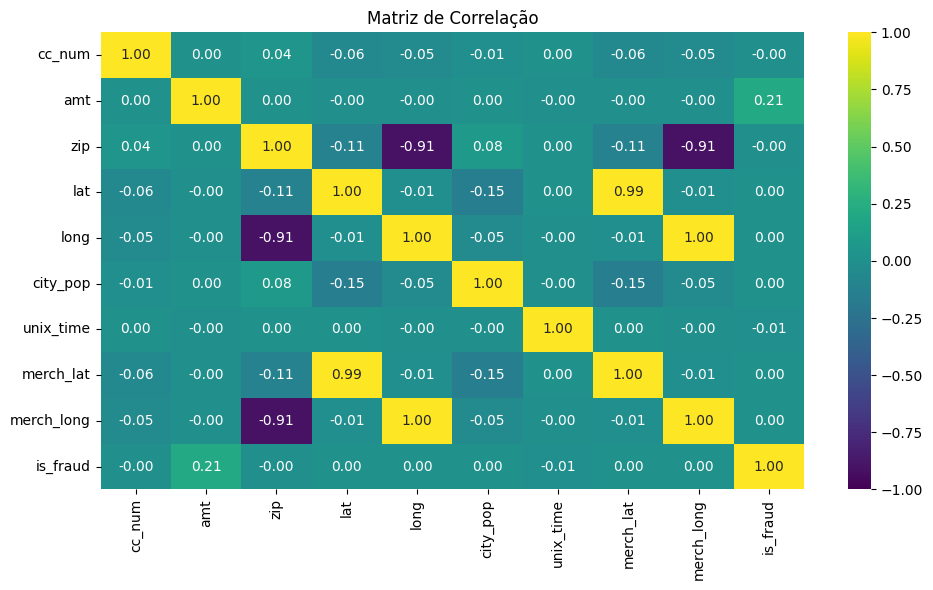

In [ ]:
# Suprimir todos os warnings
warnings.filterwarnings("ignore")

# Criar a fig com 1 subgr√°fico
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

#gr√°fico de Correla√ß√£o (Matriz de Correla√ß√£o)
sns.heatmap(df_anl_num.corr(), annot=True, cmap="viridis", fmt=".2f", ax=axes, vmin=-1, vmax=1)
axes.set_title('Matriz de Correla√ß√£o')
plt.tight_layout()
plt.show()




* Verificando relacao entre a variavel alvo e as variaveis explicativas categoricas ("frequencias")
    * Aqui ja podemos ver como se trata de um evento raro; 
    * as cateogrias de compras (variavel category) com "_net" sao de transacoes de compra online, as "_pos" sao trasacoes de compra presenciais. Elas detem a maioria das fraudes dentre as categorias, o que √© naturalmente compreensivel. 

In [14]:
df_anl_cat = df_total.select_dtypes(include=['object']) #df so de categoricas elegiveis para analise (APENAS ANALISE)
df_anl_cat.head(5)


trans_date_trans_time                            merchant       category      first     last gender                        street            city state                                job         dob                         trans_num
0   2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   Jennifer    Banks      F                561 Perry Cove  Moravian Falls    NC          Psychologist, counselling  1988-03-09  0b242abb623afc578575680df30655b9
1   2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos  Stephanie     Gill      F  43039 Riley Greens Suite 393          Orient    WA  Special educational needs teacher  1978-06-21  1f76529f8574734946361c461b024d99
2   2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment     Edward  Sanchez      M      594 White Dale Suite 530      Malad City    ID        Nature conservation officer  1962-01-19  a1a22d70485983eac12b5b88dad1cf95
3   2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport     Jeremy    White      M   9443 Cynthia Court Apt. 038         Boulder    MT                    Patent attorney  1967-01-12  6b849c168bdad6f867558c3793159a81
4   2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos      Tyler   Garcia      M              408 Bradley Rest        Doe Hill    VA     Dance movement psychotherapist  1986-03-28  a41d7549acf90789359a9aa5346dcb46

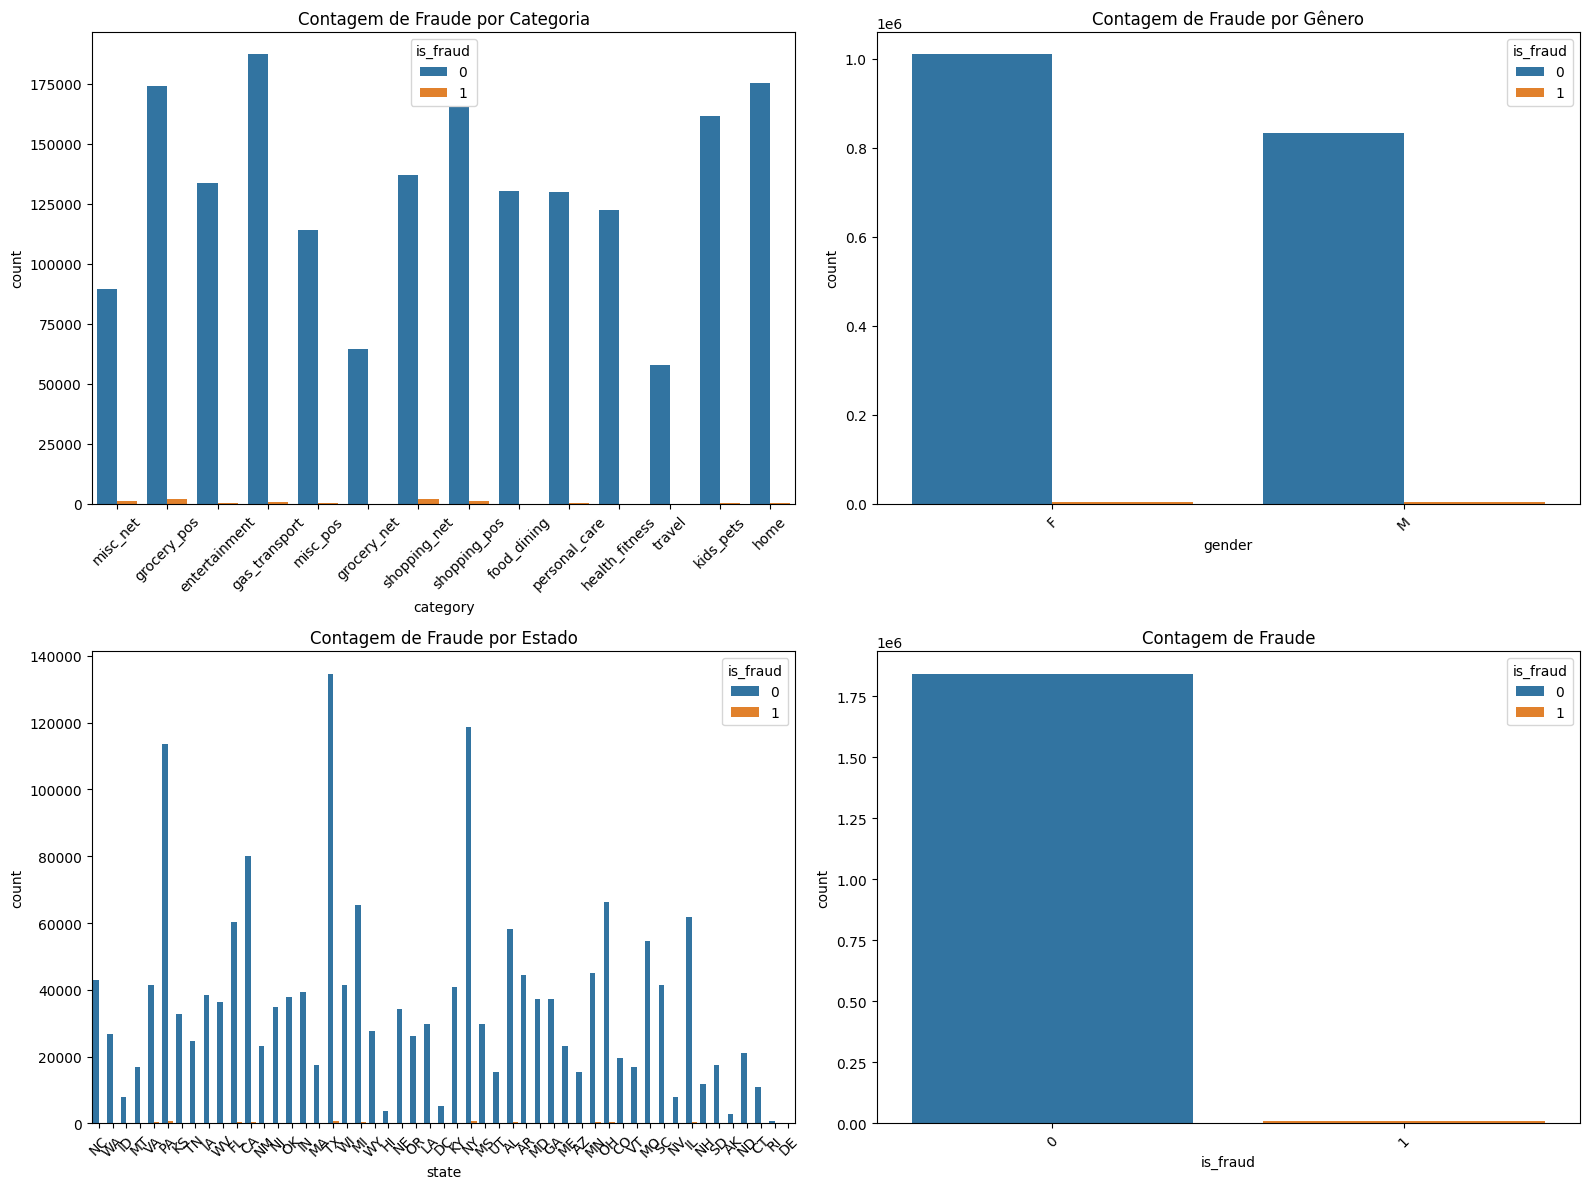

In [ ]:
df_anl_cat = df_total[['category','gender','state','is_fraud']] #df so de categoricas elegiveis para analise (APENAS ANALISE)


# Criar a fig com subgraficos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Gr√°fico de contagem para a vari√°vel 'category'
sns.countplot(data=df_anl_cat, x='category', hue='is_fraud', ax=axes[0, 0])
axes[0, 0].set_title('Contagem de Fraude por Categoria')

# 2. Gr√°fico de contagem para a vari√°vel 'gender'
sns.countplot(data=df_anl_cat, x='gender', hue='is_fraud', ax=axes[0, 1])
axes[0, 1].set_title('Contagem de Fraude por G√™nero')

# 3. Gr√°fico de contagem para a vari√°vel 'state'
sns.countplot(data=df_anl_cat, x='state', hue='is_fraud', ax=axes[1, 0])
axes[1, 0].set_title('Contagem de Fraude por Estado')

# 3. Gr√°fico de contagem para a vari√°vel 'state'
sns.countplot(data=df_anl_cat, x='is_fraud', hue='is_fraud', ax=axes[1, 1])
axes[1, 1].set_title('Contagem de Fraude')

# Aplicar rota√ß√£o de 45 graus nos eixos x
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)  # Rotaciona os r√≥tulos do eixo x para 45 graus

# Ajustar layout e exibir
plt.tight_layout()
plt.show()



* Verificando a relacao entre as variaveis numericas explicativas (sem variavel alvo)
    * Vemos um agrupamento em valores pequenos para ambas variaveis;
    * embora a variavel alvo esteja na legenda, √© meramente para vermos onde se encontrar as observacoes de fraude entre as variaveis, nao e muito conclusivo mas da uma ideia de onde se "agrupam" em termos de valores

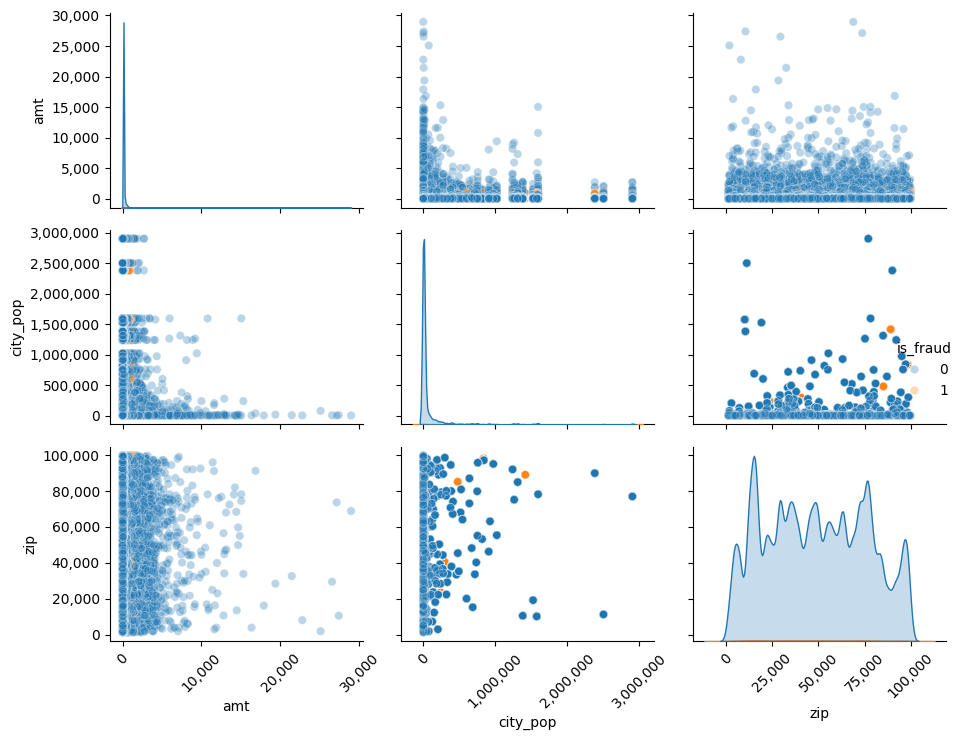

In [ ]:
# pairplot
g = sns.pairplot(
    df_anl_num[['amt','city_pop','is_fraud','zip']], 
    hue='is_fraud',
    diag_kind='kde',
    height=2.5,
    aspect=1.2,
    plot_kws={'alpha': 0.3}
)

# Formata os eixos 
for ax in g.axes.flatten():
    # Formata√ß√£o(sem nota√ß√£o cient√≠fica automatica)
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    
    ax.tick_params(axis='x', rotation=45) # eixo x em 45 graus

    plt.tight_layout()

plt.show()

* Verificando a relacao entre as variaveis explicativas categoricas (sem variavel alvo)
    * Aqui verificamos se ha associacao estatistica entre as variveis cetegoricas (sem a alvo) pelo teste de Qui2
    * Verificamos e classificamos em baixa media e alta a forca das associaicoes entre as variaveis categoricas, e plotamos os resultados pelo heatmap de V de Cramer tambem. 

Teste Qui-Quadrado entre category e gender:
Qui¬≤=5407.24, p-valor=0.0000 (menor que 0.05, h√° evid√™ncia de associa√ß√£o).
V de Cramer=0.05 (Baixa For√ßa de associa√ß√£o)

Teste Qui-Quadrado entre category e state:
Qui¬≤=9421.63, p-valor=0.0000 (menor que 0.05, h√° evid√™ncia de associa√ß√£o).
V de Cramer=0.02 (Baixa For√ßa de associa√ß√£o)

Teste Qui-Quadrado entre gender e category:
Qui¬≤=5407.24, p-valor=0.0000 (menor que 0.05, h√° evid√™ncia de associa√ß√£o).
V de Cramer=0.05 (Baixa For√ßa de associa√ß√£o)

Teste Qui-Quadrado entre gender e state:
Qui¬≤=121239.38, p-valor=0.0000 (menor que 0.05, h√° evid√™ncia de associa√ß√£o).
V de Cramer=0.26 (M√©dia For√ßa de associa√ß√£o)

Teste Qui-Quadrado entre state e category:
Qui¬≤=9421.63, p-valor=0.0000 (menor que 0.05, h√° evid√™ncia de associa√ß√£o).
V de Cramer=0.02 (Baixa For√ßa de associa√ß√£o)

Teste Qui-Quadrado entre state e gender:
Qui¬≤=121239.38, p-valor=0.0000 (menor que 0.05, h√° evid√™ncia de associa√ß√£o).
V de Cramer=0.

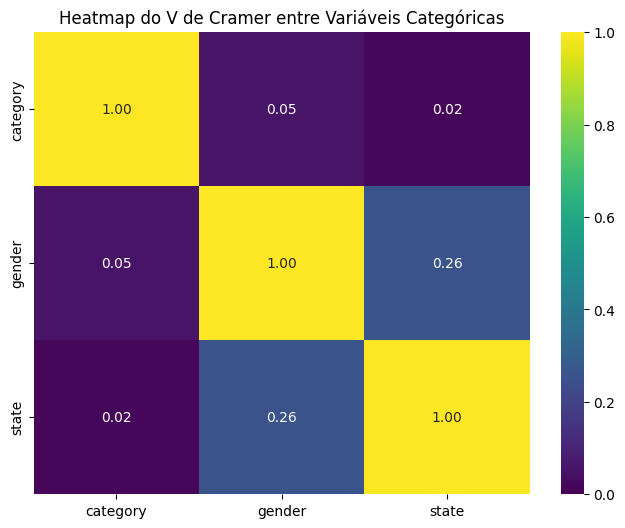

In [17]:
# df_ de categoricas sem a variavel alvo
df_cat = df_anl_cat[['category', 'gender', 'state']]

def cramers_v(x, y):
    """Calcula o V de Cramer entre duas vari√°veis categ√≥ricas."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Fun√ß√£o para categorizar a for√ßa do V de Cramer
def categorize_cramers_v(value):
    if value < 0.10:
        return "Baixa For√ßa de"
    elif value < 0.30:
        return "M√©dia For√ßa de"
    else:
        return "Alta For√ßa de"

# Inicializa um DataFrame para armazenar os resultados
results = pd.DataFrame(index=df_cat.columns, columns=df_cat.columns)

for col1 in df_cat.columns:
    for col2 in df_cat.columns:
        if col1 == col2:
            results.loc[col1, col2] = 1.0  # Correla√ß√£o perfeita com ela mesma
        else:
            table = pd.crosstab(df_cat[col1], df_cat[col2])
            chi2, p, _, _ = chi2_contingency(table)
            v_cramer = cramers_v(df_cat[col1], df_cat[col2])

            # Interpreta√ß√£o do p-valor
            significance = "h√° evid√™ncia de associa√ß√£o" if p < 0.05 else "n√£o h√° evid√™ncia de associa√ß√£o"
            
            # Classifica√ß√£o da for√ßa do V de Cramer
            strength = categorize_cramers_v(v_cramer)

            print(f'Teste Qui-Quadrado entre {col1} e {col2}:')
            print(f'Qui¬≤={chi2:.2f}, p-valor={p:.4f} ({"menor" if p < 0.05 else "maior"} que 0.05, {significance}).')
            print(f'V de Cramer={v_cramer:.2f} ({strength} associa√ß√£o)\n')

            results.loc[col1, col2] = v_cramer


# Converte os valores para float
results = results.astype(float)

plt.figure(figsize=(8, 6))
sns.heatmap(results, annot=True, cmap='viridis', fmt='.2f', vmin=0, vmax=1)
plt.title('Heatmap do V de Cramer entre Vari√°veis Categ√≥ricas')
plt.show()




* Aqui evidencia-se o desbalance das classes da variavel alvo, trata-se de um evento raro, conforme ja haviam indicios. 

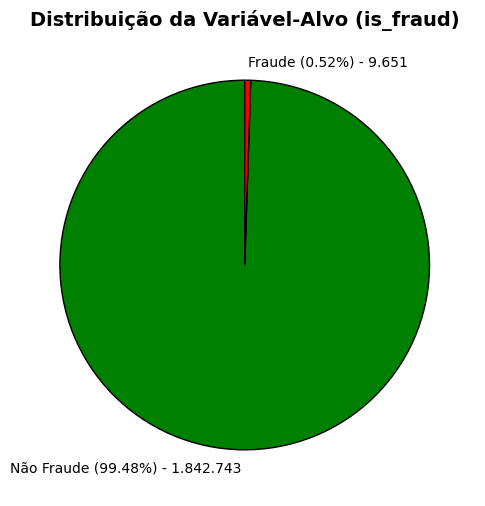

In [ ]:
# Contar a quantidade de cada classe
fraud_counts = df_total["is_fraud"].value_counts()

# Criar o gr√°fico de pizza
plt.figure(figsize=(6, 6))
wedges, texts = plt.pie(
    fraud_counts, labels=["N√£o Fraude", "Fraude"], 
    colors=["green", "red"], startangle=90, wedgeprops={"edgecolor": "black"}
)

# Adicionar os percentuais e contagens formatadas
for i, (text, pct) in enumerate(zip(texts, fraud_counts / fraud_counts.sum() * 100)):
    count_formatted = f"{fraud_counts.iloc[i]:,}".replace(",", ".")
    text.set_text(f"{text.get_text()} ({pct:.2f}%) - {count_formatted}")

# Adicionar t√≠tulo
plt.title("Distribui√ß√£o da Vari√°vel-Alvo (is_fraud)", fontsize=14, fontweight="bold")

plt.show()


* Verificando localizacao das transacoes e dos titulares dos cartoes 
    * Aqui foi dado foco nos maiores ofensores de fraudes: as variaveis de compra presencial "_pos" e online "_net" pois apresentaram grande parte das fraudes 
    * Ha maior concentracao de transacoes do lado da Costa Leste 
    * Existem transacoes no Havai, Canad√° e no Alasca, mas sao em pequenos volumes, ainda assim sao estranhas(principalemnte Alasca). 

In [ ]:
# Filtrar apenas transa√ß√µes fraudulentas E que sejam online (_net)
df_fraude_net = df_total[(df_total["is_fraud"] == 1) & (df_total["category"].str.contains("_net", na=False))]

# Criar um DataFrame com as coordenadas SOMENTE de fraudes online
df_mapa = pd.DataFrame({
    "Latitude": list(df_fraude_net["lat"]) + list(df_fraude_net["merch_lat"]),
    "Longitude": list(df_fraude_net["long"]) + list(df_fraude_net["merch_long"]),
    "Tipo": ["Titular"] * len(df_fraude_net) + ["Estabelecimento"] * len(df_fraude_net)
})

# Amostrar 50% dos dados  para evitar sobrecarga 
df_mapa_sample = df_mapa.sample(frac=0.5, random_state=42) if len(df_mapa) > 1000 else df_mapa

# mapa com os pontos das fraudes online
fig = px.scatter_mapbox(df_mapa_sample, lat="Latitude", lon="Longitude",
                        color="Tipo",  
                        mapbox_style="carto-positron",
                        zoom=3, 
                        color_discrete_map={"Titular": "orange", "Estabelecimento": "blue"}  # Define cores personalizadas
                        )

# Ajustar layout com margem superior maior para exibir o t√≠tulo
fig.update_layout(
    width=1700,  
    height=700,  
    margin={"r":0, "t":50, "b":0, "l":0},
    title={
        "text": "AMOSTRA de Distribui√ß√£o das Transa√ß√µes Fraudulentas ONLINE por Localiza√ß√£o do Titular e Estabelecimento",
        "x": 0.5,  # Centraliza o t√≠tulo
        "xanchor": "center",  # Garante alinhamento centralizado
        "yanchor": "top",
        "font": {"size": 20, "family": "Arial Black"}  # Aumenta o tamanho e deixa em negrito
    }
)


fig.show()


In [ ]:
# Filtrar apenas transa√ß√µes fraudulentas E que sejam presenciais (_pos)
df_fraude_net = df_total[(df_total["is_fraud"] == 1) & (df_total["category"].str.contains("_pos", na=False))]

# Criar um DataFrame com as coordenadas SOMENTE de fraudes presenciais
df_mapa = pd.DataFrame({
    "Latitude": list(df_fraude_net["lat"]) + list(df_fraude_net["merch_lat"]),
    "Longitude": list(df_fraude_net["long"]) + list(df_fraude_net["merch_long"]),
    "Tipo": ["Titular"] * len(df_fraude_net) + ["Estabelecimento"] * len(df_fraude_net)
})

# Amostrar 50% dos dados  para evitar sobrecarga 
df_mapa_sample = df_mapa.sample(frac=0.5, random_state=42) if len(df_mapa) > 1000 else df_mapa

#mapa com os pontos das fraudes presenciais, definindo cores espec√≠ficas
fig = px.scatter_mapbox(df_mapa_sample, lat="Latitude", lon="Longitude",
                        color="Tipo",  
                        mapbox_style="carto-positron",
                        zoom=3,
                        color_discrete_map={"Titular": "orange", "Estabelecimento": "blue"}  # Define cores personalizadas
)

# Ajustar layout
fig.update_layout(
    width=1700,  
    height=700,  
    margin={"r":0, "t":50, "b":0, "l":0},
    title={
        "text": "AMOSTRA de Distribui√ß√£o das Transa√ß√µes Fraudulentas PRESENCIAIS por Localiza√ß√£o do Titular e Estabelecimento",
        "x": 0.5,  
        "xanchor": "center",  
        "yanchor": "top",
        "font": {"size": 20, "family": "Arial Black"}  
    }
)

fig.show()


# 3 Prepara√ß√£o dos Dados: Feature Engineering

* estudar a criacao de variaveis que melhor descrevam o evento de fraude 

# 3.1 Distancia em Km entre estabeleciemnto e titular do cartao para compras presencias. 
* Foi criada uma feature usando a dist√¢ncia entre os pontos pela f√≥rmula de Haversine, pois ela considera a curvatura da Terra e retorna a dist√¢ncia real em km, diferentemente da Euclidiana, que assume um espa√ßo plano (2D) e n√£o converte diretamente em quil√¥metros.

In [ ]:
# Fun√ß√£o para remover vari√°veis desnecessarias (def de apoio nada especifico desse trecho)
def Limpa_df(df, colunas_para_excluir):
    df = df.drop(columns=colunas_para_excluir, errors='ignore')  # ignora colunas que n√£o existe
    return df


#Organiza o df apenas (def de apoio nada especifico desse trecho)
def mover_target_para_final(df, target): 
    """
    Move a variavel alvo para o final do df

    Isso nao interfere em resultados, e para manter o padrao de legibilidade e facilitar a visualizacao da target
    """
    colunas = [col for col in df.columns if col != target] + [target]
    return df[colunas]



In [ ]:
# criando variavel de distancia em Km entre estabeleciemnto e titular do cartao para compras presencias (nao faz sentido para compras online que podem e (muito provavlemente serao), bem distantes)
#essa variavel permitira entender se a compra presencial foi muito distante do local do titular do cartao, podendo indicar possivel fraude


# Definindo as categorias presenciais
categorias_presenciais = [
    "misc_pos", "grocery_pos", "gas_transport", 
    "shopping_pos", "personal_care", "health_fitness"
]


# Fun√ß√£o para calcular dist√¢ncia Haversine em KM
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Raio m√©dio da Terra em km
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Aplicar linha a linha
# eliminando caso ja tenha (importante so na hora de construir ou ajustar apenas na cracao dessa feature, para nao ter que ficar reiniciando o kernel)
#if 'distancia_km' in df_total.columns:
#    df_total = df_total.drop(columns='distancia_km')

df_total["distancia_km"] = df_total.apply(
    lambda row: haversine(row["lat"], row["long"], row["merch_lat"], row["merch_long"])
    if row["category"] in categorias_presenciais else np.nan,
    axis=1
)

#trata NAN 
df_total["distancia_km"] = df_total["distancia_km"].fillna(0)


df_total.head(10)





trans_date_trans_time            cc_num                            merchant       category    amt      first      last gender                          street            city state    zip   lat    long  city_pop                                job         dob                         trans_num   unix_time  merch_lat  merch_long  is_fraud  distancia_km
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann       misc_net   4.97   Jennifer     Banks      F                  561 Perry Cove  Moravian Falls    NC  28654 36.08  -81.18      3495          Psychologist, counselling  1988-03-09  0b242abb623afc578575680df30655b9  1325376018      36.01      -82.05         0          0.00
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos 107.23  Stephanie      Gill      F    43039 Riley Greens Suite 393          Orient    WA  99160 48.89 -118.21       149  Special educational needs teacher  1978-06-21  1f76529f8574734946361c461b024d99  1325376044      49.16     -118.19         0         30.21
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge  entertainment 220.11     Edward   Sanchez      M        594 White Dale Suite 530      Malad City    ID  83252 42.18 -112.26      4154        Nature conservation officer  1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051      43.15     -112.15         0          0.00
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport  45.00     Jeremy     White      M     9443 Cynthia Court Apt. 038         Boulder    MT  59632 46.23 -112.11      1939                    Patent attorney  1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076      47.03     -112.56         0         95.67
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist       misc_pos  41.96      Tyler    Garcia      M                408 Bradley Rest        Doe Hill    VA  24433 38.42  -79.46        99     Dance movement psychotherapist  1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186      38.67      -78.63         0         77.56
5   2019-01-01 00:04:08  4767265376804500    fraud_Stroman, Hudson and Erdman  gas_transport  94.63   Jennifer    Conner      F               4655 David Island          Dublin    PA  18917 40.38  -75.20      2158                  Transport planner  1961-06-19  189a841a0a8ba03058526bcfe566aab5  1325376248      40.65      -76.15         0         85.92
6   2019-01-01 00:04:42    30074693890476               fraud_Rowe-Vandervort    grocery_net  44.54     Kelsey  Richards      F     889 Sarah Station Suite 624         Holcomb    KS  67851 37.99 -100.99      2691                    Arboriculturist  1993-08-16  83ec1cc84142af6e2acf10c44949e720  1325376282      37.16     -100.15         0          0.00
7   2019-01-01 00:05:08  6011360759745864                fraud_Corwin-Collins  gas_transport  71.65     Steven  Williams      M       231 Flores Pass Suite 720        Edinburg    VA  22824 38.84  -78.60      6018               Designer, multimedia  1947-08-21  6d294ed2cc447d2c71c7171a3d54967c  1325376308      38.95      -78.54         0         12.77
8   2019-01-01 00:05:18  4922710831011201                    fraud_Herzog Ltd       misc_pos   4.27    Heather     Chase      F     6888 Hicks Stream Suite 954           Manor    PA  15665 40.34  -79.66      1472          Public affairs consultant  1941-03-07  fc28024ce480f8ef21a32d64c93a29f5  1325376318      40.35      -79.96         0         25.27
9   2019-01-01 00:06:01  2720830304681674   fraud_Schoen, Kuphal and Nitzsche    grocery_pos 198.39    Melissa   Aguilar      F  21326 Taylor Squares Suite 708     Clarksville    TN  37040 36.52  -87.35    151785                        Pathologist  1974-03-28  3b9014ea8fb80bd65de0b1463b00b00e  1325376361      37.18      -87.49         0         74.08

* Testando a distancia entre as variaveis em um mapa 
    * sugiro conferir em https://www.movable-type.co.uk/scripts/latlong.html tambem, para ter cereteza da logica de Haversine implantada (comparar os resultados da variavel de distancia pegando as coord e jogando la)

In [23]:
n_observacao=3 #deve ser observacao presencial as demais nao teram valor para essa variavel
# Selecionar a primeira observa√ß√£o do df_total
obs = df_total[df_total["cc_num"] == df_total["cc_num"].iloc[n_observacao]].iloc[0]

# Extrair coordenadas
lat1, lon1 = obs['lat'], obs['long']
lat2, lon2 = obs['merch_lat'], obs['merch_long']
distancia_km = obs['distancia_km']

# Criar DataFrame com os dois pontos
df_pontos = pd.DataFrame({
    'Nome': ['Titular', 'Estabelecimento'],
    'Latitude': [lat1, lat2],
    'Longitude': [lon1, lon2]
})

# Criar figura
fig = go.Figure()

# Adicionar os dois pontos
fig.add_trace(go.Scattermapbox(
    lat=df_pontos['Latitude'],
    lon=df_pontos['Longitude'],
    mode='markers+text',
    text=df_pontos['Nome'],
    marker=dict(size=12, color=['purple', 'blue']),
    textposition="top center",
    name='Pontos'
))

# Linha entre os pontos
fig.add_trace(go.Scattermapbox(
    lat=[lat1, lat2],
    lon=[lon1, lon2],
    mode='lines',
    line=dict(width=2, color='gray'),
    name='Dist√¢ncia reta'
))

# Ponto m√©dio com r√≥tulo da dist√¢ncia
if pd.notna(distancia_km):
    lat_meio = (lat1 + lat2) / 2
    lon_meio = (lon1 + lon2) / 2
    fig.add_trace(go.Scattermapbox(
        lat=[lat_meio],
        lon=[lon_meio],
        mode='markers+text',
        text=[f'{round(distancia_km, 2)} km'],
        marker=dict(size=1, color='white'),  # marcador min√∫sculo e invis√≠vel
        textfont=dict(size=14, color='black'),
        textposition="top center",
        showlegend=False
    ))

# Layout do mapa
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=3,
    mapbox_center={"lat": (lat1 + lat2) / 2, "lon": (lon1 + lon2) / 2},
    margin={"r":0,"t":0,"l":0,"b":0},
    height=500,
    title=f"Mapa: {obs['cc_num']} | Categoria: {obs['category']}"
)

fig.show()


* Verificando as quantidades por "categoria" (criada so pra analise, nao e uma feature) de distancias, para identificar concentracoes em distancias maiores para transacoes presenciais. 
    * Distancias muito grandes para compras presenciais e um estabelecimento "pode" pontar um padrao de fraudes;
    * Ha maior concentracao em fraudes presenciais de 50 a 100 km de distancia entre endereco do titular e o estabelecimento, e uma distancia aceitavel, pode significar viagens, trabalho ... Nada muito discrepante. 
    * Ha poucas variaveis com km acima de 120, nao parecem ser padrao de fraude. 

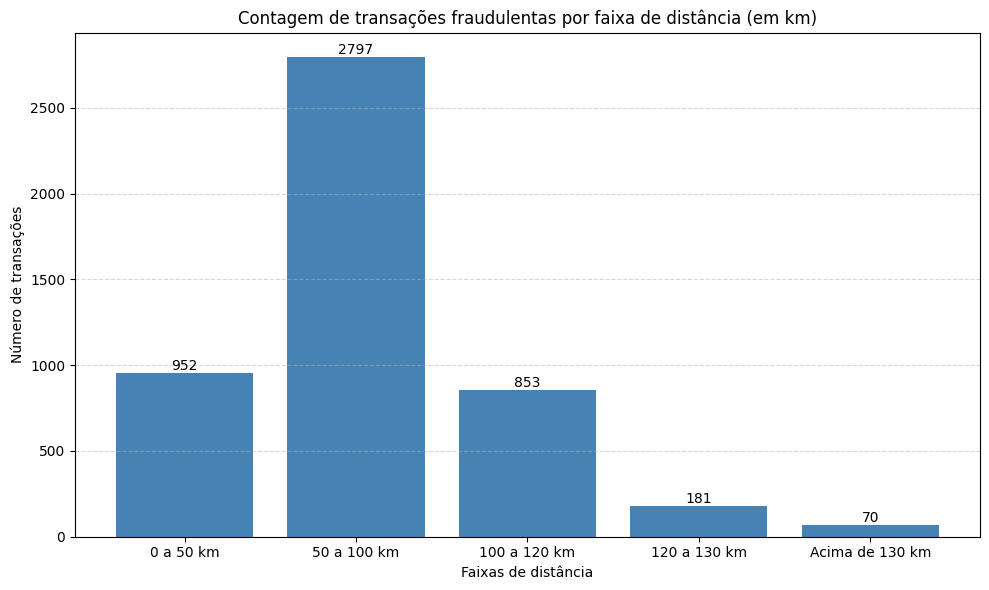

trans_date_trans_time            cc_num                            merchant       category    amt      first     last gender                        street            city state    zip   lat    long  city_pop                                job         dob                         trans_num   unix_time  merch_lat  merch_long  is_fraud  distancia_km faixa_distancia
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann       misc_net   4.97   Jennifer    Banks      F                561 Perry Cove  Moravian Falls    NC  28654 36.08  -81.18      3495          Psychologist, counselling  1988-03-09  0b242abb623afc578575680df30655b9  1325376018      36.01      -82.05         0          0.00   Sem dist√¢ncia
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos 107.23  Stephanie     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160 48.89 -118.21       149  Special educational needs teacher  1978-06-21  1f76529f8574734946361c461b024d99  1325376044      49.16     -118.19         0         30.21       0 a 50 km
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge  entertainment 220.11     Edward  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252 42.18 -112.26      4154        Nature conservation officer  1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051      43.15     -112.15         0          0.00   Sem dist√¢ncia
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport  45.00     Jeremy    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632 46.23 -112.11      1939                    Patent attorney  1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076      47.03     -112.56         0         95.67     50 a 100 km
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist       misc_pos  41.96      Tyler   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433 38.42  -79.46        99     Dance movement psychotherapist  1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186      38.67      -78.63         0         77.56     50 a 100 km

In [24]:
# Cria√ß√£o da vari√°vel categ√≥rica com base nas faixas de dist√¢ncia
bins = [0, 50, 100, 120, 130, float('inf')]
labels = ['0 a 50 km', '50 a 100 km', '100 a 120 km', '120 a 130 km', 'Acima de 130 km']

df_total['faixa_distancia'] = pd.cut(df_total['distancia_km'], bins=bins, labels=labels, right=True)

# Agora podemos fazer o agrupamento diretamente com essa nova vari√°vel
contagens = df_total[df_total['is_fraud'] == 1]['faixa_distancia'].value_counts().reindex(labels)

# Gr√°fico
plt.figure(figsize=(10, 6))
bars = plt.bar(contagens.index, contagens.values, color='steelblue')

# Adicionando r√≥tulos
for bar, count in zip(bars, contagens.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=10)

plt.title('Contagem de transa√ß√µes fraudulentas por faixa de dist√¢ncia (em km)')
plt.ylabel('N√∫mero de transa√ß√µes')
plt.xlabel('Faixas de dist√¢ncia')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Preencher NaN com categoria expl√≠cita, sao os valores cuja regra nao se aplicou, pois nao tem distancia a ser calculada, pois sao compras nao presenciais 
df_total['faixa_distancia'] = df_total['faixa_distancia'].cat.add_categories('Sem dist√¢ncia')
df_total['faixa_distancia'].fillna('Sem dist√¢ncia', inplace=True)

df_total.head(5)


In [ ]:

'''organizando o df (nada especifico dessa secao)'''

# Copia a coluna de trans_num para preserva-la comom coluna de dados no df 
df_total["trans_num_copy"] = df_total["trans_num"]

# Define o √≠ndice como trans_num 
df_total.set_index("trans_num_copy", inplace=True)


In [26]:
df_total.index.name = None #tira o cabecalho da variavel trans_num da primeira linha do df

* testando a diferenca estatistica entre city_pop e o evento fraud (nada especifico dessa secao tambem)

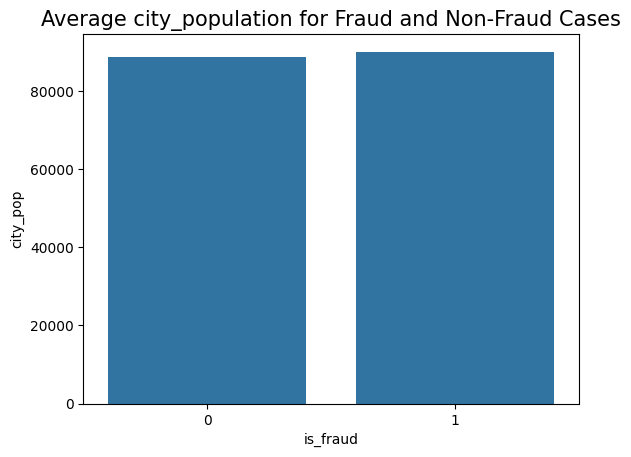

T-test: t-statistic = 0.443, p-value = 0.658, p-value<0.05? False


In [27]:
sns.barplot(data=df_total,x='is_fraud', y='city_pop', ci=None)
plt.title('Average city_population for Fraud and Non-Fraud Cases',fontsize=15)
plt.show()

fraud_population = df_total[df_total['is_fraud'] == 1]['city_pop']
non_fraud_population = df_total[df_total['is_fraud'] == 0]['city_pop']
t_stat, p_value = ttest_ind(fraud_population, non_fraud_population)
print(f'T-test: t-statistic = {round(t_stat,3)}, p-value = {round(p_value,3)}, p-value<0.05? {p_value<0.05}')



In [ ]:
#Como aceitamos a hip√≥tese nula(p-val > 0.05), conclu√≠mos que n√£o h√° diferen√ßa significativa entre as m√©dias.
#Conclu√≠mos tamb√©m que city_pop n√£o nos ajuda no alvo (is_fraud), ent√£o o descartaremos.

In [29]:
# Dropando colunas desnecessarias
colunas_excluir = ['unix_time','city_pop','first','last']
df_total = Limpa_df(df_total, colunas_excluir)

df_total.head(5)

trans_date_trans_time            cc_num                            merchant       category    amt gender                        street            city state    zip   lat    long                                job         dob                         trans_num  merch_lat  merch_long  is_fraud  distancia_km faixa_distancia
0b242abb623afc578575680df30655b9   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann       misc_net   4.97      F                561 Perry Cove  Moravian Falls    NC  28654 36.08  -81.18          Psychologist, counselling  1988-03-09  0b242abb623afc578575680df30655b9      36.01      -82.05         0          0.00   Sem dist√¢ncia
1f76529f8574734946361c461b024d99   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos 107.23      F  43039 Riley Greens Suite 393          Orient    WA  99160 48.89 -118.21  Special educational needs teacher  1978-06-21  1f76529f8574734946361c461b024d99      49.16     -118.19         0         30.21       0 a 50 km
a1a22d70485983eac12b5b88dad1cf95   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge  entertainment 220.11      M      594 White Dale Suite 530      Malad City    ID  83252 42.18 -112.26        Nature conservation officer  1962-01-19  a1a22d70485983eac12b5b88dad1cf95      43.15     -112.15         0          0.00   Sem dist√¢ncia
6b849c168bdad6f867558c3793159a81   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport  45.00      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632 46.23 -112.11                    Patent attorney  1967-01-12  6b849c168bdad6f867558c3793159a81      47.03     -112.56         0         95.67     50 a 100 km
a41d7549acf90789359a9aa5346dcb46   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist       misc_pos  41.96      M              408 Bradley Rest        Doe Hill    VA  24433 38.42  -79.46     Dance movement psychotherapist  1986-03-28  a41d7549acf90789359a9aa5346dcb46      38.67      -78.63         0         77.56     50 a 100 km

In [30]:
#clean merchant column
df_total['merchant'] = df_total['merchant'].apply(lambda x : x.replace('fraud_',''))
df_total.head(5)

trans_date_trans_time            cc_num                      merchant       category    amt gender                        street            city state    zip   lat    long                                job         dob                         trans_num  merch_lat  merch_long  is_fraud  distancia_km faixa_distancia
0b242abb623afc578575680df30655b9   2019-01-01 00:00:18  2703186189652095          Rippin, Kub and Mann       misc_net   4.97      F                561 Perry Cove  Moravian Falls    NC  28654 36.08  -81.18          Psychologist, counselling  1988-03-09  0b242abb623afc578575680df30655b9      36.01      -82.05         0          0.00   Sem dist√¢ncia
1f76529f8574734946361c461b024d99   2019-01-01 00:00:44      630423337322     Heller, Gutmann and Zieme    grocery_pos 107.23      F  43039 Riley Greens Suite 393          Orient    WA  99160 48.89 -118.21  Special educational needs teacher  1978-06-21  1f76529f8574734946361c461b024d99      49.16     -118.19         0         30.21       0 a 50 km
a1a22d70485983eac12b5b88dad1cf95   2019-01-01 00:00:51    38859492057661                Lind-Buckridge  entertainment 220.11      M      594 White Dale Suite 530      Malad City    ID  83252 42.18 -112.26        Nature conservation officer  1962-01-19  a1a22d70485983eac12b5b88dad1cf95      43.15     -112.15         0          0.00   Sem dist√¢ncia
6b849c168bdad6f867558c3793159a81   2019-01-01 00:01:16  3534093764340240  Kutch, Hermiston and Farrell  gas_transport  45.00      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632 46.23 -112.11                    Patent attorney  1967-01-12  6b849c168bdad6f867558c3793159a81      47.03     -112.56         0         95.67     50 a 100 km
a41d7549acf90789359a9aa5346dcb46   2019-01-01 00:03:06   375534208663984                 Keeling-Crist       misc_pos  41.96      M              408 Bradley Rest        Doe Hill    VA  24433 38.42  -79.46     Dance movement psychotherapist  1986-03-28  a41d7549acf90789359a9aa5346dcb46      38.67      -78.63         0         77.56     50 a 100 km

# 3.2 Tempo entre transa√ß√µes 

* A vari√°vel horas_entre_transacoes representa o intervalo de tempo, em horas, entre transa√ß√µes consecutivas de um mesmo cart√£o de cr√©dito. Ela foi criada para analisar o comportamento temporal das transa√ß√µes, para identificar padr√µes que possam indicar transa√ß√µes fraudulentas. 


* O teste t indica uma diferen√ßa estatisticamente significativa entre o tempo m√©dio entre transa√ß√µes de clientes fraudulentos e n√£o fraudulentos. Com um valor T de 27.27 e um p-valor de 0.00, as transa√ß√µes fraudulentas parecem ter um padr√£o distinto de tempo em compara√ß√£o com as n√£o fraudulentas, o que sugere que o tempo entre transa√ß√µes pode ser um fator importante na identifica√ß√£o de comportamentos suspeitos.

* A diferen√ßa de m√©dia observada sugere que as transa√ß√µes fraudulentas podem ocorrer em intervalos de tempo consideravelmente diferentes ‚Äî mais curtos, neste caso ‚Äî em rela√ß√£o √†s transa√ß√µes n√£o fraudulentas.

* Como o p-valor √© menor que 0,05, rejeitamos a hip√≥tese nula. Isso confirma que a m√©dia do intervalo em horas entre transa√ß√µes √© significativamente diferente entre transa√ß√µes fraudulentas e n√£o fraudulentas.

           T  p-val
T-test 27.27   0.00


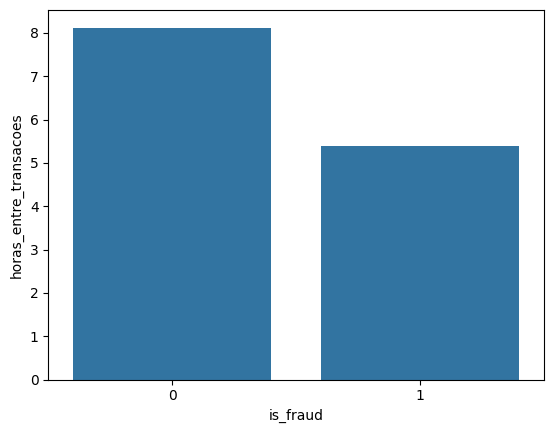

In [ ]:
# Converter 'dob' e 'trans_date...' para datetime
df_total["dob"] = pd.to_datetime(df_total["dob"])
df_total["trans_date_trans_time"] = pd.to_datetime(df_total["trans_date_trans_time"])

#We will get the time between transactions for each card
#Time=0 for every first transaction and time will be represented in hours.
df_total.sort_values(['cc_num', 'trans_date_trans_time'],inplace=True)
df_total['horas_entre_transacoes']=((df_total.groupby('cc_num')[['trans_date_trans_time']].diff())/np.timedelta64(1,'h'))


df_total.loc[df_total['horas_entre_transacoes'].isna(),'horas_entre_transacoes'] = 0
df_total['horas_entre_transacoes'] = df_total['horas_entre_transacoes'].astype(int)


# x_0=df.groupby('is_fraud')['horas_entre_transacoes'].mean().values[0]
# x_1=df.groupby('is_fraud')['horas_entre_transacoes'].mean().values[1]
# std_0=df.groupby('is_fraud')['horas_entre_transacoes'].std().values[0]
# std_1=df.groupby('is_fraud')['horas_entre_transacoes'].std().values[1]
# n_0=df.groupby('is_fraud')['horas_entre_transacoes'].count().values[0]
# n_1=df.groupby('is_fraud')['horas_entre_transacoes'].count().values[1]
# numerator = x_0 - x_1
# domin = np.sqrt(std_0**2/n_0 + std_1**2/n_1)
# t_stat=numerator/domin
# p_val = 2*(1-t.cdf(abs(t_stat),df=n_0+n_1-2))
# print(t_stat,p_val)
#----------------------
#The power of pingouin library!
print(pingouin.ttest(df_total[df_total['is_fraud'] == 0]['horas_entre_transacoes'],
              df_total[df_total['is_fraud'] == 1]['horas_entre_transacoes'],
              alternative='two-sided')[['T','p-val']])
sns.barplot(data=df_total,x='is_fraud',y='horas_entre_transacoes',ci=None)
plt.show()

In [32]:

df_total.head(5)

trans_date_trans_time       cc_num                     merchant       category   amt gender            street           city state    zip   lat    long                          job        dob                         trans_num  merch_lat  merch_long  is_fraud  distancia_km faixa_distancia  horas_entre_transacoes
98e3dcf98101146a577f85a34e58feec   2019-01-01 12:47:15  60416207185  Jones, Sawayn and Romaguera       misc_net  7.27      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager 1986-02-17  98e3dcf98101146a577f85a34e58feec      43.97     -109.74         0          0.00   Sem dist√¢ncia                       0
498120fc45d277f7c88e3dba79c33865   2019-01-02 08:44:57  60416207185                    Berge LLC  gas_transport 52.94      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager 1986-02-17  498120fc45d277f7c88e3dba79c33865      42.02     -109.04         0        110.31    100 a 120 km                      19
95f514bb993151347c7acdf8505c3d62   2019-01-02 08:47:36  60416207185                 Luettgen PLC  gas_transport 82.08      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager 1986-02-17  95f514bb993151347c7acdf8505c3d62      42.96     -109.16         0         21.79       0 a 50 km                       0
4f0c1a14e0aa7eb56a490780ef9268c5   2019-01-02 12:38:14  60416207185                Daugherty LLC      kids_pets 34.79      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager 1986-02-17  4f0c1a14e0aa7eb56a490780ef9268c5      42.23     -108.75         0          0.00   Sem dist√¢ncia                       3
3b2ebd3af508afba959640893e1e82bc   2019-01-02 13:10:46  60416207185               Beier and Sons           home 27.18      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager 1986-02-17  3b2ebd3af508afba959640893e1e82bc      43.32     -108.09         0          0.00   Sem dist√¢ncia                       0

# 3.3 Idade 

* A vari√°vel age foi criada para representar a idade do titular do cart√£o no momento de cada transa√ß√£o. Ela √© calculada a partir da diferen√ßa entre o ano da transa√ß√£o e o ano de nascimento, evitando distor√ß√µes que poderiam ocorrer ao usar a data atual. Ap√≥s a cria√ß√£o da vari√°vel age, a coluna de data de nascimento (dob) foi removida, pois j√° n√£o era mais necess√°ria para a an√°lise.

In [33]:
#transformar variaveis com transformacao relevante (inicialmente) no dicionario de dados CONTINUAR

#calculando a idade
#usando a diferenca entre o nascimento e o momento da transacao para evitar distorcoes (usar a data atual criaria uma idade flutuante ao longo do tempo)
df_total["age"] = df_total.apply(lambda linha: linha["trans_date_trans_time"].year - linha["dob"].year, axis=1) #funcao lambda "linha" que aplica a subtracao de datas linha a linha no df_total atraves do apply()

#remove data de nascimento, nao e mais util
df_total.drop(columns=["dob"], inplace=True)

df_total.head(5)

trans_date_trans_time       cc_num                     merchant       category   amt gender            street           city state    zip   lat    long                          job                         trans_num  merch_lat  merch_long  is_fraud  distancia_km faixa_distancia  horas_entre_transacoes  age
98e3dcf98101146a577f85a34e58feec   2019-01-01 12:47:15  60416207185  Jones, Sawayn and Romaguera       misc_net  7.27      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  98e3dcf98101146a577f85a34e58feec      43.97     -109.74         0          0.00   Sem dist√¢ncia                       0   33
498120fc45d277f7c88e3dba79c33865   2019-01-02 08:44:57  60416207185                    Berge LLC  gas_transport 52.94      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  498120fc45d277f7c88e3dba79c33865      42.02     -109.04         0        110.31    100 a 120 km                      19   33
95f514bb993151347c7acdf8505c3d62   2019-01-02 08:47:36  60416207185                 Luettgen PLC  gas_transport 82.08      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  95f514bb993151347c7acdf8505c3d62      42.96     -109.16         0         21.79       0 a 50 km                       0   33
4f0c1a14e0aa7eb56a490780ef9268c5   2019-01-02 12:38:14  60416207185                Daugherty LLC      kids_pets 34.79      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  4f0c1a14e0aa7eb56a490780ef9268c5      42.23     -108.75         0          0.00   Sem dist√¢ncia                       3   33
3b2ebd3af508afba959640893e1e82bc   2019-01-02 13:10:46  60416207185               Beier and Sons           home 27.18      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  3b2ebd3af508afba959640893e1e82bc      43.32     -108.09         0          0.00   Sem dist√¢ncia                       0   33

# 3.4 Codigo do Banco (BIN)

* A vari√°vel bin foi criada para representar o c√≥digo do banco da transa√ß√£o, extra√≠do dos primeiros 6 d√≠gitos do n√∫mero do cart√£o (cc_num). Essa informa√ß√£o √© importante para identificar a institui√ß√£o financeira associada √† transa√ß√£o.

In [34]:
df_total["bin"] = df_total["cc_num"].astype(str).str[:6]
df_total.head(5)

trans_date_trans_time       cc_num                     merchant       category   amt gender            street           city state    zip   lat    long                          job                         trans_num  merch_lat  merch_long  is_fraud  distancia_km faixa_distancia  horas_entre_transacoes  age     bin
98e3dcf98101146a577f85a34e58feec   2019-01-01 12:47:15  60416207185  Jones, Sawayn and Romaguera       misc_net  7.27      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  98e3dcf98101146a577f85a34e58feec      43.97     -109.74         0          0.00   Sem dist√¢ncia                       0   33  604162
498120fc45d277f7c88e3dba79c33865   2019-01-02 08:44:57  60416207185                    Berge LLC  gas_transport 52.94      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  498120fc45d277f7c88e3dba79c33865      42.02     -109.04         0        110.31    100 a 120 km                      19   33  604162
95f514bb993151347c7acdf8505c3d62   2019-01-02 08:47:36  60416207185                 Luettgen PLC  gas_transport 82.08      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  95f514bb993151347c7acdf8505c3d62      42.96     -109.16         0         21.79       0 a 50 km                       0   33  604162
4f0c1a14e0aa7eb56a490780ef9268c5   2019-01-02 12:38:14  60416207185                Daugherty LLC      kids_pets 34.79      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  4f0c1a14e0aa7eb56a490780ef9268c5      42.23     -108.75         0          0.00   Sem dist√¢ncia                       3   33  604162
3b2ebd3af508afba959640893e1e82bc   2019-01-02 13:10:46  60416207185               Beier and Sons           home 27.18      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  3b2ebd3af508afba959640893e1e82bc      43.32     -108.09         0          0.00   Sem dist√¢ncia                       0   33  604162

# 3.5 features per√≠odo e hor√°rio

* As vari√°veis relacionadas ao hor√°rio da transa√ß√£o foram extra√≠das para fornecer uma an√°lise mais detalhada do momento da transa√ß√£o. A coluna day_of_week indica o dia da semana em que a transa√ß√£o ocorreu (0 para segunda-feira, 6 para domingo), e a coluna month representa o m√™s da transa√ß√£o. A coluna time cont√©m o hor√°rio completo (hora:minuto:segundo) da transa√ß√£o.

* Al√©m disso, a vari√°vel period classifica o hor√°rio da transa√ß√£o em per√≠odos do dia, como "Madrugada In√≠cio", "Manh√£ Final", "Tarde In√≠cio", entre outros, com base na hora extra√≠da da transa√ß√£o. Essas informa√ß√µes podem ser √∫teis para analisar padr√µes de comportamento de transa√ß√µes ao longo do tempo.

In [35]:
# extraindo variaveis do horario da transacao

# Certificando que a coluna 'trans_date_trans_time' est√° no formato datetime
df_total['trans_date_trans_time'] = pd.to_datetime(df_total['trans_date_trans_time'])

# Extraindo o dia da semana (0=segunda, 1=ter√ßa, ..., 6=domingo)
df_total['day_of_week'] = df_total['trans_date_trans_time'].dt.dayofweek

# Extraindo o m√™s
df_total['month'] = df_total['trans_date_trans_time'].dt.month

# Extraindo o hor√°rio completo (hora:minuto:segundo)
df_total['time'] = df_total['trans_date_trans_time'].dt.strftime('%H:%M:%S')


def classify_period(hour):
    if 0 <= hour < 3:
        return 'Madrugada In√≠cio'
    elif 3 <= hour < 6:
        return 'Madrugada Final'
    elif 6 <= hour < 9:
        return 'Manh√£ In√≠cio'
    elif 9 <= hour < 12:
        return 'Manh√£ Final'
    elif 12 <= hour < 15:
        return 'Tarde In√≠cio'
    elif 15 <= hour < 18:
        return 'Tarde Final'
    elif 18 <= hour < 21:
        return 'Noite In√≠cio'
    elif 21 <= hour < 24:
        return 'Noite Final'


# Extraindo a hora da transa√ß√£o
df_total['hour'] = df_total['trans_date_trans_time'].dt.hour

# Aplicando a fun√ß√£o para classificar o per√≠odo
df_total['period'] = df_total['hour'].apply(classify_period)

df_total.head(5)


trans_date_trans_time       cc_num                     merchant       category   amt gender            street           city state    zip   lat    long                          job                         trans_num  merch_lat  merch_long  is_fraud  distancia_km faixa_distancia  horas_entre_transacoes  age     bin  day_of_week  month      time  hour        period
98e3dcf98101146a577f85a34e58feec   2019-01-01 12:47:15  60416207185  Jones, Sawayn and Romaguera       misc_net  7.27      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  98e3dcf98101146a577f85a34e58feec      43.97     -109.74         0          0.00   Sem dist√¢ncia                       0   33  604162            1      1  12:47:15    12  Tarde In√≠cio
498120fc45d277f7c88e3dba79c33865   2019-01-02 08:44:57  60416207185                    Berge LLC  gas_transport 52.94      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  498120fc45d277f7c88e3dba79c33865      42.02     -109.04         0        110.31    100 a 120 km                      19   33  604162            2      1  08:44:57     8  Manh√£ In√≠cio
95f514bb993151347c7acdf8505c3d62   2019-01-02 08:47:36  60416207185                 Luettgen PLC  gas_transport 82.08      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  95f514bb993151347c7acdf8505c3d62      42.96     -109.16         0         21.79       0 a 50 km                       0   33  604162            2      1  08:47:36     8  Manh√£ In√≠cio
4f0c1a14e0aa7eb56a490780ef9268c5   2019-01-02 12:38:14  60416207185                Daugherty LLC      kids_pets 34.79      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  4f0c1a14e0aa7eb56a490780ef9268c5      42.23     -108.75         0          0.00   Sem dist√¢ncia                       3   33  604162            2      1  12:38:14    12  Tarde In√≠cio
3b2ebd3af508afba959640893e1e82bc   2019-01-02 13:10:46  60416207185               Beier and Sons           home 27.18      F  9886 Anita Drive  Fort Washakie    WY  82514 43.00 -108.90  Information systems manager  3b2ebd3af508afba959640893e1e82bc      43.32     -108.09         0          0.00   Sem dist√¢ncia                       0   33  604162            2      1  13:10:46    13  Tarde In√≠cio

# 3.6 Feature de quantidade de transa√ß√µes em um periodo de tempo

A vari√°vel "count_tran_ult_jan_temp" foi criada para contar o n√∫mero de transa√ß√µes realizadas nos √∫ltimos 15 segundos antes de cada transa√ß√£o, com o objetivo de identificar comportamentos suspeitos e padr√µes de fraudes, como transa√ß√µes seguidas rapidamente. O c√°lculo considera cada transa√ß√£o e verifica o n√∫mero de transa√ß√µes anteriores realizadas, para cada cartao, dentro desse intervalo de 15 segundos. Isso pode ajudar a detectar transa√ß√µes fraudulentas que ocorrem em um curto per√≠odo de tempo.

Os testes indicam uma diferen√ßa estat√≠stica significativa no n√∫mero de transa√ß√µes realizadas nos √∫ltimos 15 segundos entre transa√ß√µes fraudulentas e n√£o fraudulentas. Com um valor T de -5.55 e um p-valor de 0.00, observamos que as transa√ß√µes fraudulentas tendem a ocorrer com um n√∫mero menor de transa√ß√µes consecutivas dentro desse intervalo curto, em compara√ß√£o com as transa√ß√µes n√£o fraudulentas. Isso sugere que o comportamento de transa√ß√µes em intervalos breves pode ser um indicativo de fraude, sendo uma caracter√≠stica distintiva entre os dois grupos.

Como o p-valor √© menor que 0,05, rejeitamos a hip√≥tese nula. Isso confirma que a contagem de transa√ß√µes nos √∫ltimos 15 segundos √© significativamente diferente entre transa√ß√µes fraudulentas e n√£o fraudulentas.

           T  p-val
T-test -5.55   0.00


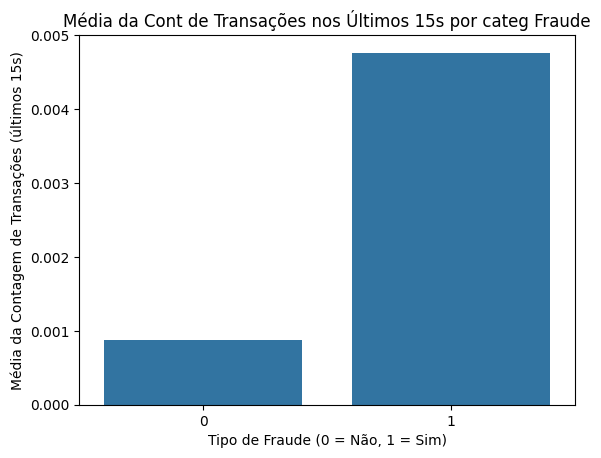

index trans_date_trans_time            cc_num                      merchant       category    amt gender                        street            city state    zip   lat    long                                job  merch_lat  merch_long  is_fraud  distancia_km faixa_distancia  horas_entre_transacoes  age     bin  day_of_week  month      time  hour            period  count_tran_ult_jan_temp
trans_num                                                                                                                                                                                                                                                                                                                                                                                                                                                           
0b242abb623afc578575680df30655b9  0b242abb623afc578575680df30655b9   2019-01-01 00:00:18  2703186189652095          Rippin, Kub and Mann       misc_net   4.97      F                561 Perry Cove  Moravian Falls    NC  28654 36.08  -81.18          Psychologist, counselling      36.01      -82.05         0          0.00   Sem dist√¢ncia                       0   31  270318            1      1  00:00:18     0  Madrugada In√≠cio                        0
1f76529f8574734946361c461b024d99  1f76529f8574734946361c461b024d99   2019-01-01 00:00:44      630423337322     Heller, Gutmann and Zieme    grocery_pos 107.23      F  43039 Riley Greens Suite 393          Orient    WA  99160 48.89 -118.21  Special educational needs teacher      49.16     -118.19         0         30.21       0 a 50 km                       0   41  630423            1      1  00:00:44     0  Madrugada In√≠cio                        0
a1a22d70485983eac12b5b88dad1cf95  a1a22d70485983eac12b5b88dad1cf95   2019-01-01 00:00:51    38859492057661                Lind-Buckridge  entertainment 220.11      M      594 White Dale Suite 530      Malad City    ID  83252 42.18 -112.26        Nature conservation officer      43.15     -112.15         0          0.00   Sem dist√¢ncia                       0   57  388594            1      1  00:00:51     0  Madrugada In√≠cio                        0
6b849c168bdad6f867558c3793159a81  6b849c168bdad6f867558c3793159a81   2019-01-01 00:01:16  3534093764340240  Kutch, Hermiston and Farrell  gas_transport  45.00      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632 46.23 -112.11                    Patent attorney      47.03     -112.56         0         95.67     50 a 100 km                       0   52  353409            1      1  00:01:16     0  Madrugada In√≠cio                        0
a41d7549acf90789359a9aa5346dcb46  a41d7549acf90789359a9aa5346dcb46   2019-01-01 00:03:06   375534208663984                 Keeling-Crist       misc_pos  41.96      M              408 Bradley Rest        Doe Hill    VA  24433 38.42  -79.46     Dance movement psychotherapist      38.67      -78.63         0         77.56     50 a 100 km                       0   33  375534            1      1  00:03:06     0  Madrugada In√≠cio                        0

In [ ]:
# Converter para datetime e ordenar
df_total['trans_date_trans_time'] = pd.to_datetime(df_total['trans_date_trans_time'])
df_total = df_total.sort_values(by=['trans_date_trans_time', 'cc_num'])

# Resetar o √≠ndice temporariamente para permitir o uso com numpy (evita erro com string como √≠ndice)
df_total_reset = df_total.reset_index()  # trans_num vira coluna

# Criar array para armazenar a contagem
trans_count_list = np.zeros(len(df_total_reset), dtype=int)

# Aplicar a contagem eficiente usando searchsorted()
for card, group in df_total_reset.groupby('cc_num'):
    timestamps = group['trans_date_trans_time'].values
    idx = np.searchsorted(timestamps, timestamps - np.timedelta64(15, 's'), side='left')
    trans_count_list[group.index] = np.arange(len(group)) - idx

# Atribuir os valores ao DataFrame
df_total_reset['count_tran_ult_jan_temp'] = trans_count_list

# Restaurar o √≠ndice original 'trans_num'
df_total = df_total_reset.set_index('trans_num')



#validando logica (comparar as horas entre as transacoes e se a quantidade bate)
#df_filtro = df_total[df_total['cc_num'] == 	4613314721966]
#df_filtro = df_filtro[df_filtro['is_fraud'] == 1	]

#df_filtro = df_filtro.sort_values(by='trans_date_trans_time', ascending=False)  # Ordenar do maior para o menor

#df_filtro.head(1000)



'''
# Considerando que a vari√°vel 'count_tran_ult_jan_temp' foi criada para contar as transa√ß√µes nos √∫ltimos 15 segundos
# Usando o c√≥digo estat√≠stico para comparar as m√©dias entre as categorias de is_fraud (0 = N√£o, 1 = Sim)

# Calculando as m√©dias e desvio padr√£o para as duas categorias de is_fraud
x_0 = df_total[df_total['is_fraud'] == 0]['count_tran_ult_jan_temp'].mean()  # M√©dia para 'N√£o Fraude'
x_1 = df_total[df_total['is_fraud'] == 1]['count_tran_ult_jan_temp'].mean()  # M√©dia para 'Fraude'

std_0 = df_total[df_total['is_fraud'] == 0]['count_tran_ult_jan_temp'].std()  # Desvio padr√£o para 'N√£o Fraude'
std_1 = df_total[df_total['is_fraud'] == 1]['count_tran_ult_jan_temp'].std()  # Desvio padr√£o para 'Fraude'

n_0 = df_total[df_total['is_fraud'] == 0]['count_tran_ult_jan_temp'].count()  # Contagem para 'N√£o Fraude'
n_1 = df_total[df_total['is_fraud'] == 1]['count_tran_ult_jan_temp'].count()  # Contagem para 'Fraude'

# C√°lculo do valor t e p-valor
numerator = x_0 - x_1
denominator = np.sqrt(std_0**2 / n_0 + std_1**2 / n_1)
t_stat = numerator / denominator

# Graus de liberdade
df = n_0 + n_1 - 2
p_val = 2 * (1 - stats.t.cdf(abs(t_stat), df))

# Exibindo t_stat e p_val
print(f"t-statistic: {t_stat}, p-value: {p_val}")

'''

#-----------------------------
# Usando a biblioteca Pingouin para realizar o teste t
ttest_result = pingouin.ttest(
    df_total[df_total['is_fraud'] == 0]['count_tran_ult_jan_temp'],
    df_total[df_total['is_fraud'] == 1]['count_tran_ult_jan_temp'],
    alternative='two-sided'
)

# Exibindo resultado do teste
print(ttest_result[['T', 'p-val']])

# Gr√°fico de barras para visualizar a contagem de transa√ß√µes por tipo de fraude
sns.barplot(data=df_total, x='is_fraud', y='count_tran_ult_jan_temp', ci=None)
plt.title('M√©dia da Cont de Transa√ß√µes nos √öltimos 15s por categ Fraude')
plt.xlabel('Tipo de Fraude (0 = N√£o, 1 = Sim)')
plt.ylabel('M√©dia da Contagem de Transa√ß√µes (√∫ltimos 15s)')
plt.show()

df_total.head(5)





# 3.7 Feature de uso do cartao 

* Vari√°vel de Frequ√™ncia de Uso do Cart√£o foi criada com base na quantidade de vezes que cada cart√£o foi utilizado ao longo de todo o per√≠odo da amostra. O objetivo dessa vari√°vel √© medir a frequ√™ncia de uso do cart√£o e verificar se cart√µes com menor frequ√™ncia de uso (como cart√µes novos ou pouco utilizados) est√£o mais associados a transa√ß√µes fraudulentas.

* A an√°lise mostra que as fraudes ocorrem com maior frequ√™ncia em cart√µes com baixo n√∫mero de utiliza√ß√µes, indicando um padr√£o mais comum em cart√µes novos ou pouco usados. J√° as transa√ß√µes genu√≠nas apresentam uma distribui√ß√£o mais pr√≥xima da normalidade em rela√ß√£o √† frequ√™ncia de uso dos cart√µes.

* classe_frequencia_cartao e uma categorizacao com base na Frequ√™ncia de uso. 

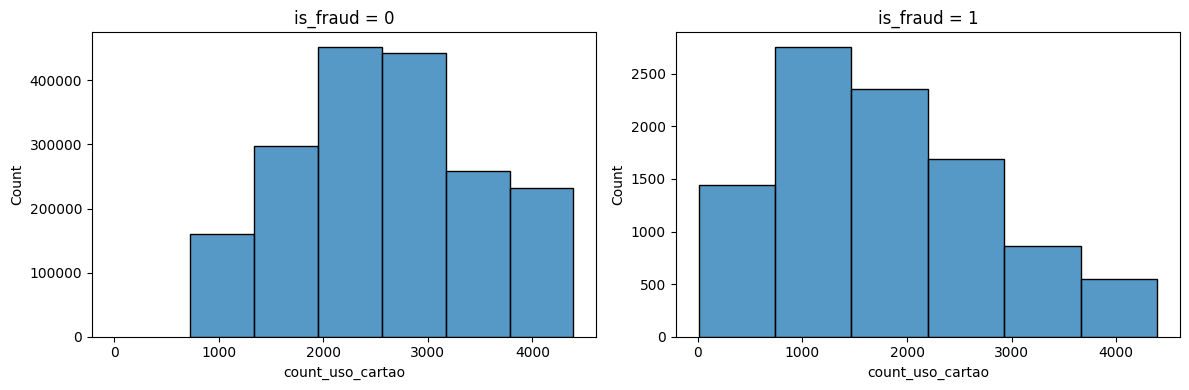

Categorias √∫nicas: [4 6 1 2 3 5]


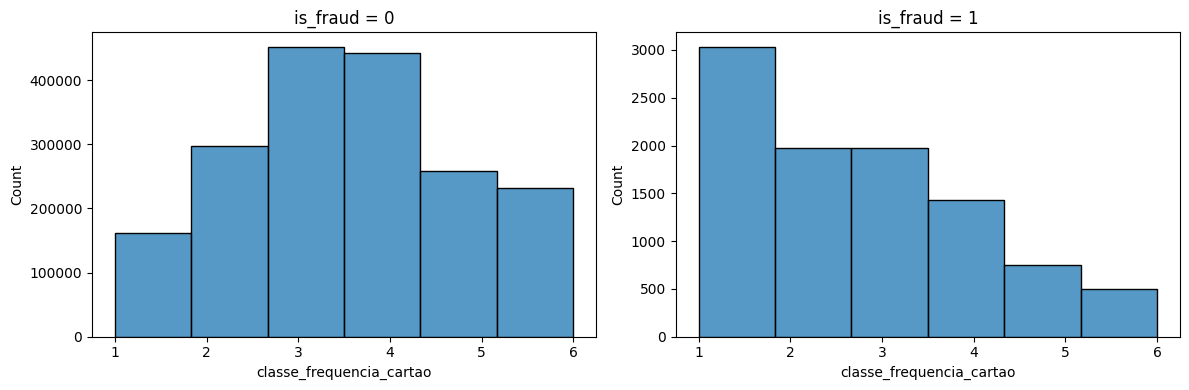

In [ ]:

# Fun√ß√£o para exibir histogramas lado a lado
def hist_show(col):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
    for i in [0, 1]:
        sns.histplot(df_total[df_total["is_fraud"] == i][col], bins=6, ax=axs[i])
        axs[i].set_title(f'is_fraud = {i}')
    plt.tight_layout()
    plt.show()

# Contar quantas vezes cada cart√£o aparece na base
df_qtd_uso_cartoes = df_total.groupby('cc_num').size().reset_index(name='count_uso_cartao')

# Juntar essa informa√ß√£o de volta ao DataFrame original
df_total = df_total.merge(df_qtd_uso_cartoes, on='cc_num', how='left')

# Mostrar histograma da contagem original
hist_show('count_uso_cartao')

# Fun√ß√£o para classificar o uso do cart√£o em faixas
def class_det(x):
    for idx, val in enumerate(range(800, 5000, 800)):
        if x < val:
            return idx + 1
    return len(range(800, 5000, 800)) + 1  # Classe extra se acima de 5000

# Criar vari√°vel categ√≥rica
df_total['classe_frequencia_cartao'] = df_total['count_uso_cartao'].apply(class_det)

#  Verificar as classes √∫nicas
print("Categorias √∫nicas:", df_total['classe_frequencia_cartao'].unique())

#  Exibir histograma da vari√°vel categorizada
hist_show('classe_frequencia_cartao')



# Define o √≠ndice novamente (foi desconfigurado nos processos anteriores)
df_total.set_index("index", inplace=True)

df_total.index.name = None #tira o cabecalho da variavel da primeira linha do df


#Aplica def de reorganizar colunas 
df_total = mover_target_para_final(df_total, 'is_fraud')

# 3.8 Transforma√ß√£o de Hor√°rio em Vari√°veis C√≠clicas (Seno e Cosseno)
 
A vari√°vel time, que representa o hor√°rio da transa√ß√£o, possui natureza c√≠clica, ou seja, ap√≥s 23:59 o ciclo recome√ßa em 00:00. Modelos de Machine Learning n√£o entendem esse padr√£o circular por padr√£o, e tratam 23h e 0h como distantes, quando na verdade s√£o muito pr√≥ximas.

Para capturar essa ciclicidade corretamente, transformamos a hora em duas novas vari√°veis usando fun√ß√µes trigonom√©tricas:

time_sin = sin(2œÄ * hora / 24)

time_cos = cos(2œÄ * hora / 24)

Essas vari√°veis projetam o hor√°rio em um c√≠rculo unit√°rio, permitindo que o modelo entenda a transi√ß√£o natural entre hor√°rios e aprenda padr√µes temporais com mais precis√£o.

Essa t√©cnica √© especialmente √∫til em modelos lineares, onde rela√ß√µes c√≠clicas n√£o s√£o captadas automaticamente.

* tambem e feita para o mes do ano 

In [38]:

# Converter a coluna 'time' de string para datetime.time
df_total['time'] = pd.to_datetime(df_total['time'], format='%H:%M:%S').dt.time

# Extrair a hora, minuto e segundo como n√∫mero decimal de hora
df_total['hora_decimal'] = df_total['time'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

# Codifica√ß√£o c√≠clica: seno e cosseno da hora do dia
df_total['time_sin'] = np.sin(2 * np.pi * df_total['hora_decimal'] / 24)
df_total['time_cos'] = np.cos(2 * np.pi * df_total['hora_decimal'] / 24)

# Codifica√ß√£o c√≠clica: seno e cosseno  m√™s do ano (1 a 12)
df_total['month_sin'] = np.sin(2 * np.pi * df_total['month'] / 12)
df_total['month_cos'] = np.cos(2 * np.pi * df_total['month'] / 12)


#dropando variavel 'time' apos transformaca, caso ela seja necessaia para calcular o tempo entre trnasacoes (se essa variavel for viabilizada, esta em analise se faz sentido) 
#basta comentar essa parte do codigo que ela se mantem 

# Dropando colunas desnecessarias
colunas_excluir = ['time','hora_decimal']  #hora_decimal foi somente para clcular o sen e cos 
df_total = Limpa_df(df_total, colunas_excluir)


#visualizando nova feature
pd.set_option('display.max_rows', None)
df_total.head(10)

trans_date_trans_time            cc_num                      merchant       category    amt gender                          street            city state    zip   lat    long                                job  merch_lat  merch_long  distancia_km faixa_distancia  horas_entre_transacoes  age     bin  day_of_week  month  hour            period  count_tran_ult_jan_temp  count_uso_cartao  classe_frequencia_cartao  is_fraud  time_sin  time_cos  month_sin  month_cos
0b242abb623afc578575680df30655b9   2019-01-01 00:00:18  2703186189652095          Rippin, Kub and Mann       misc_net   4.97      F                  561 Perry Cove  Moravian Falls    NC  28654 36.08  -81.18          Psychologist, counselling      36.01      -82.05          0.00   Sem dist√¢ncia                       0   31  270318            1      1     0  Madrugada In√≠cio                        0              2927                         4         0      0.00      1.00       0.50       0.87
1f76529f8574734946361c461b024d99   2019-01-01 00:00:44      630423337322     Heller, Gutmann and Zieme    grocery_pos 107.23      F    43039 Riley Greens Suite 393          Orient    WA  99160 48.89 -118.21  Special educational needs teacher      49.16     -118.19         30.21       0 a 50 km                       0   41  630423            1      1     0  Madrugada In√≠cio                        0              4362                         6         0      0.00      1.00       0.50       0.87
a1a22d70485983eac12b5b88dad1cf95   2019-01-01 00:00:51    38859492057661                Lind-Buckridge  entertainment 220.11      M        594 White Dale Suite 530      Malad City    ID  83252 42.18 -112.26        Nature conservation officer      43.15     -112.15          0.00   Sem dist√¢ncia                       0   57  388594            1      1     0  Madrugada In√≠cio                        0               735                         1         0      0.00      1.00       0.50       0.87
6b849c168bdad6f867558c3793159a81   2019-01-01 00:01:16  3534093764340240  Kutch, Hermiston and Farrell  gas_transport  45.00      M     9443 Cynthia Court Apt. 038         Boulder    MT  59632 46.23 -112.11                    Patent attorney      47.03     -112.56         95.67     50 a 100 km                       0   52  353409            1      1     0  Madrugada In√≠cio                        0               743                         1         0      0.01      1.00       0.50       0.87
a41d7549acf90789359a9aa5346dcb46   2019-01-01 00:03:06   375534208663984                 Keeling-Crist       misc_pos  41.96      M                408 Bradley Rest        Doe Hill    VA  24433 38.42  -79.46     Dance movement psychotherapist      38.67      -78.63         77.56     50 a 100 km                       0   33  375534            1      1     0  Madrugada In√≠cio                        0              2922                         4         0      0.01      1.00       0.50       0.87
189a841a0a8ba03058526bcfe566aab5   2019-01-01 00:04:08  4767265376804500    Stroman, Hudson and Erdman  gas_transport  94.63      F               4655 David Island          Dublin    PA  18917 40.38  -75.20                  Transport planner      40.65      -76.15         85.92     50 a 100 km                       0   58  476726            1      1     0  Madrugada In√≠cio                        0               736                         1         0      0.02      1.00       0.50       0.87
83ec1cc84142af6e2acf10c44949e720   2019-01-01 00:04:42    30074693890476               Rowe-Vandervort    grocery_net  44.54      F     889 Sarah Station Suite 624         Holcomb    KS  67851 37.99 -100.99                    Arboriculturist      37.16     -100.15          0.00   Sem dist√¢ncia                       0   26  300746            1      1     0  Madrugada In√≠cio                        0              2933                         4         0      0.02      1.00       0.50       0.87
6d294ed2cc447d2c71c7171a3d54967c   2019-01-01 0

# Analisando alguns pontos antes de modelar 

* verificando os tipos das variaveis e a contagem de categorias das categoricas 
    * das 3 categoricas e possivel notar que a vartaivel bin que corresponde ao codigo do suposto banco de cada transacao, tem muitas categorias (muitos bancos) isso torna inviavel one hot encoder
    * Entao na celula seguinte, foi verificado dos bancos mais ofensores em percentual de fraudes por transacao, para encontrar algum padrao 
    * Dado isso, ser√° aplicada uma transforma√ß√£o de Target Encoding (neste caso, Mean Encoding), que substitui cada categoria de bin pela m√©dia do target (propor√ß√£o m√©dia de fraude) dentro daquela categoria. 
        * Para evitar overfitting e vazamento de dados, a codifica√ß√£o ser√° aplicada separadamente dentro de cada fold durante a valida√ß√£o cruzada e, posteriormente, no conjunto de teste de forma independente. 
        * Al√©m disso, ser√° utilizado o par√¢metro smoothing, que atua como uma forma de regulariza√ß√£o. O smoothing realiza um balanceamento entre a m√©dia do target por categoria e a m√©dia global do target, dando mais peso √† m√©dia global em categorias com poucas observa√ß√µes. Isso ajuda a suavizar os valores atribu√≠dos a categorias raras e reduz o risco de superestimar seu efeito, tornando o modelo mais robusto.

In [39]:

# VERIFICANDO OS TIPOS PARA POSSIVEL TRANSFORMACAO 
print(df_total.dtypes)

print('')
# Selecionar colunas do tipo object
object_cols = df_total.select_dtypes(include='object').columns

# Contar categorias √∫nicas em cada uma
for col in object_cols:
    print(f"{col}: {df_total[col].nunique()} categorias √∫nicas")



trans_date_trans_time       datetime64[ns]
cc_num                               int64
merchant                            object
category                            object
amt                                float64
gender                              object
street                              object
city                                object
state                               object
zip                                  int64
lat                                float64
long                               float64
job                                 object
merch_lat                          float64
merch_long                         float64
distancia_km                       float64
faixa_distancia                   category
horas_entre_transacoes               int64
age                                  int64
bin                                 object
day_of_week                          int32
month                                int32
hour                                 int32
period     

In [40]:
# Agrupamento por bin com os indicadores
resumo_bin = (
    df_total
    .groupby('bin')
    .agg(
        proporcao_fraude=('is_fraud', 'mean'),
        contagem_fraude=('is_fraud', 'sum'),
        total_transacoes=('is_fraud', 'count')
    )
    .reset_index()
    .sort_values(by='proporcao_fraude', ascending=False)
)

# Auemntar para uns 100 para ver a quebra dos bancos mais ofensores em percentual
resumo_bin.head(10) 


bin  proporcao_fraude  contagem_fraude  total_transacoes
27   180098              1.00               12                12
4    180020              1.00               12                12
26   180097              1.00                7                 7
7    180038              1.00               10                10
960  676179              1.00               11                11
259  352804              1.00               11                11
603  441767              1.00               11                11
299  354733              1.00               11                11
283  354041              1.00                8                 8
922  651777              1.00               11                11

In [41]:
# Dropando colunas desnecessarias
#hour sai porque ja foi criada variaveis ciclicas com  Sen e Cos 
colunas_excluir = ['lat', 'long', 'merch_lat', 'merch_long','cc_num','hour']
df_total = Limpa_df(df_total, colunas_excluir)
df_total.head()

trans_date_trans_time                      merchant       category    amt gender                        street            city state    zip                                job  distancia_km faixa_distancia  horas_entre_transacoes  age     bin  day_of_week  month            period  count_tran_ult_jan_temp  count_uso_cartao  classe_frequencia_cartao  is_fraud  time_sin  time_cos  month_sin  month_cos
0b242abb623afc578575680df30655b9   2019-01-01 00:00:18          Rippin, Kub and Mann       misc_net   4.97      F                561 Perry Cove  Moravian Falls    NC  28654          Psychologist, counselling          0.00   Sem dist√¢ncia                       0   31  270318            1      1  Madrugada In√≠cio                        0              2927                         4         0      0.00      1.00       0.50       0.87
1f76529f8574734946361c461b024d99   2019-01-01 00:00:44     Heller, Gutmann and Zieme    grocery_pos 107.23      F  43039 Riley Greens Suite 393          Orient    WA  99160  Special educational needs teacher         30.21       0 a 50 km                       0   41  630423            1      1  Madrugada In√≠cio                        0              4362                         6         0      0.00      1.00       0.50       0.87
a1a22d70485983eac12b5b88dad1cf95   2019-01-01 00:00:51                Lind-Buckridge  entertainment 220.11      M      594 White Dale Suite 530      Malad City    ID  83252        Nature conservation officer          0.00   Sem dist√¢ncia                       0   57  388594            1      1  Madrugada In√≠cio                        0               735                         1         0      0.00      1.00       0.50       0.87
6b849c168bdad6f867558c3793159a81   2019-01-01 00:01:16  Kutch, Hermiston and Farrell  gas_transport  45.00      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632                    Patent attorney         95.67     50 a 100 km                       0   52  353409            1      1  Madrugada In√≠cio                        0               743                         1         0      0.01      1.00       0.50       0.87
a41d7549acf90789359a9aa5346dcb46   2019-01-01 00:03:06                 Keeling-Crist       misc_pos  41.96      M              408 Bradley Rest        Doe Hill    VA  24433     Dance movement psychotherapist         77.56     50 a 100 km                       0   33  375534            1      1  Madrugada In√≠cio                        0              2922                         4         0      0.01      1.00       0.50       0.87

# 4 Modelagem 

* aqui inicia-se algumas pre-analises e selecao de features e depois a modelagem em si 

# 4.1 Divisao treino e teste

In [ ]:

X = df_total.drop('is_fraud', axis=1)
y = df_total['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Dropa as vari√°veis indesejadas em treino e teste
cols_to_drop = ['trans_date_trans_time', 'cc_num']
X_train = X_train.drop(columns=cols_to_drop, errors='ignore')
X_test = X_test.drop(columns=cols_to_drop, errors='ignore')
X  = X.drop(columns=cols_to_drop, errors='ignore')


print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)
print("Total shape:", X.shape, y.shape)

print("Checagem duplicidade entre conjuntos:", set(X_train.index) & set(X_test.index))  

# Junta X_train e y_train para uso no Optuna
df_train = X_train.copy()
df_train['is_fraud'] = y_train

target = 'is_fraud'



print('Distribuicao Geral das classes :', y.value_counts(normalize=True).map('{:.4%}'.format))
print('Distribuicao das classes em Treino:', y_train.value_counts(normalize=True).map('{:.4%}'.format) )
print('Distribuicao das classes em Teste:', y_test.value_counts(normalize=True).map('{:.4%}'.format) )

Train shape: (1296675, 24) (1296675,)
Test shape: (555719, 24) (555719,)
Total shape: (1852394, 24) (1852394,)
Checagem duplicidade entre conjuntos: set()
Distribuicao Geral das classes : is_fraud
0    99.4790%
1     0.5210%
Name: proportion, dtype: object
Distribuicao das classes em Treino: is_fraud
0    99.4790%
1     0.5210%
Name: proportion, dtype: object
Distribuicao das classes em Teste: is_fraud
0    99.4791%
1     0.5209%
Name: proportion, dtype: object


# 4.2 Analisando correlacoes 

* Analisando correlacoes 
    * a funcao aqui aplica as mesmas transformacoes que sao aplicadas no treino e no teste, mas com uma funcao separada para deixar as usadas no modelo somente para o modelo 
    * e feita uam copia do df_treino para preservar o df_treino do modelo. 

* Definindo funcoes transformadoras nas variaveis que serao usadas para feature importance, analise de correlacoes e fornecidas finalmente para o modelo 

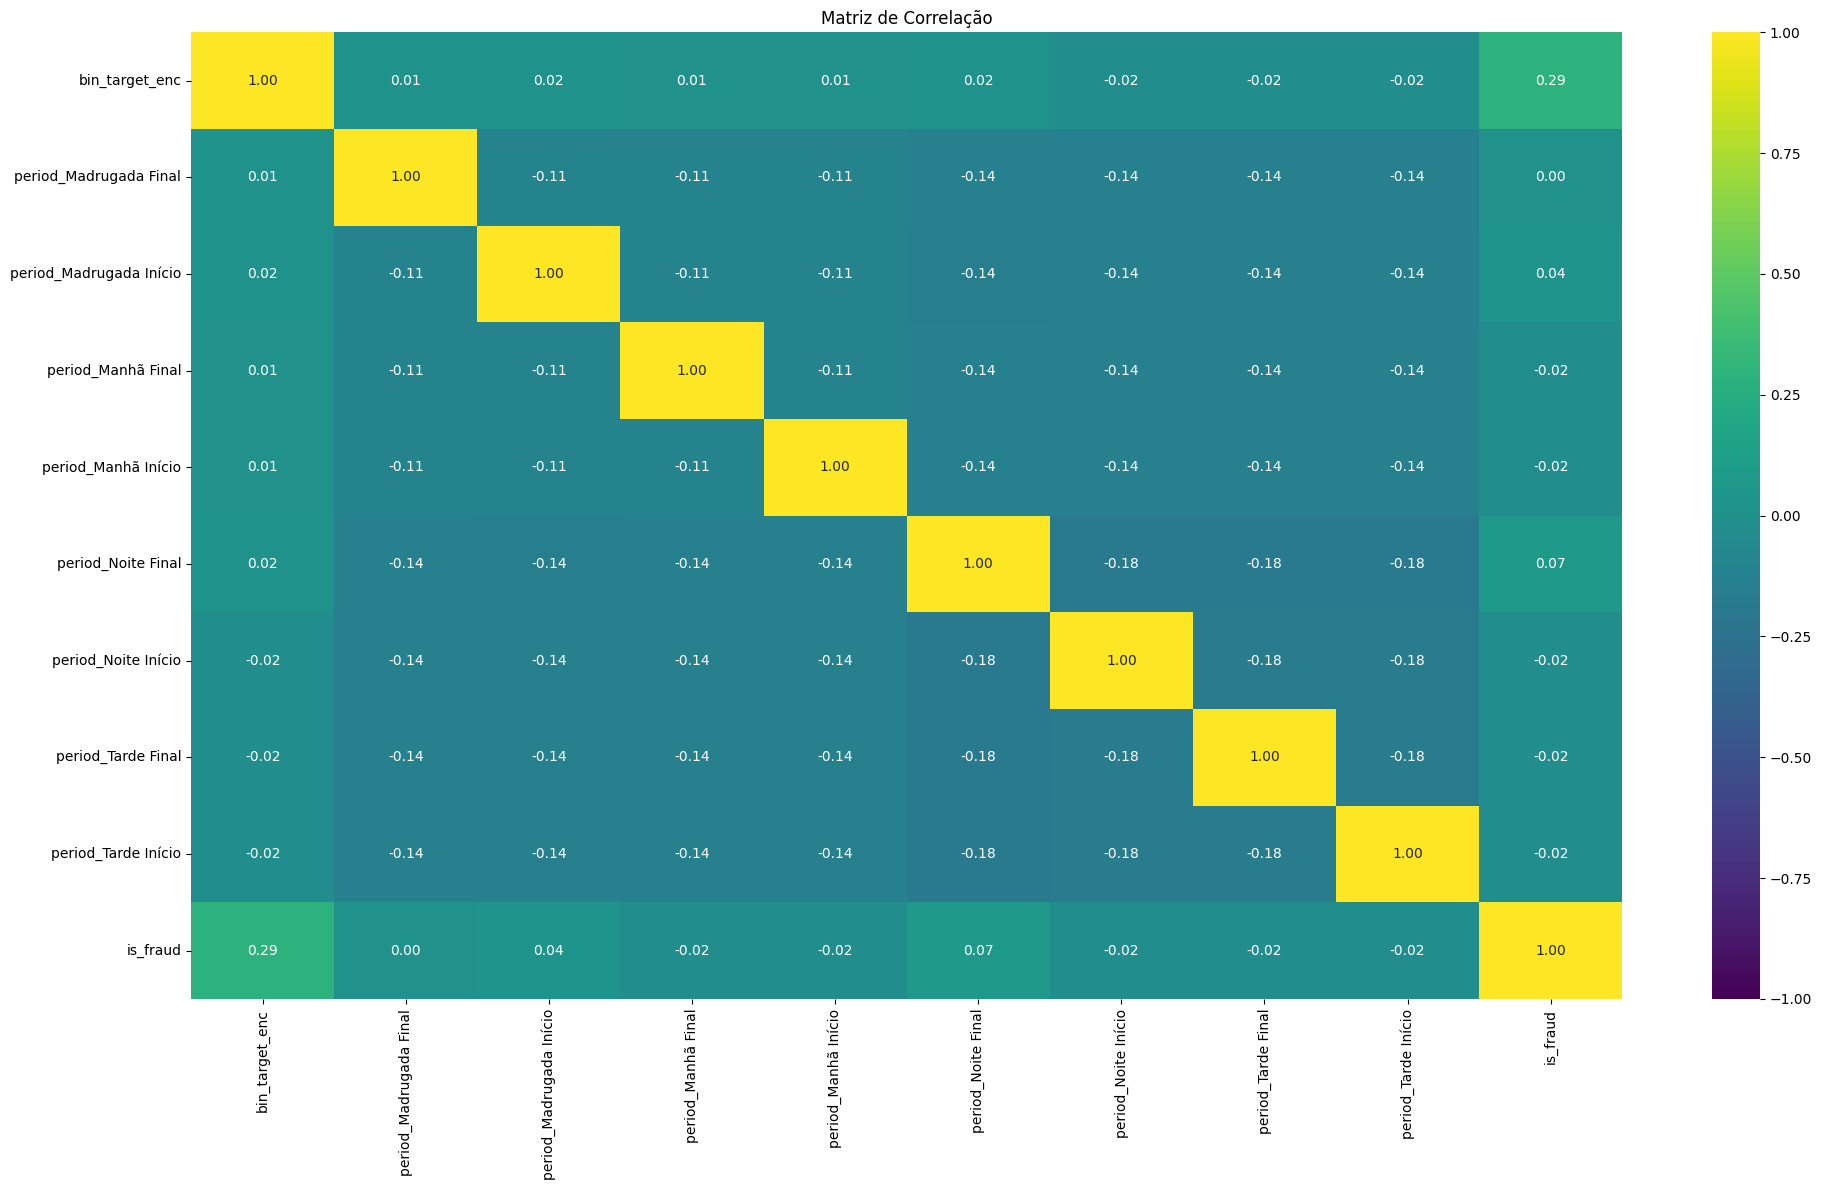

In [ ]:

def prepare_df_train_temp(df_train, target):

    '''funcoes transformadoras aplicadas somente dentro dessa def 
    (os tratamentos oficiais acontecem dentro dos pipelines)'''

    
    #  Target Encoding
    def apply_target_encoding(train, val_or_test, col, target, smoothing=15):
        global_mean = train[target].mean()
        stats = train.groupby(col)[target].agg(['mean', 'count'])
        smooth = (stats['mean'] * stats['count'] + global_mean * smoothing) / (stats['count'] + smoothing)
        encoded_col = val_or_test[col].map(smooth).fillna(global_mean)
        return encoded_col

    
      # One-Hot Encoding para colunas categ√≥ricas
    
    def fit_transform_ohe(train_df, val_df, col):
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        train_encoded = ohe.fit_transform(train_df[[col]])
        val_encoded = ohe.transform(val_df[[col]])

        train_ohe = pd.DataFrame(train_encoded, columns=[f"{col}_{cat}" for cat in ohe.categories_[0]], index=train_df.index)
        val_ohe = pd.DataFrame(val_encoded, columns=[f"{col}_{cat}" for cat in ohe.categories_[0]], index=val_df.index)

        return train_ohe, val_ohe, ohe

    # Cria uma c√≥pia para preservar o original
    df_train_temp = df_train.copy()
    

    #  Target Encoding 
    df_train_temp['bin_target_enc'] = apply_target_encoding(df_train, df_train_temp, 'bin', target)

    #  OneHot Encoding 
    #_, ohe_cat_df, ohe_cat = fit_transform_ohe(df_train, df_train_temp, 'category')
    _, ohe_period_df, ohe_period = fit_transform_ohe(df_train, df_train_temp, 'period')

    #  Junta todas as features 
    #X_temp = pd.concat([df_train_temp[['bin_target_enc']], ohe_cat_df, ohe_period_df], axis=1)
    X_temp = pd.concat([df_train_temp[['bin_target_enc']], ohe_period_df], axis=1)

    #  Scaling 
    scaler = StandardScaler()
    X_temp_scaled = scaler.fit_transform(X_temp)

    # Retorna como DataFrame para an√°lise de correla√ß√£o
    X_temp_scaled_df = pd.DataFrame(X_temp_scaled, columns=X_temp.columns, index=df_train_temp.index)
    X_temp_scaled_df[target] = df_train_temp[target]  # anexa target para facilitar an√°lise

    return X_temp_scaled_df




#chamando def 
df_train_temp = prepare_df_train_temp(df_train, target)


# Suprimir todos os warnings
warnings.filterwarnings("ignore")

# Criar a figura com 1 subgr√°fico (apenas o gr√°fico de correla√ß√£o)
fig, axes = plt.subplots(1, 1, figsize=(20, 12))

# Matriz de correla√ß√£o
sns.heatmap(df_train_temp.corr(), annot=True, cmap="viridis", fmt=".2f", ax=axes, vmin=-1, vmax=1)
axes.set_title('Matriz de Correla√ß√£o')

# Ajustar o layout
plt.tight_layout()
plt.show()



# 4.3 Importancias das variaveis com Mutual Information

* aqui tem um ranking de variaveis caso queria as x features mais importantes, mas acabei nao aplicando nenhum filtro no modelo final, foram todas e foram tratadas dentro do pipeline

In [45]:
df_train.head(5)

merchant       category   amt gender                        street          city state    zip                      job  distancia_km faixa_distancia  horas_entre_transacoes  age     bin  day_of_week  month           period  count_tran_ult_jan_temp  count_uso_cartao  classe_frequencia_cartao  time_sin  time_cos  month_sin  month_cos  is_fraud
9006071a5e8236bb033f9b2ca5e90d87     Streich, Hansen and Veum  gas_transport 62.29      F              9412 Harris Mews       O Brien    TX  79539            Warden/ranger         70.63     50 a 100 km                       7   37  382956            5     10  Madrugada Final                        0              2930                         4      0.90      0.44      -0.87       0.50         0
ac2d8ed507b62698aa5c344f1c1f9c88               Stiedemann Inc       misc_pos  5.56      M   428 Michael Tunnel Apt. 377     Cleveland    AL  35049               Aid worker         25.47       0 a 50 km                       3   42  414963            4     11     Noite In√≠cio                        0              2917                         4     -0.98      0.22      -0.50       0.87         0
cd4a1a4fe9a5de2e49fd1f9ffdd7d956                 Botsford Ltd   shopping_pos  9.90      F  03090 Fisher Forges Apt. 200       Wichita    KS  67216         Textile designer         21.08       0 a 50 km                      55   90  356024            2      8      Manh√£ Final                        0               735                         1      0.49     -0.87      -0.87      -0.50         0
2cb6aeed31669f676c1789e3d44f6553  Lubowitz, Terry and Stracke  personal_care  6.29      M  841 Cheryl Centers Suite 115    Farmington    NY  14425           Cytogeneticist        104.09    100 a 120 km                       3   67  351489            6      3      Tarde Final                        0              2190                         3     -1.00     -0.01       1.00       0.00         0
12881b494567a8f8eaee4db02b73eedc  Turcotte, McKenzie and Koss  entertainment 20.71      F             4529 Cannon Alley  Center Point    WV  26339  Chief Executive Officer          0.00   Sem dist√¢ncia                       0   49  676298            1      7     Tarde In√≠cio                        0              2192                         3     -0.67     -0.75      -0.50      -0.87         0

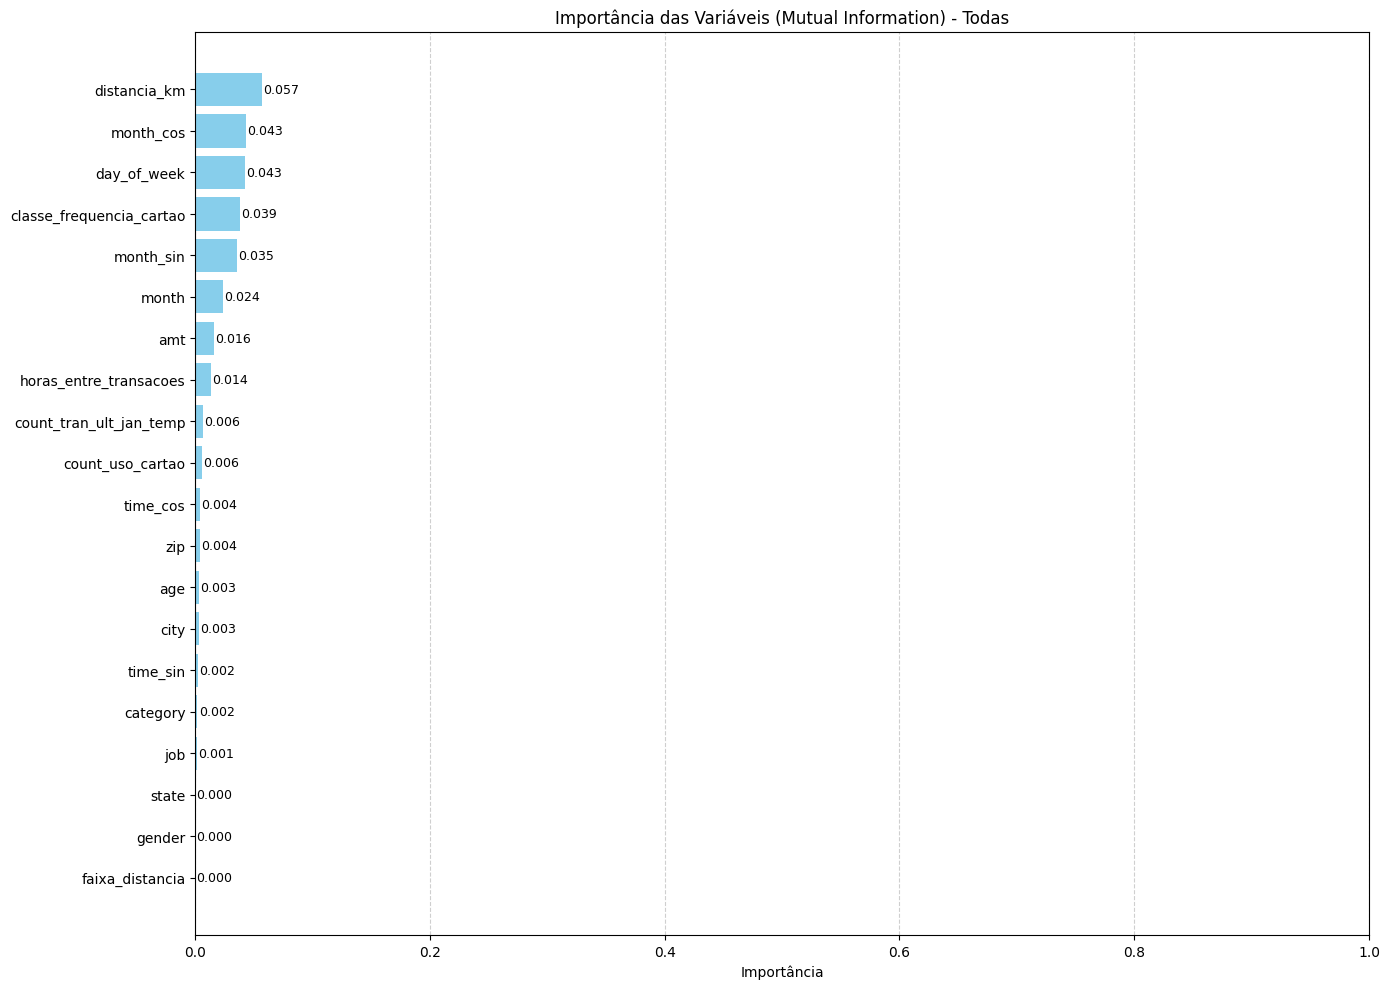

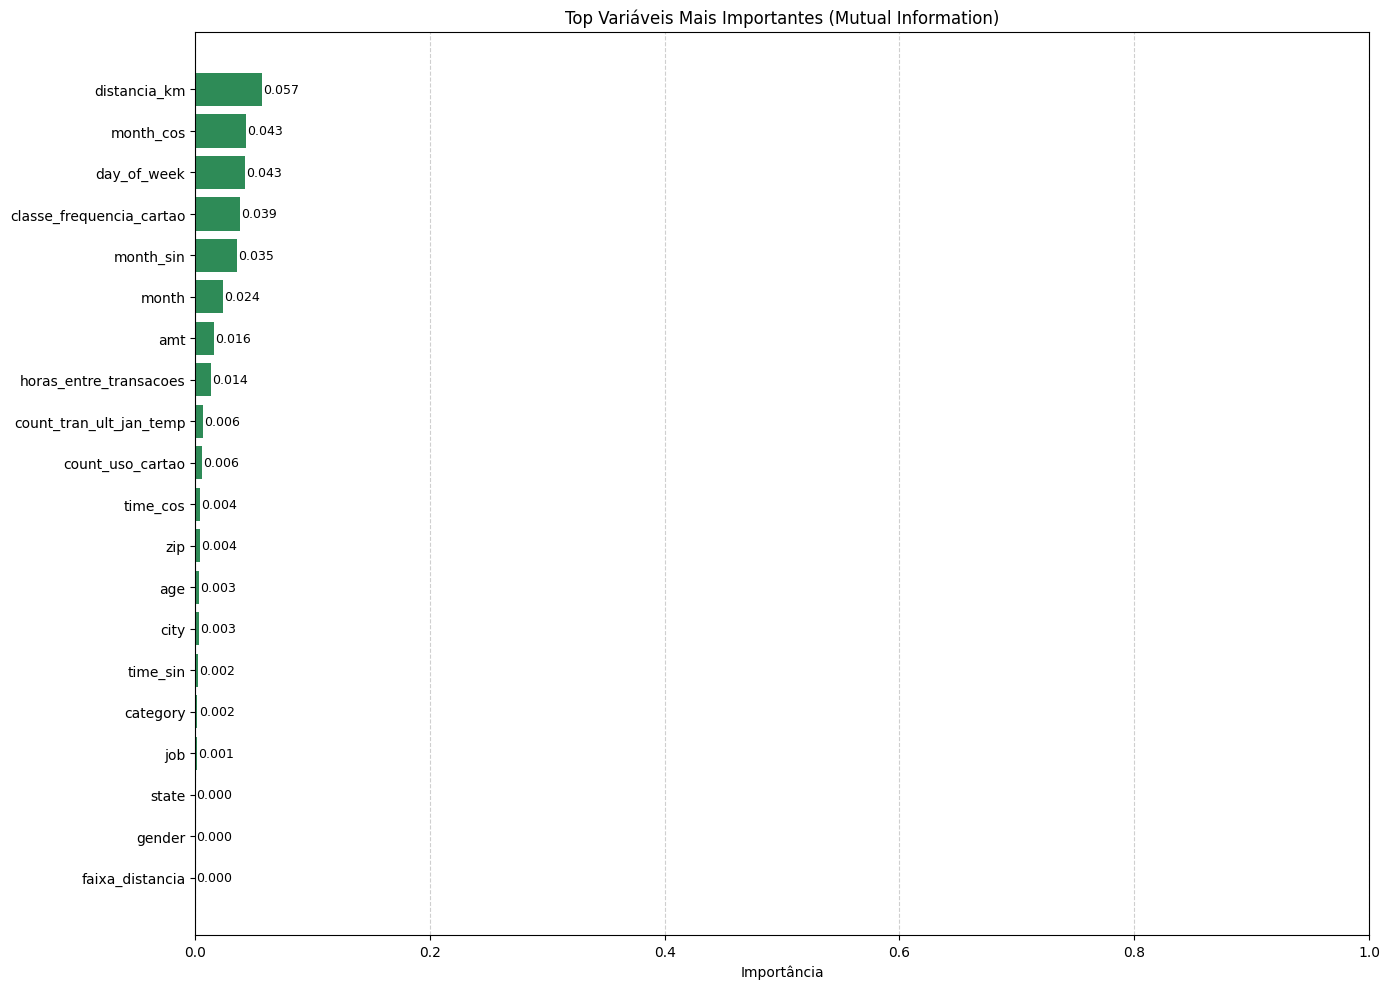

In [ ]:

warnings.filterwarnings("ignore")

# C√≥pia da base original
df_temp = df_train.copy()

# Define as vari√°veis obrigat√≥rias que sempre ficam
keep_vars = ['bin', 'period', target, 'merchant', 'street']  # Vari√°veis obrigat√≥rias

# Define X e y novamente
X = df_temp.drop(columns=keep_vars, errors='ignore')  # Remover as vari√°veis de keep_vars
y = df_temp[target]

# Separa as vari√°veis categ√≥ricas e num√©ricas
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
#print(cat_cols)
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
#print(num_cols)


# Garante que X j√° est√° sem as keep_vars
X_mi = X.copy()
y = df_temp[target]

# Recalcula as colunas categ√≥ricas e num√©ricas (sem keep_vars)
cat_cols_mi = X_mi.select_dtypes(exclude=[np.number]).columns.tolist()
num_cols_mi = X_mi.select_dtypes(include=[np.number]).columns.tolist()

# Codifica vari√°veis categ√≥ricas com OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_mi[cat_cols_mi] = encoder.fit_transform(X_mi[cat_cols_mi])

# Normaliza vari√°veis num√©ricas
scaler = StandardScaler()
X_mi[num_cols_mi] = scaler.fit_transform(X_mi[num_cols_mi])

# Calcula Mutual Information
mi = mutual_info_classif(
    X_mi,
    y,
    discrete_features=[col in cat_cols_mi for col in X_mi.columns],
    random_state=42
)

# Organiza os resultados
mi_importances = pd.Series(mi, index=X_mi.columns, name="MutualInformation")

# Seleciona as top 30 vari√°veis mais importantes
top = mi_importances.sort_values(ascending=False).head(30).index.tolist()

# Atualiza df_train com as top vari√°veis + vari√°veis obrigat√≥rias
df_train = df_temp[top + keep_vars]



# üìä Gr√°fico com todas as vari√°veis num√©ricas
plt.figure(figsize=(14, 10))
mi_sorted = mi_importances.sort_values(ascending=True)
bars = plt.barh(mi_sorted.index, mi_sorted.values, color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, f'{width:.3f}',
             va='center', fontsize=9)

plt.title("Import√¢ncia das Vari√°veis (Mutual Information) - Todas")
plt.xlabel("Import√¢ncia")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# üìä Gr√°fico com apenas as top vari√°veis
plt.figure(figsize=(14, 10))
top_sorted = mi_importances[top].sort_values(ascending=True)
bars_top = plt.barh(top_sorted.index, top_sorted.values, color='seagreen')

for bar in bars_top:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, f'{width:.3f}',
             va='center', fontsize=9)

plt.title("Top Vari√°veis Mais Importantes (Mutual Information)")
plt.xlabel("Import√¢ncia")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [146]:
#df_train.head(5)

# 4.4 Analise de Outliers 

* AQUI SE ANALISOU OS OUTLIERS PARA TRATAMENTOS POSTERIOES, DENTRO DOS FOLDS, NO TREINAMENTO FINAL, E SEMPRE OBSERVANDO O CUIDADO PARA VAZAMENTO DE DADOS ENTRE TREINO E TESTE. 



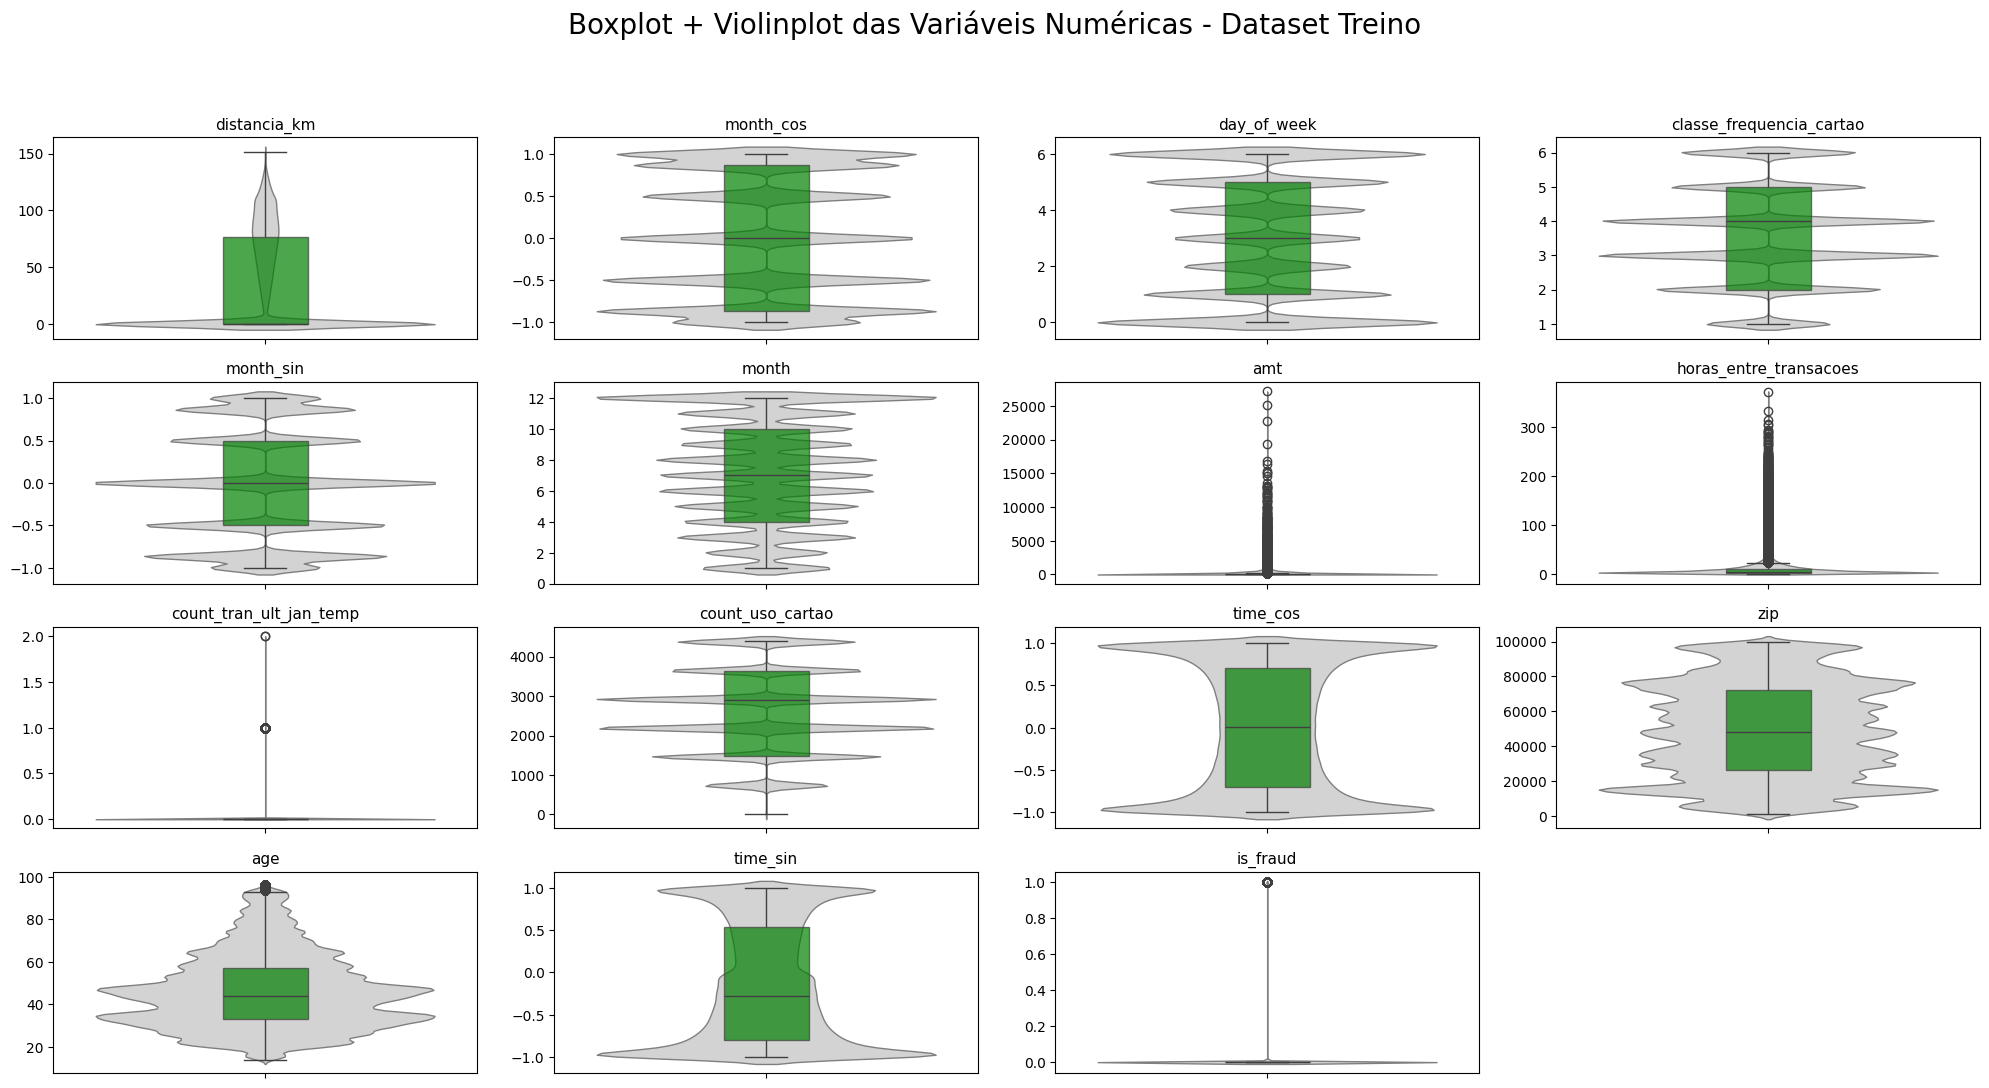

In [ ]:

# lista das vari√°veis num√©ricas que voc√™ quer visualizar
variaveis = df_train.select_dtypes(include='number').columns.tolist()

# tamanho da figura
plt.figure(figsize=(20, 16))

# loop de cria√ß√£o de subplots com boxplot + violinplot
for i, var in enumerate(variaveis):
    plt.subplot(6, 4, i + 1)  # define a grade de 6 linhas x 4 colunas (ajuste conforme o n√∫mero de vari√°veis)
    
    # violinplot com largura menor para n√£o sobrepor tanto
    sns.violinplot(y=df_train[var], inner=None, color='lightgray', linewidth=1)
    
    # boxplot por cima
    sns.boxplot(y=df_train[var],
                boxprops=dict(facecolor='green', alpha=0.7),
                width=0.2)
    
    plt.title(f'{var}', fontsize=11)
    plt.ylabel('')

# t√≠tulo geral
plt.suptitle('Boxplot + Violinplot das Vari√°veis Num√©ricas - Dataset Treino', fontsize=20)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



# 4.5 Testando Normalidade 

In [49]:
print("qtd de variaveis e observacoes usados no treino(aqui tem a target ainda):",df_train.shape)

qtd de variaveis e observacoes usados no treino(aqui tem a target ainda): (1296675, 25)


In [ ]:
'''Mantendo apenas as colunas presentes em df_train
 isso porque as tratativas de mutual importance foram feitos na copia do df_train e isso ocorreu depois da separacao de treino e teste, entao e a unica transformcao que acabou nao pegando no X_trian e X_test
 isso e so um filtro de seguranca, como foram usadas todas variaveis sem selecao de importancia, acabou que nao fez diferenca, mas caso um dia se aplique uma selecao o codigo deve entender 
 '''
colunas_validas = df_train.columns.intersection(X_train.columns)

# Filtrando X_train e X_test
X_train = X_train[colunas_validas]
X_test = X_test[colunas_validas]


In [51]:
X_train.shape

(1296675, 24)


üìä Analisando a vari√°vel: distancia_km
--------------------------------------------------
Estat√≠stica do teste (D‚ÄôAgostino): 1032082.0824
p-valor: 0.0000
‚ùå Pode n√£o seguir uma distribui√ß√£o normal.
Estat√≠stica do teste Anderson-Darling: 120022.0164
Valores Cr√≠ticos: [0.576 0.656 0.787 0.918 1.092]
N√≠veis de signific√¢ncia: [15.  10.   5.   2.5  1. ]
‚ùå A distribui√ß√£o n√£o √© normal.
Assimetria (Skew): 0.6123
Curtose (Kurtosis): -1.1798

üìä Analisando a vari√°vel: month_cos
--------------------------------------------------
Estat√≠stica do teste (D‚ÄôAgostino): 6891471.6377
p-valor: 0.0000
‚ùå Pode n√£o seguir uma distribui√ß√£o normal.
Estat√≠stica do teste Anderson-Darling: 60430.9630
Valores Cr√≠ticos: [0.576 0.656 0.787 0.918 1.092]
N√≠veis de signific√¢ncia: [15.  10.   5.   2.5  1. ]
‚ùå A distribui√ß√£o n√£o √© normal.
Assimetria (Skew): 0.0528
Curtose (Kurtosis): -1.5533

üìä Analisando a vari√°vel: day_of_week
------------------------------------------------

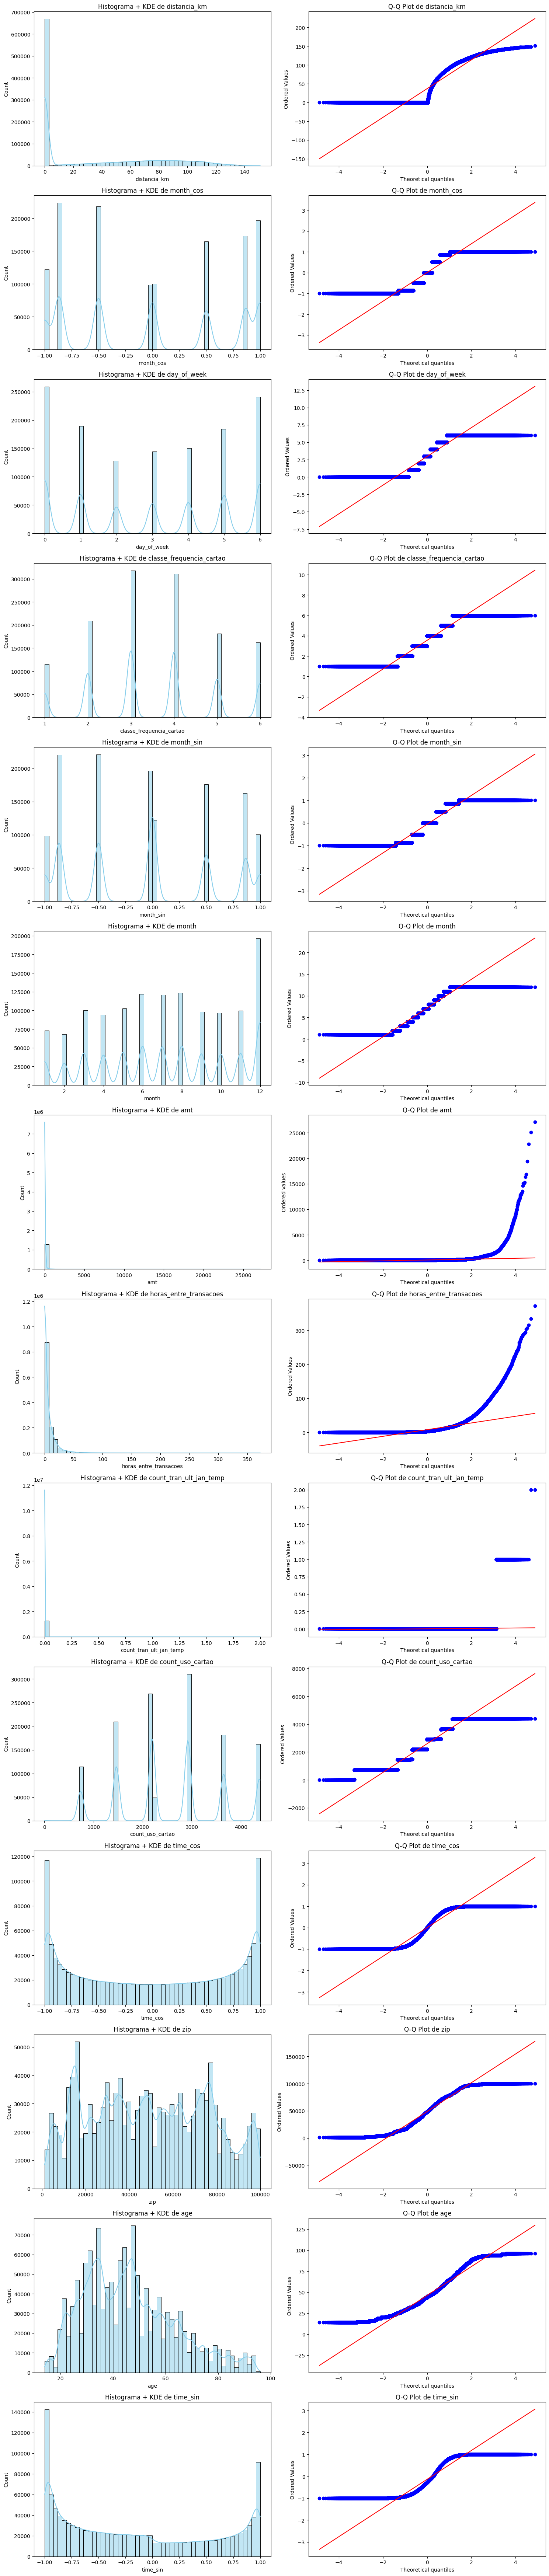

In [ ]:
#testando a normalidade dados colunas numericas, 

numerical_cols = X_train.select_dtypes(include='number').columns.tolist() #lista de variaveis numericas


def analisar_normalidade(df, colunas):

    ''' 
    Funcao que analisa as variaveis numericas antes das trasnformacoes, principalmente para determinar qual tratamento de outlier
    sera necessario no momento das transformacoes do pipeline para essas varaiveis e a determinacao disso na classe de transformacao
    de outlier. Alem de melhorar a compreensao das variaveis.  

    '''
    n_cols = 2  # N√∫mero de colunas para os gr√°ficos
    n_rows = (len(colunas) * 2 + 1) // n_cols  # Ajusta o n√∫mero de linhas para acomodar todos os gr√°ficos

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    axes = axes.flatten()  # Flatten para facilitar a indexa√ß√£o dos subgr√°ficos

    for i, col in enumerate(colunas):
        ax_hist = axes[2 * i]  # Posi√ß√£o do histograma + KDE
        ax_qq = axes[2 * i + 1]  # Posi√ß√£o do Q-Q plot

        print(f"\nüìä Analisando a vari√°vel: {col}")
        print("-" * 50)
        
        # Teste de D‚ÄôAgostino e Pearson
        try:
            stat, p_value = stats.normaltest(df[col].dropna())
            print(f"Estat√≠stica do teste (D‚ÄôAgostino): {stat:.4f}")
            print(f"p-valor: {p_value:.4f}")
            if p_value > 0.05:
                print("‚úÖ Parece seguir uma distribui√ß√£o normal.")
            else:
                print("‚ùå Pode n√£o seguir uma distribui√ß√£o normal.")
        except Exception as e:
            print(f"Erro ao executar o teste D‚ÄôAgostino: {e}")
            continue

        # Teste Anderson-Darling
        try:
            result = stats.anderson(df[col].dropna())
            print(f"Estat√≠stica do teste Anderson-Darling: {result.statistic:.4f}")
            print("Valores Cr√≠ticos:", result.critical_values)
            print("N√≠veis de signific√¢ncia:", result.significance_level)
            if result.statistic < result.critical_values[2]:
                print("‚úÖ Distribui√ß√£o normal (n√≠vel de signific√¢ncia de 5%).")
            else:
                print("‚ùå A distribui√ß√£o n√£o √© normal.")
        except Exception as e:
            print(f"Erro ao executar o teste Anderson-Darling: {e}")
            continue

        # C√°lculo de skew (assimetria) e kurtosis (curtose)
        skew = df[col].dropna().skew()
        kurtosis = df[col].dropna().kurtosis()
        print(f"Assimetria (Skew): {skew:.4f}")
        print(f"Curtose (Kurtosis): {kurtosis:.4f}")

        # Plot Histograma + KDE
        sns.histplot(df[col].dropna(), kde=True, bins=50, color='skyblue', ax=ax_hist)
        ax_hist.set_title(f"Histograma + KDE de {col}")

        # Q-Q Plot
        stats.probplot(df[col].dropna(), dist="norm", plot=ax_qq)
        ax_qq.set_title(f"Q-Q Plot de {col}")

    # Ajustar layout
    plt.tight_layout()
    plt.show()


#analisando 
analisar_normalidade(X_train, numerical_cols)





# 4.5 Determinando Classes para o Pipeline e separando listas de tratamento

In [ ]:

'''AQUI MUITA ATENCAO, AO ALTERAR QUALQUER CLASSE DEVE-SE COPIAR E COLAR NO custom_transformers.py 
    ELE E USADO PARA A APLICAR O MODELO ATRAVES DO PKL DO MODELO NO FINAL E GERAR AS ANALISES DE VIES DAS DECISOES 
    E INTERPRETABILIDADE DO MODELO

    POR ISSO ATE AS LIBS FORAM DEIXADAS AQUI PARA SIMILARIDADE COM O custom_transformers.py 
'''

# Importando as bibliotecas necess√°rias
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, OrdinalEncoder
from category_encoders.woe import WOEEncoder
import pandas as pd
import numpy as np


# Classe para transformar com Target Encoder
class TargetEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mapping_ = None

    def fit(self, X, y):
        col = X.columns[0]
        self.mapping_ = X[col].to_frame().join(pd.Series(y, name='target')).groupby(col)['target'].mean()
        return self

    def transform(self, X):
        X_transformed = X.copy()
        col = X.columns[0]
        X_transformed[col] = X_transformed[col].map(self.mapping_)
        X_transformed[col].fillna(0, inplace=True)
        return X_transformed


# Classe para transforma√ß√£o One Hot Encoder
class OneHotEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

    def fit(self, X, y=None):
        self.encoder.fit(X)
        return self

    def transform(self, X):
        encoded = self.encoder.transform(X)
        col_names = self.encoder.get_feature_names_out(X.columns)
        return pd.DataFrame(encoded, columns=col_names, index=X.index)


# Classe para transforma√ß√£o Yeo-Johnson
class YeoJohnsonTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, variaveis=None):
        """
        Classe para aplicar a transforma√ß√£o Yeo-Johnson nas vari√°veis espec√≠ficas.

        A transforma√ß√£o Yeo-Johnson √© uma t√©cnica estat√≠stica utilizada para estabilizar a vari√¢ncia e tornar os dados mais pr√≥ximos de uma distribui√ß√£o normal. 
        Diferente da Box-Cox, ela permite valores negativos e zero, ampliando seu uso. 
        √â especialmente √∫til para melhorar o desempenho de modelos que assumem normalidade.

        param variaveis: lista de vari√°veis para aplicar a transforma√ß√£o. Se None, aplica a todas as vari√°veis num√©ricas.
        """
        self.variaveis = variaveis
        self.transformer = PowerTransformer(method='yeo-johnson', standardize=False)  # Yeo-Johnson sem padroniza√ß√£o
    
    def fit(self, X, y=None):
        """
        Ajusta o transformer nas vari√°veis especificadas.
        :param X: DataFrame com os dados de treino.
        :param y: Ignorado (necess√°rio para compatibilidade com pipeline).
        """
        # Se a lista de vari√°veis for None, aplica a transforma√ß√£o em todas as colunas num√©ricas
        if self.variaveis is None:
            self.variaveis = X.select_dtypes(include=['number']).columns.tolist()

        # Verifica se todas as vari√°veis existem no DataFrame
        missing_vars = [var for var in self.variaveis if var not in X.columns]
        if missing_vars:
            raise ValueError(f"As seguintes vari√°veis n√£o existem no DataFrame: {', '.join(missing_vars)}")

        # Verifica e remove valores ausentes (NaN)
        if X[self.variaveis].isnull().any().any():
            raise ValueError("Existem valores ausentes nas vari√°veis selecionadas. Por favor, trate-os antes de aplicar a transforma√ß√£o.")
        
        # Ajusta o transformer com os dados das vari√°veis selecionadas
        self.transformer.fit(X[self.variaveis])
        return self
    
    def transform(self, X):
        """
        Aplica a transforma√ß√£o Yeo-Johnson nas vari√°veis especificadas.
        :param X: DataFrame com os dados para transforma√ß√£o.
        :return: DataFrame com as vari√°veis transformadas.
        """
        # Verifica se as vari√°veis foram previamente definidas
        if not self.variaveis:
            raise ValueError("Nenhuma vari√°vel definida para transforma√ß√£o.")
        
        X_transformed = X.copy()

        # Aplica a transforma√ß√£o nas vari√°veis selecionadas
        X_transformed[self.variaveis] = self.transformer.transform(X[self.variaveis])
        return X_transformed
    
    def fit_transform(self, X, y=None):
        """
        Ajusta e aplica a transforma√ß√£o Yeo-Johnson nas vari√°veis especificadas.
        :param X: DataFrame com os dados de treino.
        :param y: Ignorado (necess√°rio para compatibilidade com pipeline).
        :return: DataFrame com as vari√°veis transformadas.
        """
        self.fit(X, y)
        return self.transform(X)


# Classe para flag de outliers com base em percentis
class OutlierPercentilFlagTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, limites=(0.01, 0.01)):
        """
        Inicializa o transformador com limites inferiores e superiores para outliers, baseados em percentis.
        
        Par√¢metros:
            limites (tuple): Limites inferiores e superiores para identificar outliers com base em percentis (ex: (0.01, 0.01) = 1%).
        """
        self.limites = limites
        self.percentis_ = None

    def fit(self, X, y=None):
        """
        Ajusta o transformador aos dados de entrada, calculando os percentis para cada vari√°vel num√©rica.
        
        Par√¢metros:
            X (pd.DataFrame): Dados de entrada para ajuste (n√£o √© utilizado no c√°lculo, mas necess√°rio para o fit).
        
        Retorna:
            self: O pr√≥prio transformador.
        """
        # Calculando os percentis para cada vari√°vel num√©rica
        self.percentis_ = {}
        for col in X.select_dtypes(include=[np.number]).columns:
            p_inf = X[col].quantile(self.limites[0])
            p_sup = X[col].quantile(1 - self.limites[1])
            self.percentis_[col] = (p_inf, p_sup)

        return self

    def transform(self, X):
        """
        Transforma os dados de entrada, criando flags bin√°rias para os outliers com base em percentis.
        
        Par√¢metros:
            X (pd.DataFrame): Dados a serem transformados, com os quais as flags de outliers ser√£o geradas.
        
        Retorna:
            pd.DataFrame: DataFrame com as novas colunas de outliers adicionadas.
        """
        X_outliers = X.copy()
        
        for col, (p_inf, p_sup) in self.percentis_.items():
            nova_coluna = f'{col}_outlier'
            X_outliers[nova_coluna] = ((X_outliers[col] < p_inf) | (X_outliers[col] > p_sup)).astype(int)
        
        return X_outliers


# Classe para transforma√ß√£o WOE (Weight of Evidence)
class WoeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None):
        """
        cols: lista das colunas para aplicar o WOEEncoder.
        """
        self.cols = cols
        self.encoders_ = {}

    def fit(self, X, y):
        for col in self.cols:
            encoder = WOEEncoder()
            encoder.fit(X[col], y)
            self.encoders_[col] = encoder
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for col in self.cols:
            encoder = self.encoders_[col]
            X_transformed[col] = encoder.transform(X_transformed[col])
        return X_transformed


# Classe para transforma√ß√£o Ordinal Encoder
class OrdinalEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = OrdinalEncoder()

    def fit(self, X, y=None):
        self.encoder.fit(X)
        return self

    def transform(self, X):
        encoded = self.encoder.transform(X)
        return pd.DataFrame(encoded, columns=X.columns, index=X.index)


* WOEEncoder() transforma vari√°veis categ√≥ricas em valores num√©ricos com base na raz√£o entre eventos (ex: fraudes) e n√£o eventos, usando log-odds. Quanto maior o valor de WOE, maior a associa√ß√£o com o evento (fraude); quanto menor, maior a associa√ß√£o com a aus√™ncia do evento. Como o WOE j√° tem interpreta√ß√£o estat√≠stica, n√£o deve ser normalizado com StandardScaler, pois isso distorce seu significado.

In [54]:
print("Colunas dispon√≠veis em X antes do pipeline:")
for col in X_train.columns:
    print(f"{col} - {X_train[col].dtype}")


Colunas dispon√≠veis em X antes do pipeline:
distancia_km - float64
month_cos - float64
day_of_week - int32
classe_frequencia_cartao - int64
month_sin - float64
month - int32
amt - float64
horas_entre_transacoes - int64
count_tran_ult_jan_temp - int64
count_uso_cartao - int64
time_cos - float64
zip - int64
age - int64
city - object
time_sin - float64
category - object
job - object
state - object
gender - object
faixa_distancia - category
bin - object
period - object
merchant - object
street - object


separando variaveis pelo tipo, para aplicar as transformacaopes especificas em cada lista 

In [ ]:
# Listas organizadas de colunas
woe_cols = ['city', 'job', 'merchant', 'category', 'faixa_distancia']
target_enc_cols = ['bin', 'street', 'zip', 'state'] 
onehot_cols = ['period', 'gender', 'day_of_week']

ordinal_cols = ['classe_frequencia_cartao']

yeojohnson_cols = ['distancia_km','amt', 'horas_entre_transacoes', 'count_tran_ult_jan_temp', 'count_uso_cartao']



numerical_cols_auto = [col for col in numerical_cols if col not in ['zip', 'day_of_week', 'classe_frequencia_cartao', 'time_cos','time_sin','month_sin','month_cos']] #variaveis ja trasnformadas ou sem necessidade de aplicar tranformacoes 
                                                                                                                                                                      #NUMERICAS no pipeline(elas CONTINUAM NO MODELO)
numericas = numerical_cols_auto  


# 4.6 Estudo com Optuna: Melhores hiperparametros & Pipelines

* aqui comeca o estudo, foram estudados 4 modelos 
    * Xgboost, HistGB, MLPC e LogReg 

In [ ]:

warnings.filterwarnings("ignore", message="A module that was compiled using NumPy 1.x cannot be run in NumPy 2.1.3")
 
#reclama por incompatibilidade com aversao do numpy antes e do numpy que o torch usa, se der problema mais pra 
# frente so comentar esse trecho, instalar as lib nas versoes novas e ser feliz 


# Verifica se h√° GPU dispon√≠vel
use_gpu = torch.cuda.is_available()
device = "cuda" if use_gpu else "cpu"
tree_method_ = "gpu_hist" if use_gpu else "hist"

print(f"Usando GPU: {use_gpu}")
print(f"M√©todo de √°rvore: {tree_method_}")

# ==================== Vari√°veis Globais ==================== 
threshold = 0.5
n_trials_ = 20
n_splits_ = 5

weights_skf = {
    'Accuracy': 0.0,          # Mede a acur√°cia do modelo nas predicoes
    'f1': 0.15,               # M√©dia harm√¥nica entre precis√£o e recall (equil√≠brio entre recall e precision)
    'precision': 0.30,        # Indica a propor√ß√£o de positivos corretos (penaliza falsos positivos)
    'recall': 0.40,           # Mede quantos positivos reais foram capturados (importante em fraudes)
    'auc': 0.05,              # Mede a capacidade geral de separa√ß√£o entre classes
    'balanced_acc': 0.0,      # M√©dia das acur√°cias por classe 
    'mcc': 0.1                # Avalia correla√ß√£o entre predi√ß√µes e r√≥tulos 
}


# ==================== Fun√ß√£o de Gera√ß√£o de Folds e Treinamento ====================

def generate_folds_and_train(trial, X, y, pipeline, n_splits=n_splits_, smote=None):
    global weights_skf  # dicion√°rio com os pesos de cada m√©trica

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    weighted_scores = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        start_time = time.time()

        X_train, X_val = X.iloc[train_idx].copy(), X.iloc[val_idx].copy()
        y_train, y_val = y.iloc[train_idx].copy(), y.iloc[val_idx].copy()

        assert set(X.columns) == set(X_train.columns), "Colunas inconsistentes entre X e os folds!"

        if smote is not None:
            X_train, y_train = smote.fit_resample(X_train, y_train)

        pipeline.fit(X_train, y_train)
        probs = pipeline.predict_proba(X_val)[:, 1]
        preds = (probs >= threshold).astype(int)

        # M√©tricas individuais
        acc          = accuracy_score(y_val, preds)
        f1           = f1_score(y_val, preds)
        precision    = precision_score(y_val, preds, zero_division=0)
        recall       = recall_score(y_val, preds)
        auc          = roc_auc_score(y_val, probs)
        balanced_acc = balanced_accuracy_score(y_val, preds)
        mcc          = matthews_corrcoef(y_val, preds)

        # Score ponderado (forma expl√≠cita)
        fold_weighted_score = (
            weights_skf.get('Accuracy', 0)     * acc +
            weights_skf.get('f1', 0)           * f1 +
            weights_skf.get('precision', 0)    * precision +
            weights_skf.get('recall', 0)       * recall +
            weights_skf.get('auc', 0)          * auc +
            weights_skf.get('balanced_acc', 0) * balanced_acc +
            weights_skf.get('mcc', 0)          * mcc
        )

        weighted_scores.append(fold_weighted_score)

        elapsed = time.time() - start_time
        print(
            f"üìÅ Fold {fold}/{n_splits} | "
            f"Accuracy: {acc:.4f} | "
            f"F1: {f1:.4f} | "
            f"Precision: {precision:.4f} | "
            f"Recall: {recall:.4f} | "
            f"AUC: {auc:.4f} | "
            f"Balanced Acc: {balanced_acc:.4f} | "
            f"MCC: {mcc:.4f} | "
            f"Weighted Score: {fold_weighted_score:.4f} | "
            f"Tempo: {elapsed:.2f}s"
        )

    # Retorna a m√©dia das pontua√ß√µes ponderadas calculadas para cada fold
    return np.mean(weighted_scores)


# ==================== Fun√ß√µes Objetivo para Cada Modelo ====================



def build_pipeline(model):
    preprocessor = ColumnTransformer(transformers=[

        # WOE apenas nas colunas desejadas
        ('woe', WoeTransformer(cols=woe_cols), woe_cols),
        
        # Target Encoding
        ('target_enc', TargetEncoder(cols=target_enc_cols, smoothing=5), target_enc_cols),
        
        # One-hot encoding
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), onehot_cols),
        
        # Ordinal encoding
        ('ordinal', OrdinalEncoderTransformer(), ordinal_cols),

        # Yeo-Johnson nas vari√°veis num√©ricas
        ('yeojohnson', YeoJohnsonTransformer(), yeojohnson_cols),
        
        # Flags de outliers com base em percentis
        ('outliers_percentil', OutlierPercentilFlagTransformer(limites=(0.01, 0.01)), numericas),

        # Scaler aplicado apenas nas vari√°veis num√©ricas
        ('scaler', StandardScaler(), numericas)
    ])
    
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('model', model)
    ])
    
    return pipeline







# =======================
#  XGBoost Objective
# =======================
def objective_xgb(trial):
    start_time = time.time()
    print(f"üöÄ Iniciando trial {trial.number} para XGBoost...")

    model = XGBClassifier(
        objective='binary:logistic',
        tree_method=trial.suggest_categorical("tree_method", ["gpu_hist"]),
        #use_label_encoder=False, #Evita warning especfico de versoes antigas
        eval_metric=trial.suggest_categorical("eval_metric", ["aucpr", "logloss"]),
        n_estimators=trial.suggest_int("n_estimators", 300, 1000),
        learning_rate=trial.suggest_float("learning_rate", 0.005, 0.05, log=True),
        max_depth=trial.suggest_int("max_depth", 3, 8),
        min_child_weight=trial.suggest_float("min_child_weight", 10, 100),
        subsample=trial.suggest_float("subsample", 0.6, 0.9),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.6, 0.9),
        gamma=trial.suggest_float("gamma", 1, 10),
        reg_alpha=trial.suggest_float("reg_alpha", 1, 10),
        reg_lambda=trial.suggest_float("reg_lambda", 1, 10),
        scale_pos_weight=trial.suggest_float("scale_pos_weight", 1, 10),
        random_state=42,
        n_jobs=-1
    )


    pipeline = build_pipeline(model)

    try:
        score = generate_folds_and_train(trial, X_train, y_train, pipeline)
        elapsed_time = time.time() - start_time
        print(f"‚úÖ Trial {trial.number} finalizado | Score: {score:.4f} | Tempo: {elapsed_time:.2f} segundos")
        return score
    except Exception as e:
        elapsed_time = time.time() - start_time
        print(f"‚ùå Erro no trial {trial.number} | Tempo at√© o erro: {elapsed_time:.2f} segundos")
        print(f"Tipo de erro: {type(e).__name__} | Mensagem: {e}")
        raise e

# =======================
# HistGradientBoosting Objective
# =======================
def objective_histgb(trial):
    start_time = time.time()
    print(f"üöÄ Iniciando trial {trial.number} para HistGradientBoosting...")

    model = HistGradientBoostingClassifier(
        learning_rate=trial.suggest_float("learning_rate", 0.005, 0.05, log=True),
        max_iter=trial.suggest_int("max_iter", 300, 1000),
        max_depth=trial.suggest_int("max_depth", 3, 8),
        min_samples_leaf=trial.suggest_int("min_samples_leaf", 10, 100),
        l2_regularization=trial.suggest_float("l2_regularization", 1, 10, log=True),
        max_bins=trial.suggest_int("max_bins", 64, 255),
        early_stopping=False,
        class_weight="balanced",
        random_state=42,
        max_leaf_nodes=trial.suggest_int("max_leaf_nodes", 20, 100)
    )


    pipeline = build_pipeline(model)

    try:
        score = generate_folds_and_train(trial, X_train, y_train, pipeline)
        elapsed_time = time.time() - start_time
        print(f"‚úÖ Trial {trial.number} finalizado | Score: {score:.4f} | Tempo: {elapsed_time:.2f} segundos")
        return score
    except Exception as e:
        elapsed_time = time.time() - start_time
        print(f"‚ùå Erro no trial {trial.number} | Tempo at√© o erro: {elapsed_time:.2f} segundos")
        print(f"Tipo de erro: {type(e).__name__} | Mensagem: {e}")
        raise e

# =======================
# Logistic Regression Objective
# =======================
def objective_logreg(trial):
    start_time = time.time()
    print(f"üöÄ Iniciando trial {trial.number} para Regress√£o Log√≠stica...")

    model = LogisticRegression(
        penalty=trial.suggest_categorical("penalty", ["l1", "l2"]),
        C=trial.suggest_float("C", 0.1, 2.0, log=True),
        solver=trial.suggest_categorical("solver", ["saga"]),
        l1_ratio= None ,
        max_iter=trial.suggest_int("max_iter", 50, 500),
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    )

    pipeline = build_pipeline(model)


    try:
        score = generate_folds_and_train(trial, X_train, y_train, pipeline)
        elapsed_time = time.time() - start_time
        print(f"‚úÖ Trial {trial.number} finalizado | Score: {score:.4f} | Tempo: {elapsed_time:.2f} segundos")
        return score
    except Exception as e:
        elapsed_time = time.time() - start_time
        print(f"‚ùå Erro no trial {trial.number} | Tempo at√© o erro: {elapsed_time:.2f} segundos")
        print(f"Tipo de erro: {type(e).__name__} | Mensagem: {e}")
        raise e
    

# =======================
# Rede Neural - MLP
# =======================

def objective_NN_MLP(trial):
    start_time = time.time()
    print(f"üöÄ Iniciando trial {trial.number} para MLP...")

    # Defina um dicion√°rio com identificadores de configura√ß√£o mapeando para tuplas
    hidden_layer_configs = {
        "config_1": (100,),
        "config_2": (250,),
        "config_3": (100, 80)
    }

    # No objetivo do Optuna
    config_key = trial.suggest_categorical("hidden_layer_config", list(hidden_layer_configs.keys()))
    hidden_layer_sizes = hidden_layer_configs[config_key]

    model = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=trial.suggest_categorical("activation", ["relu", "tanh"]),
        solver=trial.suggest_categorical("solver", ["adam"]),
        alpha=trial.suggest_float("alpha", 0.0001, 0.01, log=True),
        learning_rate_init=trial.suggest_float("learning_rate_init", 0.005, 0.03, log=True),
        max_iter=trial.suggest_int("max_iter", 50, 300),
        early_stopping=True,
        n_iter_no_change=10,
        validation_fraction=0.2,
        random_state=42
    )

    pipeline = build_pipeline(model)

    try:
        score = generate_folds_and_train(trial, X_train, y_train, pipeline)
        elapsed_time = time.time() - start_time
        print(f"‚úÖ Trial {trial.number} finalizado | Score: {score:.4f} | Tempo: {elapsed_time:.2f} segundos")
        return score
    except Exception as e:
        elapsed_time = time.time() - start_time
        print(f"‚ùå Erro no trial {trial.number} | Tempo at√© o erro: {elapsed_time:.2f} segundos")
        print(f"Tipo de erro: {type(e).__name__} | Mensagem: {e}")
        raise e




models = {
    "NN_MLP":objective_NN_MLP,
    "HistGb": objective_histgb,
    "XGBoost": objective_xgb,
    "LogReg": objective_logreg
    }


# Banco de dados para salvar os estudos
#storage = optuna.storages.RDBStorage(url="sqlite:///Fraud_study_by_optuna.db") # aqui deve ser usado a primeira vez ou rodar esse codigo fora para criar o banco sqlite e depois so chamar o storage (variavel storage descomentada)
storage="sqlite:///Fraud_study_models_by_Optuna.db"




#para ver o dashbord basta usar : 
#optuna-dashboard sqlite:///Fraud_study_by_optuna.db  no terminal e acessar o endereco host que ele devolver via navegador, 
#(olhar o passa a passo em Dashboard_Optuna_observacoes.md)

#precisa esperar pelo menos um dos estudos de modelos passados no dict de modelos terminar para conseguir acessar va navegador, a menos que o estudo ja tenha sido criado anteriormente. 




# Dicion√°rio para salvar os melhores hiperpar√¢metros
best_hyperparams = {}

def optimize_all_models():
    for model_name, objective_func in models.items():
        print(f"üîç Iniciando otimiza√ß√£o para o modelo: {model_name}")

        # Sampler
        sampler_ = optuna.samplers.TPESampler(
            n_startup_trials=50, 
            n_ei_candidates=20, 
            group=True,
            seed=42,
            multivariate=True
        )

        # Cria√ß√£o do estudo
        study = optuna.create_study(
            study_name=f"{model_name}_study",  # Nome do estudo baseado no modelo
            storage=storage,                   # Banco onde salva
            sampler=sampler_,
            direction='maximize',
            load_if_exists=True                 # Se j√° existir, continua
        )

        # Otimiza√ß√£o
        study.optimize(objective_func, n_trials=n_trials_)

        # Pega melhores par√¢metros
        best_params = study.best_params
        best_hyperparams[model_name] = best_params

        # Print dos melhores resultados
        print(f"üìä MELHORES HIPERPAR√ÇMETROS PARA O MODELO {model_name}")
        print("‚ïê" * 60)
        for param, value in best_params.items():
            print(f"{param:<25}{str(value):<15}")
        print("‚ïê" * 60)

# Roda a fun√ß√£o
optimize_all_models()




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\jgeov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\jgeov\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\traitlets\config\application.py", line 1075, in launch

Usando GPU: True
M√©todo de √°rvore: gpu_hist
üîç Iniciando otimiza√ß√£o para o modelo: NN_MLP


[I 2025-04-28 12:34:47,149] A new study created in RDB with name: NN_MLP_study


üöÄ Iniciando trial 0 para MLP...
üìÅ Fold 1/5 | Accuracy: 0.9957 | F1: 0.3311 | Precision: 0.9161 | Recall: 0.2021 | AUC: 0.8799 | Balanced Acc: 0.6010 | MCC: 0.4292 | Weighted Score: 0.4922 | Tempo: 503.28s
üìÅ Fold 2/5 | Accuracy: 0.9957 | F1: 0.3892 | Precision: 0.7686 | Recall: 0.2605 | AUC: 0.9102 | Balanced Acc: 0.6301 | MCC: 0.4460 | Weighted Score: 0.4833 | Tempo: 576.48s
üìÅ Fold 3/5 | Accuracy: 0.9951 | F1: 0.4352 | Precision: 0.5438 | Recall: 0.3627 | AUC: 0.8989 | Balanced Acc: 0.6806 | MCC: 0.4418 | Weighted Score: 0.4626 | Tempo: 501.16s
üìÅ Fold 4/5 | Accuracy: 0.9953 | F1: 0.4404 | Precision: 0.5790 | Recall: 0.3553 | AUC: 0.9124 | Balanced Acc: 0.6770 | MCC: 0.4514 | Weighted Score: 0.4726 | Tempo: 689.31s


[I 2025-04-28 13:22:34,623] Trial 0 finished with value: 0.4788165791265292 and parameters: {'hidden_layer_config': 'config_2', 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00020511104188433984, 'learning_rate_init': 0.005548400980049733, 'max_iter': 267}. Best is trial 0 with value: 0.4788165791265292.


üìÅ Fold 5/5 | Accuracy: 0.9957 | F1: 0.3991 | Precision: 0.7480 | Recall: 0.2722 | AUC: 0.9041 | Balanced Acc: 0.6359 | MCC: 0.4497 | Weighted Score: 0.4833 | Tempo: 596.30s
‚úÖ Trial 0 finalizado | Score: 0.4788 | Tempo: 2867.35 segundos
üöÄ Iniciando trial 1 para MLP...
üìÅ Fold 1/5 | Accuracy: 0.9953 | F1: 0.1680 | Precision: 0.9920 | Recall: 0.0918 | AUC: 0.8522 | Balanced Acc: 0.5459 | MCC: 0.3010 | Weighted Score: 0.4322 | Tempo: 676.58s
üìÅ Fold 2/5 | Accuracy: 0.9959 | F1: 0.3734 | Precision: 0.9375 | Recall: 0.2332 | AUC: 0.9268 | Balanced Acc: 0.6165 | MCC: 0.4665 | Weighted Score: 0.5235 | Tempo: 619.91s
üìÅ Fold 3/5 | Accuracy: 0.9952 | F1: 0.1580 | Precision: 0.9915 | Recall: 0.0859 | AUC: 0.8366 | Balanced Acc: 0.5429 | MCC: 0.2911 | Weighted Score: 0.4264 | Tempo: 592.70s
üìÅ Fold 4/5 | Accuracy: 0.9953 | F1: 0.1780 | Precision: 1.0000 | Recall: 0.0977 | AUC: 0.7760 | Balanced Acc: 0.5489 | MCC: 0.3118 | Weighted Score: 0.4358 | Tempo: 532.10s


[I 2025-04-28 14:11:43,550] Trial 1 finished with value: 0.44668205131637945 and parameters: {'hidden_layer_config': 'config_2', 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00026587543983272726, 'learning_rate_init': 0.006925598810528835, 'max_iter': 96}. Best is trial 0 with value: 0.4788165791265292.


üìÅ Fold 5/5 | Accuracy: 0.9953 | F1: 0.1937 | Precision: 0.8855 | Recall: 0.1087 | AUC: 0.9267 | Balanced Acc: 0.5543 | MCC: 0.3094 | Weighted Score: 0.4155 | Tempo: 527.11s
‚úÖ Trial 1 finalizado | Score: 0.4467 | Tempo: 2948.85 segundos
üöÄ Iniciando trial 2 para MLP...
üìÅ Fold 1/5 | Accuracy: 0.9953 | F1: 0.1644 | Precision: 1.0000 | Recall: 0.0896 | AUC: 0.7851 | Balanced Acc: 0.5448 | MCC: 0.2986 | Weighted Score: 0.4296 | Tempo: 307.28s
üìÅ Fold 2/5 | Accuracy: 0.9954 | F1: 0.2378 | Precision: 0.8423 | Recall: 0.1384 | AUC: 0.8749 | Balanced Acc: 0.5691 | MCC: 0.3404 | Weighted Score: 0.4215 | Tempo: 310.69s
üìÅ Fold 3/5 | Accuracy: 0.9952 | F1: 0.1580 | Precision: 0.9915 | Recall: 0.0859 | AUC: 0.7768 | Balanced Acc: 0.5429 | MCC: 0.2911 | Weighted Score: 0.4234 | Tempo: 348.46s
üìÅ Fold 4/5 | Accuracy: 0.9954 | F1: 0.2765 | Precision: 0.7801 | Recall: 0.1680 | AUC: 0.7506 | Balanced Acc: 0.5839 | MCC: 0.3608 | Weighted Score: 0.4163 | Tempo: 303.33s


[I 2025-04-28 14:38:21,412] Trial 2 finished with value: 0.4185803299315345 and parameters: {'hidden_layer_config': 'config_2', 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00019010245319870352, 'learning_rate_init': 0.008439228148542133, 'max_iter': 141}. Best is trial 0 with value: 0.4788165791265292.


üìÅ Fold 5/5 | Accuracy: 0.9953 | F1: 0.2042 | Precision: 0.8441 | Recall: 0.1161 | AUC: 0.8109 | Balanced Acc: 0.5580 | MCC: 0.3121 | Weighted Score: 0.4021 | Tempo: 327.62s
‚úÖ Trial 2 finalizado | Score: 0.4186 | Tempo: 1597.79 segundos
üöÄ Iniciando trial 3 para MLP...
üìÅ Fold 1/5 | Accuracy: 0.9952 | F1: 0.1619 | Precision: 1.0000 | Recall: 0.0881 | AUC: 0.4723 | Balanced Acc: 0.5440 | MCC: 0.2961 | Weighted Score: 0.4127 | Tempo: 287.65s
üìÅ Fold 2/5 | Accuracy: 0.9953 | F1: 0.1717 | Precision: 0.9922 | Recall: 0.0940 | AUC: 0.7911 | Balanced Acc: 0.5470 | MCC: 0.3047 | Weighted Score: 0.4310 | Tempo: 336.52s
üìÅ Fold 3/5 | Accuracy: 0.9952 | F1: 0.2473 | Precision: 0.6540 | Recall: 0.1525 | AUC: 0.6627 | Balanced Acc: 0.5760 | MCC: 0.3143 | Weighted Score: 0.3588 | Tempo: 317.16s
üìÅ Fold 4/5 | Accuracy: 0.9954 | F1: 0.2780 | Precision: 0.7428 | Recall: 0.1710 | AUC: 0.7918 | Balanced Acc: 0.5853 | MCC: 0.3550 | Weighted Score: 0.4080 | Tempo: 320.84s


[I 2025-04-28 15:04:13,131] Trial 3 finished with value: 0.4062858395168355 and parameters: {'hidden_layer_config': 'config_2', 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0001238513729886094, 'learning_rate_init': 0.01485018248624542, 'max_iter': 92}. Best is trial 0 with value: 0.4788165791265292.


üìÅ Fold 5/5 | Accuracy: 0.9953 | F1: 0.1739 | Precision: 0.9773 | Recall: 0.0954 | AUC: 0.6582 | Balanced Acc: 0.5477 | MCC: 0.3046 | Weighted Score: 0.4208 | Tempo: 289.01s
‚úÖ Trial 3 finalizado | Score: 0.4063 | Tempo: 1551.65 segundos
üöÄ Iniciando trial 4 para MLP...
üìÅ Fold 1/5 | Accuracy: 0.9953 | F1: 0.1644 | Precision: 1.0000 | Recall: 0.0896 | AUC: 0.5449 | Balanced Acc: 0.5448 | MCC: 0.2986 | Weighted Score: 0.4176 | Tempo: 568.92s
üìÅ Fold 2/5 | Accuracy: 0.9953 | F1: 0.1743 | Precision: 1.0000 | Recall: 0.0955 | AUC: 0.5490 | Balanced Acc: 0.5477 | MCC: 0.3083 | Weighted Score: 0.4226 | Tempo: 554.71s
üìÅ Fold 3/5 | Accuracy: 0.9952 | F1: 0.1581 | Precision: 1.0000 | Recall: 0.0859 | AUC: 0.8663 | Balanced Acc: 0.5429 | MCC: 0.2923 | Weighted Score: 0.4306 | Tempo: 551.37s
üìÅ Fold 4/5 | Accuracy: 0.9953 | F1: 0.1779 | Precision: 0.9925 | Recall: 0.0977 | AUC: 0.8966 | Balanced Acc: 0.5489 | MCC: 0.3107 | Weighted Score: 0.4394 | Tempo: 531.64s


[I 2025-04-28 15:51:35,104] Trial 4 finished with value: 0.4192810794248712 and parameters: {'hidden_layer_config': 'config_3', 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0001567993391672301, 'learning_rate_init': 0.01703753611652567, 'max_iter': 160}. Best is trial 0 with value: 0.4788165791265292.


üìÅ Fold 5/5 | Accuracy: 0.9951 | F1: 0.0998 | Precision: 1.0000 | Recall: 0.0525 | AUC: 0.5469 | Balanced Acc: 0.5263 | MCC: 0.2286 | Weighted Score: 0.3862 | Tempo: 634.78s
‚úÖ Trial 4 finalizado | Score: 0.4193 | Tempo: 2841.89 segundos
üöÄ Iniciando trial 5 para MLP...
üìÅ Fold 1/5 | Accuracy: 0.9953 | F1: 0.3418 | Precision: 0.6402 | Recall: 0.2332 | AUC: 0.8941 | Balanced Acc: 0.6162 | MCC: 0.3846 | Weighted Score: 0.4198 | Tempo: 713.12s
üìÅ Fold 2/5 | Accuracy: 0.9953 | F1: 0.1743 | Precision: 1.0000 | Recall: 0.0955 | AUC: 0.9251 | Balanced Acc: 0.5477 | MCC: 0.3083 | Weighted Score: 0.4414 | Tempo: 704.82s
üìÅ Fold 3/5 | Accuracy: 0.9955 | F1: 0.2398 | Precision: 0.9300 | Recall: 0.1377 | AUC: 0.8441 | Balanced Acc: 0.5688 | MCC: 0.3569 | Weighted Score: 0.4479 | Tempo: 612.24s
üìÅ Fold 4/5 | Accuracy: 0.9953 | F1: 0.1779 | Precision: 0.9925 | Recall: 0.0977 | AUC: 0.9387 | Balanced Acc: 0.5489 | MCC: 0.3107 | Weighted Score: 0.4415 | Tempo: 720.55s


[I 2025-04-28 16:47:45,939] Trial 5 finished with value: 0.45091565732062067 and parameters: {'hidden_layer_config': 'config_2', 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0021137059440645744, 'learning_rate_init': 0.008740340823059876, 'max_iter': 180}. Best is trial 0 with value: 0.4788165791265292.


üìÅ Fold 5/5 | Accuracy: 0.9954 | F1: 0.4782 | Precision: 0.5909 | Recall: 0.4016 | AUC: 0.9158 | Balanced Acc: 0.7001 | MCC: 0.4850 | Weighted Score: 0.5039 | Tempo: 619.47s
‚úÖ Trial 5 finalizado | Score: 0.4509 | Tempo: 3370.76 segundos
üöÄ Iniciando trial 6 para MLP...
üìÅ Fold 1/5 | Accuracy: 0.9953 | F1: 0.1644 | Precision: 1.0000 | Recall: 0.0896 | AUC: 0.7451 | Balanced Acc: 0.5448 | MCC: 0.2986 | Weighted Score: 0.4276 | Tempo: 279.11s
üìÅ Fold 2/5 | Accuracy: 0.9953 | F1: 0.1743 | Precision: 1.0000 | Recall: 0.0955 | AUC: 0.5250 | Balanced Acc: 0.5477 | MCC: 0.3083 | Weighted Score: 0.4214 | Tempo: 250.96s
üìÅ Fold 3/5 | Accuracy: 0.9952 | F1: 0.1543 | Precision: 0.9912 | Recall: 0.0836 | AUC: 0.5279 | Balanced Acc: 0.5418 | MCC: 0.2872 | Weighted Score: 0.4091 | Tempo: 209.57s
üìÅ Fold 4/5 | Accuracy: 0.9953 | F1: 0.1780 | Precision: 1.0000 | Recall: 0.0977 | AUC: 0.6260 | Balanced Acc: 0.5489 | MCC: 0.3118 | Weighted Score: 0.4283 | Tempo: 217.80s


[I 2025-04-28 17:07:23,409] Trial 6 finished with value: 0.4246589394462627 and parameters: {'hidden_layer_config': 'config_3', 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.006161049539380964, 'learning_rate_init': 0.014595756869825135, 'max_iter': 281}. Best is trial 0 with value: 0.4788165791265292.


üìÅ Fold 5/5 | Accuracy: 0.9953 | F1: 0.1742 | Precision: 1.0000 | Recall: 0.0954 | AUC: 0.8363 | Balanced Acc: 0.5477 | MCC: 0.3082 | Weighted Score: 0.4369 | Tempo: 219.45s
‚úÖ Trial 6 finalizado | Score: 0.4247 | Tempo: 1177.37 segundos
üöÄ Iniciando trial 7 para MLP...
üìÅ Fold 1/5 | Accuracy: 0.9953 | F1: 0.2471 | Precision: 0.7463 | Recall: 0.1480 | AUC: 0.7410 | Balanced Acc: 0.5739 | MCC: 0.3311 | Weighted Score: 0.3903 | Tempo: 322.27s
üìÅ Fold 2/5 | Accuracy: 0.9953 | F1: 0.1731 | Precision: 1.0000 | Recall: 0.0947 | AUC: 0.7292 | Balanced Acc: 0.5474 | MCC: 0.3071 | Weighted Score: 0.4310 | Tempo: 340.52s
üìÅ Fold 3/5 | Accuracy: 0.9952 | F1: 0.1580 | Precision: 0.9915 | Recall: 0.0859 | AUC: 0.8136 | Balanced Acc: 0.5429 | MCC: 0.2911 | Weighted Score: 0.4253 | Tempo: 319.31s
üìÅ Fold 4/5 | Accuracy: 0.9954 | F1: 0.3018 | Precision: 0.7522 | Recall: 0.1887 | AUC: 0.6848 | Balanced Acc: 0.5942 | MCC: 0.3754 | Weighted Score: 0.4182 | Tempo: 296.96s


[I 2025-04-28 17:34:05,107] Trial 7 finished with value: 0.4183464596557549 and parameters: {'hidden_layer_config': 'config_2', 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00034889766548903674, 'learning_rate_init': 0.022072581716253138, 'max_iter': 139}. Best is trial 0 with value: 0.4788165791265292.


üìÅ Fold 5/5 | Accuracy: 0.9953 | F1: 0.1739 | Precision: 0.9773 | Recall: 0.0954 | AUC: 0.7803 | Balanced Acc: 0.5477 | MCC: 0.3046 | Weighted Score: 0.4269 | Tempo: 322.07s
‚úÖ Trial 7 finalizado | Score: 0.4183 | Tempo: 1601.62 segundos
üöÄ Iniciando trial 8 para MLP...
üìÅ Fold 1/5 | Accuracy: 0.9953 | F1: 0.1644 | Precision: 1.0000 | Recall: 0.0896 | AUC: 0.8609 | Balanced Acc: 0.5448 | MCC: 0.2986 | Weighted Score: 0.4334 | Tempo: 274.23s
üìÅ Fold 2/5 | Accuracy: 0.9953 | F1: 0.1743 | Precision: 1.0000 | Recall: 0.0955 | AUC: 0.5477 | Balanced Acc: 0.5477 | MCC: 0.3083 | Weighted Score: 0.4226 | Tempo: 331.00s
üìÅ Fold 3/5 | Accuracy: 0.9951 | F1: 0.3217 | Precision: 0.5837 | Recall: 0.2221 | AUC: 0.8727 | Balanced Acc: 0.6106 | MCC: 0.3581 | Weighted Score: 0.3916 | Tempo: 264.21s
üìÅ Fold 4/5 | Accuracy: 0.9953 | F1: 0.1780 | Precision: 1.0000 | Recall: 0.0977 | AUC: 0.5489 | Balanced Acc: 0.5489 | MCC: 0.3118 | Weighted Score: 0.4244 | Tempo: 367.80s


[I 2025-04-28 17:59:55,041] Trial 8 finished with value: 0.4188899273719337 and parameters: {'hidden_layer_config': 'config_2', 'activation': 'relu', 'solver': 'adam', 'alpha': 0.009413993046829943, 'learning_rate_init': 0.01994771878902869, 'max_iter': 99}. Best is trial 0 with value: 0.4788165791265292.


üìÅ Fold 5/5 | Accuracy: 0.9953 | F1: 0.1742 | Precision: 1.0000 | Recall: 0.0954 | AUC: 0.5473 | Balanced Acc: 0.5477 | MCC: 0.3082 | Weighted Score: 0.4225 | Tempo: 312.20s
‚úÖ Trial 8 finalizado | Score: 0.4189 | Tempo: 1549.86 segundos
üöÄ Iniciando trial 9 para MLP...
üìÅ Fold 1/5 | Accuracy: 0.9954 | F1: 0.2886 | Precision: 0.7297 | Recall: 0.1799 | AUC: 0.7865 | Balanced Acc: 0.5898 | MCC: 0.3609 | Weighted Score: 0.4096 | Tempo: 432.11s
üìÅ Fold 2/5 | Accuracy: 0.9953 | F1: 0.1897 | Precision: 0.8623 | Recall: 0.1066 | AUC: 0.7411 | Balanced Acc: 0.5532 | MCC: 0.3022 | Weighted Score: 0.3971 | Tempo: 338.64s
üìÅ Fold 3/5 | Accuracy: 0.9953 | F1: 0.1791 | Precision: 0.9241 | Recall: 0.0992 | AUC: 0.8050 | Balanced Acc: 0.5496 | MCC: 0.3019 | Weighted Score: 0.4142 | Tempo: 320.32s
üìÅ Fold 4/5 | Accuracy: 0.9954 | F1: 0.3063 | Precision: 0.7186 | Recall: 0.1947 | AUC: 0.8447 | Balanced Acc: 0.5971 | MCC: 0.3725 | Weighted Score: 0.4189 | Tempo: 315.97s


[I 2025-04-28 18:28:42,885] Trial 9 finished with value: 0.4064129399804804 and parameters: {'hidden_layer_config': 'config_2', 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00014063366777718192, 'learning_rate_init': 0.00950409041508746, 'max_iter': 79}. Best is trial 0 with value: 0.4788165791265292.


üìÅ Fold 5/5 | Accuracy: 0.9953 | F1: 0.2535 | Precision: 0.7367 | Recall: 0.1531 | AUC: 0.7723 | Balanced Acc: 0.5764 | MCC: 0.3345 | Weighted Score: 0.3923 | Tempo: 320.23s
‚úÖ Trial 9 finalizado | Score: 0.4064 | Tempo: 1727.75 segundos
üöÄ Iniciando trial 10 para MLP...
üìÅ Fold 1/5 | Accuracy: 0.9953 | F1: 0.1643 | Precision: 0.9918 | Recall: 0.0896 | AUC: 0.6844 | Balanced Acc: 0.5448 | MCC: 0.2973 | Weighted Score: 0.4220 | Tempo: 85.57s
üìÅ Fold 2/5 | Accuracy: 0.9953 | F1: 0.1737 | Precision: 0.9627 | Recall: 0.0955 | AUC: 0.5483 | Balanced Acc: 0.5477 | MCC: 0.3024 | Weighted Score: 0.4107 | Tempo: 96.11s
üìÅ Fold 3/5 | Accuracy: 0.9952 | F1: 0.1568 | Precision: 0.9914 | Recall: 0.0851 | AUC: 0.7776 | Balanced Acc: 0.5426 | MCC: 0.2898 | Weighted Score: 0.4228 | Tempo: 90.93s
üìÅ Fold 4/5 | Accuracy: 0.9953 | F1: 0.1778 | Precision: 0.9851 | Recall: 0.0977 | AUC: 0.8182 | Balanced Acc: 0.5488 | MCC: 0.3095 | Weighted Score: 0.4331 | Tempo: 99.49s


[I 2025-04-28 18:36:38,137] Trial 10 finished with value: 0.423616325493023 and parameters: {'hidden_layer_config': 'config_1', 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0004470608546778491, 'learning_rate_init': 0.018480510518254223, 'max_iter': 210}. Best is trial 0 with value: 0.4788165791265292.


üìÅ Fold 5/5 | Accuracy: 0.9953 | F1: 0.1739 | Precision: 0.9773 | Recall: 0.0954 | AUC: 0.8309 | Balanced Acc: 0.5477 | MCC: 0.3046 | Weighted Score: 0.4294 | Tempo: 102.58s
‚úÖ Trial 10 finalizado | Score: 0.4236 | Tempo: 475.20 segundos
üöÄ Iniciando trial 11 para MLP...
üìÅ Fold 1/5 | Accuracy: 0.9953 | F1: 0.1644 | Precision: 1.0000 | Recall: 0.0896 | AUC: 0.8134 | Balanced Acc: 0.5448 | MCC: 0.2986 | Weighted Score: 0.4310 | Tempo: 90.60s
üìÅ Fold 2/5 | Accuracy: 0.9953 | F1: 0.1731 | Precision: 1.0000 | Recall: 0.0947 | AUC: 0.5368 | Balanced Acc: 0.5474 | MCC: 0.3071 | Weighted Score: 0.4214 | Tempo: 99.43s
üìÅ Fold 3/5 | Accuracy: 0.9952 | F1: 0.1580 | Precision: 0.9915 | Recall: 0.0859 | AUC: 0.8175 | Balanced Acc: 0.5429 | MCC: 0.2911 | Weighted Score: 0.4255 | Tempo: 89.54s
üìÅ Fold 4/5 | Accuracy: 0.9953 | F1: 0.1780 | Precision: 1.0000 | Recall: 0.0977 | AUC: 0.7496 | Balanced Acc: 0.5489 | MCC: 0.3118 | Weighted Score: 0.4344 | Tempo: 87.66s


[I 2025-04-28 18:44:14,891] Trial 11 finished with value: 0.4277721722339133 and parameters: {'hidden_layer_config': 'config_1', 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0013260331922696556, 'learning_rate_init': 0.019902108036086427, 'max_iter': 173}. Best is trial 0 with value: 0.4788165791265292.


üìÅ Fold 5/5 | Accuracy: 0.9953 | F1: 0.1741 | Precision: 0.9923 | Recall: 0.0954 | AUC: 0.6771 | Balanced Acc: 0.5477 | MCC: 0.3070 | Weighted Score: 0.4265 | Tempo: 89.02s
‚úÖ Trial 11 finalizado | Score: 0.4278 | Tempo: 456.68 segundos
üöÄ Iniciando trial 12 para MLP...
üìÅ Fold 1/5 | Accuracy: 0.9953 | F1: 0.2071 | Precision: 0.9029 | Recall: 0.1170 | AUC: 0.8407 | Balanced Acc: 0.5584 | MCC: 0.3240 | Weighted Score: 0.4231 | Tempo: 278.09s
üìÅ Fold 2/5 | Accuracy: 0.9960 | F1: 0.4438 | Precision: 0.8313 | Recall: 0.3027 | AUC: 0.9328 | Balanced Acc: 0.6512 | MCC: 0.5003 | Weighted Score: 0.5337 | Tempo: 251.30s
üìÅ Fold 3/5 | Accuracy: 0.9952 | F1: 0.1616 | Precision: 0.9754 | Recall: 0.0881 | AUC: 0.9034 | Balanced Acc: 0.5440 | MCC: 0.2924 | Weighted Score: 0.4265 | Tempo: 267.28s
üìÅ Fold 4/5 | Accuracy: 0.9953 | F1: 0.1780 | Precision: 1.0000 | Recall: 0.0977 | AUC: 0.9044 | Balanced Acc: 0.5489 | MCC: 0.3118 | Weighted Score: 0.4422 | Tempo: 274.05s


[I 2025-04-28 19:06:16,325] Trial 12 finished with value: 0.4505634632729071 and parameters: {'hidden_layer_config': 'config_1', 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0018742210985555703, 'learning_rate_init': 0.008781859893937602, 'max_iter': 177}. Best is trial 0 with value: 0.4788165791265292.


üìÅ Fold 5/5 | Accuracy: 0.9953 | F1: 0.2060 | Precision: 0.9128 | Recall: 0.1161 | AUC: 0.8720 | Balanced Acc: 0.5580 | MCC: 0.3247 | Weighted Score: 0.4273 | Tempo: 250.18s
‚úÖ Trial 12 finalizado | Score: 0.4506 | Tempo: 1321.36 segundos
üöÄ Iniciando trial 13 para MLP...
üìÅ Fold 1/5 | Accuracy: 0.9953 | F1: 0.4565 | Precision: 0.5791 | Recall: 0.3768 | AUC: 0.8863 | Balanced Acc: 0.6877 | MCC: 0.4649 | Weighted Score: 0.4837 | Tempo: 210.11s
üìÅ Fold 2/5 | Accuracy: 0.9954 | F1: 0.2583 | Precision: 0.8214 | Recall: 0.1532 | AUC: 0.9181 | Balanced Acc: 0.5765 | MCC: 0.3536 | Weighted Score: 0.4277 | Tempo: 255.73s
üìÅ Fold 3/5 | Accuracy: 0.9957 | F1: 0.3523 | Precision: 0.7927 | Recall: 0.2265 | AUC: 0.9111 | Balanced Acc: 0.6131 | MCC: 0.4224 | Weighted Score: 0.4691 | Tempo: 209.47s
üìÅ Fold 4/5 | Accuracy: 0.9961 | F1: 0.4251 | Precision: 0.9233 | Recall: 0.2761 | AUC: 0.9212 | Balanced Acc: 0.6380 | MCC: 0.5037 | Weighted Score: 0.5476 | Tempo: 271.88s


[I 2025-04-28 19:25:40,503] Trial 13 finished with value: 0.4691557139483664 and parameters: {'hidden_layer_config': 'config_1', 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00014254757044027455, 'learning_rate_init': 0.008403117953477104, 'max_iter': 90}. Best is trial 0 with value: 0.4788165791265292.


üìÅ Fold 5/5 | Accuracy: 0.9954 | F1: 0.2487 | Precision: 0.8024 | Recall: 0.1472 | AUC: 0.9303 | Balanced Acc: 0.5735 | MCC: 0.3425 | Weighted Score: 0.4177 | Tempo: 216.40s
‚úÖ Trial 13 finalizado | Score: 0.4692 | Tempo: 1164.09 segundos
üöÄ Iniciando trial 14 para MLP...
üìÅ Fold 1/5 | Accuracy: 0.9953 | F1: 0.1644 | Precision: 1.0000 | Recall: 0.0896 | AUC: 0.5453 | Balanced Acc: 0.5448 | MCC: 0.2986 | Weighted Score: 0.4176 | Tempo: 303.01s
üìÅ Fold 2/5 | Accuracy: 0.9953 | F1: 0.1743 | Precision: 1.0000 | Recall: 0.0955 | AUC: 0.9275 | Balanced Acc: 0.5477 | MCC: 0.3083 | Weighted Score: 0.4415 | Tempo: 246.25s
üìÅ Fold 3/5 | Accuracy: 0.9952 | F1: 0.1581 | Precision: 1.0000 | Recall: 0.0859 | AUC: 0.9062 | Balanced Acc: 0.5429 | MCC: 0.2923 | Weighted Score: 0.4326 | Tempo: 272.40s
üìÅ Fold 4/5 | Accuracy: 0.9953 | F1: 0.1780 | Precision: 1.0000 | Recall: 0.0977 | AUC: 0.5489 | Balanced Acc: 0.5489 | MCC: 0.3118 | Weighted Score: 0.4244 | Tempo: 335.21s


[I 2025-04-28 19:49:35,036] Trial 14 finished with value: 0.4314545115861167 and parameters: {'hidden_layer_config': 'config_1', 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00023612399244412623, 'learning_rate_init': 0.024746620885707074, 'max_iter': 185}. Best is trial 0 with value: 0.4788165791265292.


üìÅ Fold 5/5 | Accuracy: 0.9953 | F1: 0.1742 | Precision: 1.0000 | Recall: 0.0954 | AUC: 0.9197 | Balanced Acc: 0.5477 | MCC: 0.3082 | Weighted Score: 0.4411 | Tempo: 277.09s
‚úÖ Trial 14 finalizado | Score: 0.4315 | Tempo: 1434.45 segundos
üöÄ Iniciando trial 15 para MLP...
üìÅ Fold 1/5 | Accuracy: 0.9953 | F1: 0.1717 | Precision: 0.9922 | Recall: 0.0940 | AUC: 0.7230 | Balanced Acc: 0.5470 | MCC: 0.3047 | Weighted Score: 0.4276 | Tempo: 318.36s
üìÅ Fold 2/5 | Accuracy: 0.9953 | F1: 0.1705 | Precision: 0.9921 | Recall: 0.0933 | AUC: 0.8248 | Balanced Acc: 0.5466 | MCC: 0.3035 | Weighted Score: 0.4321 | Tempo: 338.39s
üìÅ Fold 3/5 | Accuracy: 0.9952 | F1: 0.1580 | Precision: 0.9915 | Recall: 0.0859 | AUC: 0.7078 | Balanced Acc: 0.5429 | MCC: 0.2911 | Weighted Score: 0.4200 | Tempo: 317.86s
üìÅ Fold 4/5 | Accuracy: 0.9953 | F1: 0.1778 | Precision: 0.9851 | Recall: 0.0977 | AUC: 0.6476 | Balanced Acc: 0.5488 | MCC: 0.3095 | Weighted Score: 0.4246 | Tempo: 318.53s


[I 2025-04-28 20:16:53,904] Trial 15 finished with value: 0.42740449128187424 and parameters: {'hidden_layer_config': 'config_2', 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0007148510793512986, 'learning_rate_init': 0.021652558332369044, 'max_iter': 266}. Best is trial 0 with value: 0.4788165791265292.


üìÅ Fold 5/5 | Accuracy: 0.9953 | F1: 0.1741 | Precision: 0.9923 | Recall: 0.0954 | AUC: 0.8006 | Balanced Acc: 0.5477 | MCC: 0.3070 | Weighted Score: 0.4327 | Tempo: 345.15s
‚úÖ Trial 15 finalizado | Score: 0.4274 | Tempo: 1638.80 segundos
üöÄ Iniciando trial 16 para MLP...
üìÅ Fold 1/5 | Accuracy: 0.9952 | F1: 0.1518 | Precision: 1.0000 | Recall: 0.0822 | AUC: 0.5411 | Balanced Acc: 0.5411 | MCC: 0.2860 | Weighted Score: 0.4113 | Tempo: 738.75s
üìÅ Fold 2/5 | Accuracy: 0.9953 | F1: 0.1731 | Precision: 1.0000 | Recall: 0.0947 | AUC: 0.5477 | Balanced Acc: 0.5474 | MCC: 0.3071 | Weighted Score: 0.4220 | Tempo: 881.67s
üìÅ Fold 3/5 | Accuracy: 0.9952 | F1: 0.1580 | Precision: 0.9915 | Recall: 0.0859 | AUC: 0.9139 | Balanced Acc: 0.5429 | MCC: 0.2911 | Weighted Score: 0.4303 | Tempo: 625.50s
üìÅ Fold 4/5 | Accuracy: 0.9953 | F1: 0.1780 | Precision: 1.0000 | Recall: 0.0977 | AUC: 0.5489 | Balanced Acc: 0.5489 | MCC: 0.3118 | Weighted Score: 0.4244 | Tempo: 979.14s


[I 2025-04-28 21:21:05,923] Trial 16 finished with value: 0.42580060272853776 and parameters: {'hidden_layer_config': 'config_2', 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00047340227734041945, 'learning_rate_init': 0.027082975036870734, 'max_iter': 131}. Best is trial 0 with value: 0.4788165791265292.


üìÅ Fold 5/5 | Accuracy: 0.9953 | F1: 0.1730 | Precision: 1.0000 | Recall: 0.0947 | AUC: 0.9309 | Balanced Acc: 0.5473 | MCC: 0.3070 | Weighted Score: 0.4411 | Tempo: 626.40s
‚úÖ Trial 16 finalizado | Score: 0.4258 | Tempo: 3851.93 segundos
üöÄ Iniciando trial 17 para MLP...
üìÅ Fold 1/5 | Accuracy: 0.9953 | F1: 0.1644 | Precision: 1.0000 | Recall: 0.0896 | AUC: 0.9077 | Balanced Acc: 0.5448 | MCC: 0.2986 | Weighted Score: 0.4357 | Tempo: 730.81s
üìÅ Fold 2/5 | Accuracy: 0.9953 | F1: 0.1743 | Precision: 1.0000 | Recall: 0.0955 | AUC: 0.8940 | Balanced Acc: 0.5477 | MCC: 0.3083 | Weighted Score: 0.4399 | Tempo: 576.97s
üìÅ Fold 3/5 | Accuracy: 0.9952 | F1: 0.1580 | Precision: 0.9915 | Recall: 0.0859 | AUC: 0.9003 | Balanced Acc: 0.5429 | MCC: 0.2911 | Weighted Score: 0.4296 | Tempo: 656.98s
üìÅ Fold 4/5 | Accuracy: 0.9953 | F1: 0.1780 | Precision: 1.0000 | Recall: 0.0977 | AUC: 0.9143 | Balanced Acc: 0.5489 | MCC: 0.3118 | Weighted Score: 0.4427 | Tempo: 649.08s


[I 2025-04-28 22:16:00,207] Trial 17 finished with value: 0.43761365442671335 and parameters: {'hidden_layer_config': 'config_2', 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00031883397351001905, 'learning_rate_init': 0.012187217193590774, 'max_iter': 125}. Best is trial 0 with value: 0.4788165791265292.


üìÅ Fold 5/5 | Accuracy: 0.9953 | F1: 0.1742 | Precision: 1.0000 | Recall: 0.0954 | AUC: 0.9014 | Balanced Acc: 0.5477 | MCC: 0.3082 | Weighted Score: 0.4402 | Tempo: 679.88s
‚úÖ Trial 17 finalizado | Score: 0.4376 | Tempo: 3294.20 segundos
üöÄ Iniciando trial 18 para MLP...
üìÅ Fold 1/5 | Accuracy: 0.9953 | F1: 0.1644 | Precision: 1.0000 | Recall: 0.0896 | AUC: 0.5448 | Balanced Acc: 0.5448 | MCC: 0.2986 | Weighted Score: 0.4176 | Tempo: 642.82s
üìÅ Fold 2/5 | Accuracy: 0.9949 | F1: 0.0335 | Precision: 1.0000 | Recall: 0.0170 | AUC: 0.5089 | Balanced Acc: 0.5085 | MCC: 0.1301 | Weighted Score: 0.3503 | Tempo: 599.02s
üìÅ Fold 3/5 | Accuracy: 0.9948 | F1: 0.0000 | Precision: 0.0000 | Recall: 0.0000 | AUC: 0.5000 | Balanced Acc: 0.5000 | MCC: 0.0000 | Weighted Score: 0.0250 | Tempo: 577.82s
üìÅ Fold 4/5 | Accuracy: 0.9953 | F1: 0.1780 | Precision: 1.0000 | Recall: 0.0977 | AUC: 0.5489 | Balanced Acc: 0.5489 | MCC: 0.3118 | Weighted Score: 0.4244 | Tempo: 951.64s


[I 2025-04-28 23:24:01,761] Trial 18 finished with value: 0.32795666324037526 and parameters: {'hidden_layer_config': 'config_3', 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0003608219327363787, 'learning_rate_init': 0.02545295672865606, 'max_iter': 110}. Best is trial 0 with value: 0.4788165791265292.


üìÅ Fold 5/5 | Accuracy: 0.9953 | F1: 0.1742 | Precision: 1.0000 | Recall: 0.0954 | AUC: 0.5477 | Balanced Acc: 0.5477 | MCC: 0.3082 | Weighted Score: 0.4225 | Tempo: 1309.71s
‚úÖ Trial 18 finalizado | Score: 0.3280 | Tempo: 4081.48 segundos
üöÄ Iniciando trial 19 para MLP...
üìÅ Fold 1/5 | Accuracy: 0.9953 | F1: 0.1643 | Precision: 0.9918 | Recall: 0.0896 | AUC: 0.7876 | Balanced Acc: 0.5448 | MCC: 0.2973 | Weighted Score: 0.4271 | Tempo: 237.09s
üìÅ Fold 2/5 | Accuracy: 0.9953 | F1: 0.1719 | Precision: 1.0000 | Recall: 0.0940 | AUC: 0.6350 | Balanced Acc: 0.5470 | MCC: 0.3059 | Weighted Score: 0.4257 | Tempo: 225.01s
üìÅ Fold 3/5 | Accuracy: 0.9952 | F1: 0.1580 | Precision: 0.9915 | Recall: 0.0859 | AUC: 0.7301 | Balanced Acc: 0.5429 | MCC: 0.2911 | Weighted Score: 0.4211 | Tempo: 227.25s
üìÅ Fold 4/5 | Accuracy: 0.9953 | F1: 0.1779 | Precision: 0.9925 | Recall: 0.0977 | AUC: 0.7394 | Balanced Acc: 0.5489 | MCC: 0.3107 | Weighted Score: 0.4315 | Tempo: 225.76s


[I 2025-04-28 23:43:02,234] Trial 19 finished with value: 0.42643568842666957 and parameters: {'hidden_layer_config': 'config_3', 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.003336101309469784, 'learning_rate_init': 0.007653991160577087, 'max_iter': 232}. Best is trial 0 with value: 0.4788165791265292.


üìÅ Fold 5/5 | Accuracy: 0.9953 | F1: 0.1739 | Precision: 0.9773 | Recall: 0.0954 | AUC: 0.7761 | Balanced Acc: 0.5477 | MCC: 0.3046 | Weighted Score: 0.4267 | Tempo: 224.85s
‚úÖ Trial 19 finalizado | Score: 0.4264 | Tempo: 1140.40 segundos
üìä MELHORES HIPERPAR√ÇMETROS PARA O MODELO NN_MLP
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
hidden_layer_config      config_2       
activation               relu           
solver                   adam           
alpha                    0.00020511104188433984
learning_rate_init       0.005548400980049733
max_iter                 267            
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
üîç Iniciando otimiza√ß√£o para o modelo: HistGb


[I 2025-04-28 23:43:02,529] A new study created in RDB with name: HistGb_study


üöÄ Iniciando trial 0 para HistGradientBoosting...
üìÅ Fold 1/5 | Accuracy: 0.9842 | F1: 0.3844 | Precision: 0.2413 | Recall: 0.9445 | AUC: 0.9966 | Balanced Acc: 0.9645 | MCC: 0.4732 | Weighted Score: 0.6050 | Tempo: 101.90s
üìÅ Fold 2/5 | Accuracy: 0.9820 | F1: 0.3578 | Precision: 0.2197 | Recall: 0.9630 | AUC: 0.9970 | Balanced Acc: 0.9725 | MCC: 0.4555 | Weighted Score: 0.6002 | Tempo: 103.13s
üìÅ Fold 3/5 | Accuracy: 0.9822 | F1: 0.3566 | Precision: 0.2196 | Recall: 0.9482 | AUC: 0.9963 | Balanced Acc: 0.9653 | MCC: 0.4517 | Weighted Score: 0.5936 | Tempo: 101.55s
üìÅ Fold 4/5 | Accuracy: 0.9817 | F1: 0.3518 | Precision: 0.2156 | Recall: 0.9548 | AUC: 0.9970 | Balanced Acc: 0.9683 | MCC: 0.4492 | Weighted Score: 0.5942 | Tempo: 101.72s


[I 2025-04-28 23:51:34,242] Trial 0 finished with value: 0.5985183568973756 and parameters: {'learning_rate': 0.01184431975182039, 'max_iter': 966, 'max_depth': 7, 'min_samples_leaf': 64, 'l2_regularization': 1.4322493718230251, 'max_bins': 93, 'max_leaf_nodes': 24}. Best is trial 0 with value: 0.5985183568973756.


üìÅ Fold 5/5 | Accuracy: 0.9827 | F1: 0.3645 | Precision: 0.2252 | Recall: 0.9541 | AUC: 0.9961 | Balanced Acc: 0.9685 | MCC: 0.4591 | Weighted Score: 0.5996 | Tempo: 102.80s
‚úÖ Trial 0 finalizado | Score: 0.5985 | Tempo: 511.61 segundos
üöÄ Iniciando trial 1 para HistGradientBoosting...
üìÅ Fold 1/5 | Accuracy: 0.9937 | F1: 0.6056 | Precision: 0.4489 | Recall: 0.9304 | AUC: 0.9971 | Balanced Acc: 0.9622 | MCC: 0.6439 | Weighted Score: 0.7119 | Tempo: 84.37s
üìÅ Fold 2/5 | Accuracy: 0.9928 | F1: 0.5788 | Precision: 0.4161 | Recall: 0.9504 | AUC: 0.9975 | Balanced Acc: 0.9717 | MCC: 0.6263 | Weighted Score: 0.7043 | Tempo: 86.90s
üìÅ Fold 3/5 | Accuracy: 0.9933 | F1: 0.5931 | Precision: 0.4348 | Recall: 0.9326 | AUC: 0.9973 | Balanced Acc: 0.9631 | MCC: 0.6344 | Weighted Score: 0.7058 | Tempo: 85.34s
üìÅ Fold 4/5 | Accuracy: 0.9928 | F1: 0.5761 | Precision: 0.4153 | Recall: 0.9400 | AUC: 0.9978 | Balanced Acc: 0.9666 | MCC: 0.6223 | Weighted Score: 0.6991 | Tempo: 95.54s


[I 2025-04-28 23:58:56,019] Trial 1 finished with value: 0.7062848559422551 and parameters: {'learning_rate': 0.03674059202635224, 'max_iter': 721, 'max_depth': 7, 'min_samples_leaf': 11, 'l2_regularization': 9.330606024425668, 'max_bins': 223, 'max_leaf_nodes': 37}. Best is trial 1 with value: 0.7062848559422551.


üìÅ Fold 5/5 | Accuracy: 0.9934 | F1: 0.5980 | Precision: 0.4389 | Recall: 0.9379 | AUC: 0.9968 | Balanced Acc: 0.9658 | MCC: 0.6392 | Weighted Score: 0.7103 | Tempo: 89.06s
‚úÖ Trial 1 finalizado | Score: 0.7063 | Tempo: 441.69 segundos
üöÄ Iniciando trial 2 para HistGradientBoosting...
üìÅ Fold 1/5 | Accuracy: 0.9731 | F1: 0.2605 | Precision: 0.1520 | Recall: 0.9090 | AUC: 0.9856 | Balanced Acc: 0.9412 | MCC: 0.3657 | Weighted Score: 0.5341 | Tempo: 52.73s
üìÅ Fold 2/5 | Accuracy: 0.9715 | F1: 0.2587 | Precision: 0.1496 | Recall: 0.9541 | AUC: 0.9916 | Balanced Acc: 0.9629 | MCC: 0.3718 | Weighted Score: 0.5521 | Tempo: 52.54s
üìÅ Fold 3/5 | Accuracy: 0.9704 | F1: 0.2458 | Precision: 0.1417 | Recall: 0.9275 | AUC: 0.9907 | Balanced Acc: 0.9490 | MCC: 0.3562 | Weighted Score: 0.5355 | Tempo: 52.05s
üìÅ Fold 4/5 | Accuracy: 0.9711 | F1: 0.2543 | Precision: 0.1469 | Recall: 0.9460 | AUC: 0.9928 | Balanced Acc: 0.9586 | MCC: 0.3667 | Weighted Score: 0.5469 | Tempo: 53.54s


[I 2025-04-29 00:03:23,823] Trial 2 finished with value: 0.5402791841212394 and parameters: {'learning_rate': 0.007599674150654906, 'max_iter': 428, 'max_depth': 4, 'min_samples_leaf': 57, 'l2_regularization': 2.7036160666620015, 'max_bins': 119, 'max_leaf_nodes': 69}. Best is trial 1 with value: 0.7062848559422551.


üìÅ Fold 5/5 | Accuracy: 0.9678 | F1: 0.2325 | Precision: 0.1327 | Recall: 0.9349 | AUC: 0.9911 | Balanced Acc: 0.9515 | MCC: 0.3457 | Weighted Score: 0.5328 | Tempo: 56.36s
‚úÖ Trial 2 finalizado | Score: 0.5403 | Tempo: 267.74 segundos
üöÄ Iniciando trial 3 para HistGradientBoosting...
üìÅ Fold 1/5 | Accuracy: 0.9753 | F1: 0.2817 | Precision: 0.1660 | Recall: 0.9282 | AUC: 0.9907 | Balanced Acc: 0.9519 | MCC: 0.3869 | Weighted Score: 0.5516 | Tempo: 67.05s
üìÅ Fold 2/5 | Accuracy: 0.9706 | F1: 0.2546 | Precision: 0.1467 | Recall: 0.9630 | AUC: 0.9941 | Balanced Acc: 0.9668 | MCC: 0.3698 | Weighted Score: 0.5541 | Tempo: 67.08s
üìÅ Fold 3/5 | Accuracy: 0.9718 | F1: 0.2571 | Precision: 0.1490 | Recall: 0.9371 | AUC: 0.9933 | Balanced Acc: 0.9545 | MCC: 0.3676 | Weighted Score: 0.5445 | Tempo: 67.20s
üìÅ Fold 4/5 | Accuracy: 0.9728 | F1: 0.2674 | Precision: 0.1555 | Recall: 0.9534 | AUC: 0.9947 | Balanced Acc: 0.9631 | MCC: 0.3792 | Weighted Score: 0.5558 | Tempo: 68.90s


[I 2025-04-29 00:09:00,117] Trial 3 finished with value: 0.5518083194217309 and parameters: {'learning_rate': 0.006893882309676883, 'max_iter': 504, 'max_depth': 5, 'min_samples_leaf': 51, 'l2_regularization': 6.097839109531514, 'max_bins': 102, 'max_leaf_nodes': 61}. Best is trial 1 with value: 0.7062848559422551.


üìÅ Fold 5/5 | Accuracy: 0.9723 | F1: 0.2634 | Precision: 0.1529 | Recall: 0.9512 | AUC: 0.9937 | Balanced Acc: 0.9618 | MCC: 0.3755 | Weighted Score: 0.5531 | Tempo: 65.46s
‚úÖ Trial 3 finalizado | Score: 0.5518 | Tempo: 336.21 segundos
üöÄ Iniciando trial 4 para HistGradientBoosting...
üìÅ Fold 1/5 | Accuracy: 0.9823 | F1: 0.3548 | Precision: 0.2190 | Recall: 0.9349 | AUC: 0.9954 | Balanced Acc: 0.9587 | MCC: 0.4478 | Weighted Score: 0.5874 | Tempo: 52.94s
üìÅ Fold 2/5 | Accuracy: 0.9801 | F1: 0.3336 | Precision: 0.2020 | Recall: 0.9571 | AUC: 0.9964 | Balanced Acc: 0.9686 | MCC: 0.4349 | Weighted Score: 0.5868 | Tempo: 54.33s
üìÅ Fold 3/5 | Accuracy: 0.9813 | F1: 0.3443 | Precision: 0.2107 | Recall: 0.9408 | AUC: 0.9959 | Balanced Acc: 0.9612 | MCC: 0.4405 | Weighted Score: 0.5850 | Tempo: 52.77s
üìÅ Fold 4/5 | Accuracy: 0.9807 | F1: 0.3403 | Precision: 0.2071 | Recall: 0.9534 | AUC: 0.9968 | Balanced Acc: 0.9671 | MCC: 0.4396 | Weighted Score: 0.5883 | Tempo: 52.86s


[I 2025-04-29 00:13:28,343] Trial 4 finished with value: 0.589173705997353 and parameters: {'learning_rate': 0.019560708142748476, 'max_iter': 332, 'max_depth': 6, 'min_samples_leaf': 25, 'l2_regularization': 1.1615865989246452, 'max_bins': 246, 'max_leaf_nodes': 98}. Best is trial 1 with value: 0.7062848559422551.


üìÅ Fold 5/5 | Accuracy: 0.9828 | F1: 0.3656 | Precision: 0.2263 | Recall: 0.9497 | AUC: 0.9961 | Balanced Acc: 0.9663 | MCC: 0.4592 | Weighted Score: 0.5983 | Tempo: 54.78s
‚úÖ Trial 4 finalizado | Score: 0.5892 | Tempo: 268.16 segundos
üöÄ Iniciando trial 5 para HistGradientBoosting...
üìÅ Fold 1/5 | Accuracy: 0.9716 | F1: 0.2553 | Precision: 0.1478 | Recall: 0.9356 | AUC: 0.9916 | Balanced Acc: 0.9537 | MCC: 0.3658 | Weighted Score: 0.5430 | Tempo: 51.00s
üìÅ Fold 2/5 | Accuracy: 0.9679 | F1: 0.2377 | Precision: 0.1356 | Recall: 0.9623 | AUC: 0.9938 | Balanced Acc: 0.9651 | MCC: 0.3549 | Weighted Score: 0.5464 | Tempo: 51.59s
üìÅ Fold 3/5 | Accuracy: 0.9688 | F1: 0.2383 | Precision: 0.1365 | Recall: 0.9371 | AUC: 0.9925 | Balanced Acc: 0.9530 | MCC: 0.3512 | Weighted Score: 0.5363 | Tempo: 51.99s
üìÅ Fold 4/5 | Accuracy: 0.9696 | F1: 0.2467 | Precision: 0.1416 | Recall: 0.9556 | AUC: 0.9946 | Balanced Acc: 0.9626 | MCC: 0.3617 | Weighted Score: 0.5476 | Tempo: 51.08s


[I 2025-04-29 00:17:50,752] Trial 5 finished with value: 0.544096554251879 and parameters: {'learning_rate': 0.03216379996424947, 'max_iter': 513, 'max_depth': 3, 'min_samples_leaf': 72, 'l2_regularization': 2.7551959649510764, 'max_bins': 87, 'max_leaf_nodes': 60}. Best is trial 1 with value: 0.7062848559422551.


üìÅ Fold 5/5 | Accuracy: 0.9705 | F1: 0.2513 | Precision: 0.1448 | Recall: 0.9497 | AUC: 0.9926 | Balanced Acc: 0.9602 | MCC: 0.3648 | Weighted Score: 0.5471 | Tempo: 56.20s
‚úÖ Trial 5 finalizado | Score: 0.5441 | Tempo: 262.34 segundos
üöÄ Iniciando trial 6 para HistGradientBoosting...
üìÅ Fold 1/5 | Accuracy: 0.9724 | F1: 0.2565 | Precision: 0.1492 | Recall: 0.9141 | AUC: 0.9876 | Balanced Acc: 0.9434 | MCC: 0.3632 | Weighted Score: 0.5346 | Tempo: 87.82s
üìÅ Fold 2/5 | Accuracy: 0.9709 | F1: 0.2547 | Precision: 0.1470 | Recall: 0.9541 | AUC: 0.9928 | Balanced Acc: 0.9626 | MCC: 0.3684 | Weighted Score: 0.5504 | Tempo: 124.69s
üìÅ Fold 3/5 | Accuracy: 0.9715 | F1: 0.2544 | Precision: 0.1473 | Recall: 0.9334 | AUC: 0.9920 | Balanced Acc: 0.9525 | MCC: 0.3647 | Weighted Score: 0.5418 | Tempo: 117.01s
üìÅ Fold 4/5 | Accuracy: 0.9708 | F1: 0.2534 | Precision: 0.1462 | Recall: 0.9504 | AUC: 0.9938 | Balanced Acc: 0.9607 | MCC: 0.3666 | Weighted Score: 0.5484 | Tempo: 119.11s


[I 2025-04-29 00:27:12,133] Trial 6 finished with value: 0.5442091889465029 and parameters: {'learning_rate': 0.00541200919075048, 'max_iter': 937, 'max_depth': 4, 'min_samples_leaf': 70, 'l2_regularization': 2.0497980520950176, 'max_bins': 163, 'max_leaf_nodes': 64}. Best is trial 1 with value: 0.7062848559422551.


üìÅ Fold 5/5 | Accuracy: 0.9714 | F1: 0.2555 | Precision: 0.1478 | Recall: 0.9423 | AUC: 0.9925 | Balanced Acc: 0.9569 | MCC: 0.3671 | Weighted Score: 0.5459 | Tempo: 111.96s
‚úÖ Trial 6 finalizado | Score: 0.5442 | Tempo: 561.19 segundos
üöÄ Iniciando trial 7 para HistGradientBoosting...
üìÅ Fold 1/5 | Accuracy: 0.9857 | F1: 0.4048 | Precision: 0.2583 | Recall: 0.9356 | AUC: 0.9964 | Balanced Acc: 0.9608 | MCC: 0.4875 | Weighted Score: 0.6110 | Tempo: 193.79s
üìÅ Fold 2/5 | Accuracy: 0.9839 | F1: 0.3825 | Precision: 0.2390 | Recall: 0.9578 | AUC: 0.9969 | Balanced Acc: 0.9709 | MCC: 0.4742 | Weighted Score: 0.6095 | Tempo: 192.01s
üìÅ Fold 3/5 | Accuracy: 0.9842 | F1: 0.3821 | Precision: 0.2398 | Recall: 0.9408 | AUC: 0.9962 | Balanced Acc: 0.9626 | MCC: 0.4707 | Weighted Score: 0.6024 | Tempo: 189.20s
üìÅ Fold 4/5 | Accuracy: 0.9833 | F1: 0.3733 | Precision: 0.2321 | Recall: 0.9534 | AUC: 0.9972 | Balanced Acc: 0.9684 | MCC: 0.4660 | Weighted Score: 0.6034 | Tempo: 158.01s
üìÅ

[I 2025-04-29 00:44:04,095] Trial 7 finished with value: 0.6080224769265834 and parameters: {'learning_rate': 0.007652872182750091, 'max_iter': 979, 'max_depth': 7, 'min_samples_leaf': 95, 'l2_regularization': 7.849235338159358, 'max_bins': 178, 'max_leaf_nodes': 94}. Best is trial 1 with value: 0.7062848559422551.


üöÄ Iniciando trial 8 para HistGradientBoosting...
üìÅ Fold 1/5 | Accuracy: 0.9619 | F1: 0.1912 | Precision: 0.1074 | Recall: 0.8653 | AUC: 0.9763 | Balanced Acc: 0.9138 | MCC: 0.2972 | Weighted Score: 0.4856 | Tempo: 97.28s
üìÅ Fold 2/5 | Accuracy: 0.9606 | F1: 0.1938 | Precision: 0.1085 | Recall: 0.9082 | AUC: 0.9839 | Balanced Acc: 0.9346 | MCC: 0.3063 | Weighted Score: 0.5047 | Tempo: 78.00s
üìÅ Fold 3/5 | Accuracy: 0.9608 | F1: 0.1920 | Precision: 0.1076 | Recall: 0.8949 | AUC: 0.9818 | Balanced Acc: 0.9280 | MCC: 0.3026 | Weighted Score: 0.4984 | Tempo: 97.50s
üìÅ Fold 4/5 | Accuracy: 0.9609 | F1: 0.1926 | Precision: 0.1079 | Recall: 0.8949 | AUC: 0.9844 | Balanced Acc: 0.9281 | MCC: 0.3031 | Weighted Score: 0.4987 | Tempo: 97.89s
üìÅ Fold 5/5 | Accuracy: 0.9586 | F1: 0.1814 | Precision: 0.1011 | Recall: 0.8787 | AUC: 0.9818 | Balanced Acc: 0.9189 | MCC: 0.2901 | Weighted Score: 0.4871 | Tempo: 99.59s
‚úÖ Trial 8 finalizado | Score: 0.4949 | Tempo: 470.85 segundos


[I 2025-04-29 00:51:55,033] Trial 8 finished with value: 0.49490654563382197 and parameters: {'learning_rate': 0.006130028679593762, 'max_iter': 437, 'max_depth': 3, 'min_samples_leaf': 39, 'l2_regularization': 2.447244097399011, 'max_bins': 116, 'max_leaf_nodes': 87}. Best is trial 1 with value: 0.7062848559422551.


üöÄ Iniciando trial 9 para HistGradientBoosting...
üìÅ Fold 1/5 | Accuracy: 0.9803 | F1: 0.3315 | Precision: 0.2013 | Recall: 0.9378 | AUC: 0.9949 | Balanced Acc: 0.9592 | MCC: 0.4296 | Weighted Score: 0.5780 | Tempo: 167.03s
üìÅ Fold 2/5 | Accuracy: 0.9770 | F1: 0.3041 | Precision: 0.1806 | Recall: 0.9630 | AUC: 0.9961 | Balanced Acc: 0.9701 | MCC: 0.4118 | Weighted Score: 0.5760 | Tempo: 166.15s
üìÅ Fold 3/5 | Accuracy: 0.9771 | F1: 0.3007 | Precision: 0.1788 | Recall: 0.9460 | AUC: 0.9956 | Balanced Acc: 0.9616 | MCC: 0.4059 | Weighted Score: 0.5675 | Tempo: 166.00s
üìÅ Fold 4/5 | Accuracy: 0.9776 | F1: 0.3074 | Precision: 0.1832 | Recall: 0.9534 | AUC: 0.9963 | Balanced Acc: 0.9656 | MCC: 0.4128 | Weighted Score: 0.5735 | Tempo: 163.17s
üìÅ Fold 5/5 | Accuracy: 0.9806 | F1: 0.3374 | Precision: 0.2051 | Recall: 0.9497 | AUC: 0.9958 | Balanced Acc: 0.9652 | MCC: 0.4366 | Weighted Score: 0.5855 | Tempo: 164.41s
‚úÖ Trial 9 finalizado | Score: 0.5761 | Tempo: 827.35 segundos


[I 2025-04-29 01:05:42,523] Trial 9 finished with value: 0.5760897258825588 and parameters: {'learning_rate': 0.011369027867815908, 'max_iter': 496, 'max_depth': 6, 'min_samples_leaf': 22, 'l2_regularization': 6.341572775495278, 'max_bins': 78, 'max_leaf_nodes': 99}. Best is trial 1 with value: 0.7062848559422551.


üöÄ Iniciando trial 10 para HistGradientBoosting...
üìÅ Fold 1/5 | Accuracy: 0.9695 | F1: 0.2406 | Precision: 0.1383 | Recall: 0.9260 | AUC: 0.9898 | Balanced Acc: 0.9479 | MCC: 0.3514 | Weighted Score: 0.5326 | Tempo: 94.00s
üìÅ Fold 2/5 | Accuracy: 0.9664 | F1: 0.2293 | Precision: 0.1302 | Recall: 0.9593 | AUC: 0.9928 | Balanced Acc: 0.9629 | MCC: 0.3469 | Weighted Score: 0.5415 | Tempo: 93.79s
üìÅ Fold 3/5 | Accuracy: 0.9667 | F1: 0.2255 | Precision: 0.1283 | Recall: 0.9319 | AUC: 0.9910 | Balanced Acc: 0.9494 | MCC: 0.3390 | Weighted Score: 0.5285 | Tempo: 94.60s
üìÅ Fold 4/5 | Accuracy: 0.9675 | F1: 0.2333 | Precision: 0.1330 | Recall: 0.9489 | AUC: 0.9934 | Balanced Acc: 0.9583 | MCC: 0.3488 | Weighted Score: 0.5390 | Tempo: 94.00s
üìÅ Fold 5/5 | Accuracy: 0.9693 | F1: 0.2432 | Precision: 0.1395 | Recall: 0.9445 | AUC: 0.9918 | Balanced Acc: 0.9570 | MCC: 0.3568 | Weighted Score: 0.5414 | Tempo: 96.78s
‚úÖ Trial 10 finalizado | Score: 0.5366 | Tempo: 473.75 segundos


[I 2025-04-29 01:13:36,365] Trial 10 finished with value: 0.5366094013033536 and parameters: {'learning_rate': 0.02959475667731823, 'max_iter': 439, 'max_depth': 3, 'min_samples_leaf': 84, 'l2_regularization': 5.0916359458185525, 'max_bins': 203, 'max_leaf_nodes': 82}. Best is trial 1 with value: 0.7062848559422551.


üöÄ Iniciando trial 11 para HistGradientBoosting...
üìÅ Fold 1/5 | Accuracy: 0.9638 | F1: 0.2015 | Precision: 0.1138 | Recall: 0.8764 | AUC: 0.9790 | Balanced Acc: 0.9203 | MCC: 0.3084 | Weighted Score: 0.4947 | Tempo: 111.99s
üìÅ Fold 2/5 | Accuracy: 0.9636 | F1: 0.2070 | Precision: 0.1168 | Recall: 0.9127 | AUC: 0.9858 | Balanced Acc: 0.9383 | MCC: 0.3193 | Weighted Score: 0.5124 | Tempo: 116.22s
üìÅ Fold 3/5 | Accuracy: 0.9625 | F1: 0.2002 | Precision: 0.1126 | Recall: 0.9008 | AUC: 0.9834 | Balanced Acc: 0.9318 | MCC: 0.3111 | Weighted Score: 0.5044 | Tempo: 110.91s
üìÅ Fold 4/5 | Accuracy: 0.9620 | F1: 0.1992 | Precision: 0.1119 | Recall: 0.9075 | AUC: 0.9859 | Balanced Acc: 0.9349 | MCC: 0.3113 | Weighted Score: 0.5069 | Tempo: 111.13s


[I 2025-04-29 01:23:01,297] Trial 11 finished with value: 0.5030568751022121 and parameters: {'learning_rate': 0.005929453342787636, 'max_iter': 551, 'max_depth': 3, 'min_samples_leaf': 88, 'l2_regularization': 4.2004723167022, 'max_bins': 127, 'max_leaf_nodes': 25}. Best is trial 1 with value: 0.7062848559422551.


üìÅ Fold 5/5 | Accuracy: 0.9608 | F1: 0.1918 | Precision: 0.1075 | Recall: 0.8913 | AUC: 0.9842 | Balanced Acc: 0.9262 | MCC: 0.3019 | Weighted Score: 0.4969 | Tempo: 114.00s
‚úÖ Trial 11 finalizado | Score: 0.5031 | Tempo: 564.84 segundos
üöÄ Iniciando trial 12 para HistGradientBoosting...
üìÅ Fold 1/5 | Accuracy: 0.9803 | F1: 0.3335 | Precision: 0.2024 | Recall: 0.9452 | AUC: 0.9957 | Balanced Acc: 0.9629 | MCC: 0.4326 | Weighted Score: 0.5819 | Tempo: 167.26s
üìÅ Fold 2/5 | Accuracy: 0.9767 | F1: 0.3020 | Precision: 0.1789 | Recall: 0.9682 | AUC: 0.9968 | Balanced Acc: 0.9725 | MCC: 0.4110 | Weighted Score: 0.5772 | Tempo: 169.90s
üìÅ Fold 3/5 | Accuracy: 0.9782 | F1: 0.3138 | Precision: 0.1877 | Recall: 0.9548 | AUC: 0.9962 | Balanced Acc: 0.9666 | MCC: 0.4183 | Weighted Score: 0.5770 | Tempo: 168.45s
üìÅ Fold 4/5 | Accuracy: 0.9774 | F1: 0.3078 | Precision: 0.1832 | Recall: 0.9630 | AUC: 0.9969 | Balanced Acc: 0.9703 | MCC: 0.4149 | Weighted Score: 0.5777 | Tempo: 168.06s
ü

[I 2025-04-29 01:37:06,929] Trial 12 finished with value: 0.579555936594436 and parameters: {'learning_rate': 0.010231806681740804, 'max_iter': 527, 'max_depth': 7, 'min_samples_leaf': 68, 'l2_regularization': 7.712811947156349, 'max_bins': 154, 'max_leaf_nodes': 29}. Best is trial 1 with value: 0.7062848559422551.


üöÄ Iniciando trial 13 para HistGradientBoosting...
üìÅ Fold 1/5 | Accuracy: 0.9921 | F1: 0.5497 | Precision: 0.3901 | Recall: 0.9304 | AUC: 0.9967 | Balanced Acc: 0.9614 | MCC: 0.5997 | Weighted Score: 0.6815 | Tempo: 202.05s
üìÅ Fold 2/5 | Accuracy: 0.9905 | F1: 0.5082 | Precision: 0.3475 | Recall: 0.9452 | AUC: 0.9966 | Balanced Acc: 0.9680 | MCC: 0.5700 | Weighted Score: 0.6654 | Tempo: 97.56s
üìÅ Fold 3/5 | Accuracy: 0.9908 | F1: 0.5139 | Precision: 0.3541 | Recall: 0.9363 | AUC: 0.9968 | Balanced Acc: 0.9637 | MCC: 0.5728 | Weighted Score: 0.6650 | Tempo: 97.55s
üìÅ Fold 4/5 | Accuracy: 0.9906 | F1: 0.5093 | Precision: 0.3494 | Recall: 0.9393 | AUC: 0.9972 | Balanced Acc: 0.9651 | MCC: 0.5698 | Weighted Score: 0.6638 | Tempo: 96.40s


[I 2025-04-29 01:46:59,905] Trial 13 finished with value: 0.6695562712726373 and parameters: {'learning_rate': 0.02583537630011638, 'max_iter': 833, 'max_depth': 6, 'min_samples_leaf': 80, 'l2_regularization': 3.11742200300463, 'max_bins': 164, 'max_leaf_nodes': 54}. Best is trial 1 with value: 0.7062848559422551.


üìÅ Fold 5/5 | Accuracy: 0.9912 | F1: 0.5257 | Precision: 0.3649 | Recall: 0.9393 | AUC: 0.9963 | Balanced Acc: 0.9654 | MCC: 0.5826 | Weighted Score: 0.6721 | Tempo: 98.77s
‚úÖ Trial 13 finalizado | Score: 0.6696 | Tempo: 592.91 segundos
üöÄ Iniciando trial 14 para HistGradientBoosting...
üìÅ Fold 1/5 | Accuracy: 0.9608 | F1: 0.1859 | Precision: 0.1043 | Recall: 0.8586 | AUC: 0.9733 | Balanced Acc: 0.9100 | MCC: 0.2913 | Weighted Score: 0.4804 | Tempo: 42.51s
üìÅ Fold 2/5 | Accuracy: 0.9640 | F1: 0.2060 | Precision: 0.1164 | Recall: 0.8964 | AUC: 0.9808 | Balanced Acc: 0.9304 | MCC: 0.3157 | Weighted Score: 0.5050 | Tempo: 43.79s
üìÅ Fold 3/5 | Accuracy: 0.9630 | F1: 0.1963 | Precision: 0.1107 | Recall: 0.8682 | AUC: 0.9799 | Balanced Acc: 0.9159 | MCC: 0.3024 | Weighted Score: 0.4892 | Tempo: 42.52s
üìÅ Fold 4/5 | Accuracy: 0.9629 | F1: 0.1984 | Precision: 0.1118 | Recall: 0.8808 | AUC: 0.9818 | Balanced Acc: 0.9221 | MCC: 0.3063 | Weighted Score: 0.4953 | Tempo: 42.82s


[I 2025-04-29 01:50:35,959] Trial 14 finished with value: 0.49114337265352026 and parameters: {'learning_rate': 0.005301382389479432, 'max_iter': 375, 'max_depth': 3, 'min_samples_leaf': 67, 'l2_regularization': 2.0623196560647115, 'max_bins': 161, 'max_leaf_nodes': 93}. Best is trial 1 with value: 0.7062848559422551.


üìÅ Fold 5/5 | Accuracy: 0.9601 | F1: 0.1855 | Precision: 0.1038 | Recall: 0.8713 | AUC: 0.9804 | Balanced Acc: 0.9159 | MCC: 0.2929 | Weighted Score: 0.4858 | Tempo: 43.85s
‚úÖ Trial 14 finalizado | Score: 0.4911 | Tempo: 215.98 segundos
üöÄ Iniciando trial 15 para HistGradientBoosting...
üìÅ Fold 1/5 | Accuracy: 0.9810 | F1: 0.3422 | Precision: 0.2088 | Recall: 0.9482 | AUC: 0.9959 | Balanced Acc: 0.9647 | MCC: 0.4402 | Weighted Score: 0.5871 | Tempo: 76.61s
üìÅ Fold 2/5 | Accuracy: 0.9779 | F1: 0.3134 | Precision: 0.1870 | Recall: 0.9674 | AUC: 0.9968 | Balanced Acc: 0.9727 | MCC: 0.4203 | Weighted Score: 0.5820 | Tempo: 77.58s
üìÅ Fold 3/5 | Accuracy: 0.9787 | F1: 0.3182 | Precision: 0.1909 | Recall: 0.9548 | AUC: 0.9963 | Balanced Acc: 0.9668 | MCC: 0.4219 | Weighted Score: 0.5789 | Tempo: 76.74s
üìÅ Fold 4/5 | Accuracy: 0.9782 | F1: 0.3152 | Precision: 0.1883 | Recall: 0.9645 | AUC: 0.9971 | Balanced Acc: 0.9714 | MCC: 0.4212 | Weighted Score: 0.5815 | Tempo: 76.85s


[I 2025-04-29 01:57:01,437] Trial 15 finished with value: 0.583815425841261 and parameters: {'learning_rate': 0.00887691851826112, 'max_iter': 587, 'max_depth': 7, 'min_samples_leaf': 30, 'l2_regularization': 1.1939328726535439, 'max_bins': 119, 'max_leaf_nodes': 33}. Best is trial 1 with value: 0.7062848559422551.


üìÅ Fold 5/5 | Accuracy: 0.9803 | F1: 0.3371 | Precision: 0.2044 | Recall: 0.9601 | AUC: 0.9966 | Balanced Acc: 0.9702 | MCC: 0.4383 | Weighted Score: 0.5896 | Tempo: 77.12s
‚úÖ Trial 15 finalizado | Score: 0.5838 | Tempo: 385.40 segundos
üöÄ Iniciando trial 16 para HistGradientBoosting...
üìÅ Fold 1/5 | Accuracy: 0.9952 | F1: 0.6661 | Precision: 0.5235 | Recall: 0.9156 | AUC: 0.9971 | Balanced Acc: 0.9556 | MCC: 0.6904 | Weighted Score: 0.7421 | Tempo: 101.14s
üìÅ Fold 2/5 | Accuracy: 0.9946 | F1: 0.6425 | Precision: 0.4881 | Recall: 0.9400 | AUC: 0.9973 | Balanced Acc: 0.9674 | MCC: 0.6753 | Weighted Score: 0.7362 | Tempo: 102.09s
üìÅ Fold 3/5 | Accuracy: 0.9945 | F1: 0.6363 | Precision: 0.4863 | Recall: 0.9201 | AUC: 0.9970 | Balanced Acc: 0.9575 | MCC: 0.6668 | Weighted Score: 0.7259 | Tempo: 101.05s
üìÅ Fold 4/5 | Accuracy: 0.9946 | F1: 0.6441 | Precision: 0.4927 | Recall: 0.9297 | AUC: 0.9977 | Balanced Acc: 0.9623 | MCC: 0.6747 | Weighted Score: 0.7337 | Tempo: 100.86s


[I 2025-04-29 02:05:28,509] Trial 16 finished with value: 0.7346818890350474 and parameters: {'learning_rate': 0.04252728490529761, 'max_iter': 866, 'max_depth': 6, 'min_samples_leaf': 89, 'l2_regularization': 6.363148766597142, 'max_bins': 99, 'max_leaf_nodes': 92}. Best is trial 16 with value: 0.7346818890350474.


üìÅ Fold 5/5 | Accuracy: 0.9948 | F1: 0.6499 | Precision: 0.5008 | Recall: 0.9253 | AUC: 0.9965 | Balanced Acc: 0.9602 | MCC: 0.6787 | Weighted Score: 0.7355 | Tempo: 101.39s
‚úÖ Trial 16 finalizado | Score: 0.7347 | Tempo: 507.00 segundos
üöÄ Iniciando trial 17 para HistGradientBoosting...
üìÅ Fold 1/5 | Accuracy: 0.9928 | F1: 0.5733 | Precision: 0.4146 | Recall: 0.9289 | AUC: 0.9970 | Balanced Acc: 0.9610 | MCC: 0.6180 | Weighted Score: 0.6936 | Tempo: 114.55s
üìÅ Fold 2/5 | Accuracy: 0.9916 | F1: 0.5414 | Precision: 0.3786 | Recall: 0.9497 | AUC: 0.9968 | Balanced Acc: 0.9708 | MCC: 0.5968 | Weighted Score: 0.6842 | Tempo: 114.71s
üìÅ Fold 3/5 | Accuracy: 0.9920 | F1: 0.5485 | Precision: 0.3886 | Recall: 0.9319 | AUC: 0.9968 | Balanced Acc: 0.9621 | MCC: 0.5990 | Weighted Score: 0.6813 | Tempo: 114.78s
üìÅ Fold 4/5 | Accuracy: 0.9921 | F1: 0.5553 | Precision: 0.3938 | Recall: 0.9415 | AUC: 0.9976 | Balanced Acc: 0.9670 | MCC: 0.6062 | Weighted Score: 0.6886 | Tempo: 115.04s


[I 2025-04-29 02:15:04,295] Trial 17 finished with value: 0.6879224929501205 and parameters: {'learning_rate': 0.017310604986467974, 'max_iter': 866, 'max_depth': 8, 'min_samples_leaf': 38, 'l2_regularization': 1.2884035848463484, 'max_bins': 107, 'max_leaf_nodes': 54}. Best is trial 16 with value: 0.7346818890350474.


üìÅ Fold 5/5 | Accuracy: 0.9926 | F1: 0.5673 | Precision: 0.4075 | Recall: 0.9334 | AUC: 0.9963 | Balanced Acc: 0.9632 | MCC: 0.6141 | Weighted Score: 0.6919 | Tempo: 116.13s
‚úÖ Trial 17 finalizado | Score: 0.6879 | Tempo: 575.72 segundos
üöÄ Iniciando trial 18 para HistGradientBoosting...
üìÅ Fold 1/5 | Accuracy: 0.9793 | F1: 0.3219 | Precision: 0.1941 | Recall: 0.9437 | AUC: 0.9950 | Balanced Acc: 0.9616 | MCC: 0.4229 | Weighted Score: 0.5761 | Tempo: 73.24s
üìÅ Fold 2/5 | Accuracy: 0.9764 | F1: 0.2987 | Precision: 0.1767 | Recall: 0.9637 | AUC: 0.9955 | Balanced Acc: 0.9701 | MCC: 0.4074 | Weighted Score: 0.5738 | Tempo: 72.97s
üìÅ Fold 3/5 | Accuracy: 0.9762 | F1: 0.2916 | Precision: 0.1726 | Recall: 0.9393 | AUC: 0.9940 | Balanced Acc: 0.9579 | MCC: 0.3972 | Weighted Score: 0.5607 | Tempo: 74.86s
üìÅ Fold 4/5 | Accuracy: 0.9773 | F1: 0.3049 | Precision: 0.1814 | Recall: 0.9548 | AUC: 0.9961 | Balanced Acc: 0.9661 | MCC: 0.4109 | Weighted Score: 0.5730 | Tempo: 73.78s


[I 2025-04-29 02:21:14,768] Trial 18 finished with value: 0.5724448506818367 and parameters: {'learning_rate': 0.03288400989829464, 'max_iter': 903, 'max_depth': 3, 'min_samples_leaf': 56, 'l2_regularization': 2.6146345949334338, 'max_bins': 106, 'max_leaf_nodes': 29}. Best is trial 16 with value: 0.7346818890350474.


üìÅ Fold 5/5 | Accuracy: 0.9785 | F1: 0.3165 | Precision: 0.1896 | Recall: 0.9564 | AUC: 0.9945 | Balanced Acc: 0.9675 | MCC: 0.4208 | Weighted Score: 0.5787 | Tempo: 75.06s
‚úÖ Trial 18 finalizado | Score: 0.5724 | Tempo: 370.39 segundos
üöÄ Iniciando trial 19 para HistGradientBoosting...
üìÅ Fold 1/5 | Accuracy: 0.9775 | F1: 0.3016 | Precision: 0.1800 | Recall: 0.9312 | AUC: 0.9931 | Balanced Acc: 0.9545 | MCC: 0.4040 | Weighted Score: 0.5618 | Tempo: 84.07s
üìÅ Fold 2/5 | Accuracy: 0.9743 | F1: 0.2807 | Precision: 0.1643 | Recall: 0.9623 | AUC: 0.9946 | Balanced Acc: 0.9683 | MCC: 0.3920 | Weighted Score: 0.5652 | Tempo: 83.35s
üìÅ Fold 3/5 | Accuracy: 0.9755 | F1: 0.2847 | Precision: 0.1678 | Recall: 0.9371 | AUC: 0.9939 | Balanced Acc: 0.9564 | MCC: 0.3910 | Weighted Score: 0.5567 | Tempo: 83.94s
üìÅ Fold 4/5 | Accuracy: 0.9756 | F1: 0.2889 | Precision: 0.1703 | Recall: 0.9519 | AUC: 0.9954 | Balanced Acc: 0.9638 | MCC: 0.3971 | Weighted Score: 0.5646 | Tempo: 83.77s


[I 2025-04-29 02:28:15,108] Trial 19 finished with value: 0.5634604283649456 and parameters: {'learning_rate': 0.010878904785643859, 'max_iter': 960, 'max_depth': 4, 'min_samples_leaf': 57, 'l2_regularization': 5.0468332876558515, 'max_bins': 133, 'max_leaf_nodes': 98}. Best is trial 16 with value: 0.7346818890350474.


üìÅ Fold 5/5 | Accuracy: 0.9767 | F1: 0.2988 | Precision: 0.1772 | Recall: 0.9519 | AUC: 0.9942 | Balanced Acc: 0.9644 | MCC: 0.4054 | Weighted Score: 0.5690 | Tempo: 84.65s
‚úÖ Trial 19 finalizado | Score: 0.5635 | Tempo: 420.26 segundos
üìä MELHORES HIPERPAR√ÇMETROS PARA O MODELO HistGb
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
learning_rate            0.04252728490529761
max_iter                 866            
max_depth                6              
min_samples_leaf         89             
l2_regularization        6.363148766597142
max_bins                 99             
max_leaf_nodes           92             
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
üîç Iniciando otimiza√ß√£o para o modelo: XGBoost


[I 2025-04-29 02:28:15,410] A new study created in RDB with name: XGBoost_study


üöÄ Iniciando trial 0 para XGBoost...
üìÅ Fold 1/5 | Accuracy: 0.9961 | F1: 0.6736 | Precision: 0.5983 | Recall: 0.7705 | AUC: 0.9889 | Balanced Acc: 0.8839 | MCC: 0.6771 | Weighted Score: 0.7059 | Tempo: 37.89s
üìÅ Fold 2/5 | Accuracy: 0.9962 | F1: 0.6905 | Precision: 0.5995 | Recall: 0.8142 | AUC: 0.9928 | Balanced Acc: 0.9057 | MCC: 0.6968 | Weighted Score: 0.7284 | Tempo: 39.05s
üìÅ Fold 3/5 | Accuracy: 0.9963 | F1: 0.6914 | Precision: 0.6077 | Recall: 0.8016 | AUC: 0.9915 | Balanced Acc: 0.8995 | MCC: 0.6962 | Weighted Score: 0.7259 | Tempo: 39.06s
üìÅ Fold 4/5 | Accuracy: 0.9962 | F1: 0.6910 | Precision: 0.6014 | Recall: 0.8120 | AUC: 0.9935 | Balanced Acc: 0.9046 | MCC: 0.6970 | Weighted Score: 0.7283 | Tempo: 38.98s


[I 2025-04-29 02:31:30,830] Trial 0 finished with value: 0.7212284886888998 and parameters: {'tree_method': 'gpu_hist', 'eval_metric': 'logloss', 'n_estimators': 813, 'learning_rate': 0.019843966652221864, 'max_depth': 3, 'min_child_weight': 24.03950683025824, 'subsample': 0.6174250836504598, 'colsample_bytree': 0.8598528437324806, 'gamma': 6.41003510568888, 'reg_alpha': 7.372653200164409, 'reg_lambda': 1.185260448662222, 'scale_pos_weight': 9.72918866945795}. Best is trial 0 with value: 0.7212284886888998.


üìÅ Fold 5/5 | Accuracy: 0.9960 | F1: 0.6787 | Precision: 0.5873 | Recall: 0.8040 | AUC: 0.9918 | Balanced Acc: 0.9005 | MCC: 0.6853 | Weighted Score: 0.7177 | Tempo: 39.74s
‚úÖ Trial 0 finalizado | Score: 0.7212 | Tempo: 195.25 segundos
üöÄ Iniciando trial 1 para XGBoost...
üìÅ Fold 1/5 | Accuracy: 0.9973 | F1: 0.7193 | Precision: 0.7796 | Recall: 0.6677 | AUC: 0.9824 | Balanced Acc: 0.8333 | MCC: 0.7201 | Weighted Score: 0.7300 | Tempo: 32.19s
üìÅ Fold 2/5 | Accuracy: 0.9974 | F1: 0.7394 | Precision: 0.7741 | Recall: 0.7076 | AUC: 0.9888 | Balanced Acc: 0.8533 | MCC: 0.7388 | Weighted Score: 0.7495 | Tempo: 32.63s
üìÅ Fold 3/5 | Accuracy: 0.9974 | F1: 0.7333 | Precision: 0.7825 | Recall: 0.6899 | AUC: 0.9883 | Balanced Acc: 0.8444 | MCC: 0.7334 | Weighted Score: 0.7435 | Tempo: 32.77s
üìÅ Fold 4/5 | Accuracy: 0.9974 | F1: 0.7358 | Precision: 0.7846 | Recall: 0.6928 | AUC: 0.9903 | Balanced Acc: 0.8459 | MCC: 0.7360 | Weighted Score: 0.7460 | Tempo: 32.37s


[I 2025-04-29 02:34:14,725] Trial 1 finished with value: 0.7406629199788999 and parameters: {'tree_method': 'gpu_hist', 'eval_metric': 'aucpr', 'n_estimators': 427, 'learning_rate': 0.007627364729026304, 'max_depth': 4, 'min_child_weight': 57.228078846901404, 'subsample': 0.7295835055926347, 'colsample_bytree': 0.6873687420594126, 'gamma': 6.506676052501415, 'reg_alpha': 2.2554447458683766, 'reg_lambda': 3.629301836816963, 'scale_pos_weight': 4.297256589643226}. Best is trial 1 with value: 0.7406629199788999.


üìÅ Fold 5/5 | Accuracy: 0.9973 | F1: 0.7237 | Precision: 0.7661 | Recall: 0.6857 | AUC: 0.9883 | Balanced Acc: 0.8423 | MCC: 0.7234 | Weighted Score: 0.7344 | Tempo: 33.30s
‚úÖ Trial 1 finalizado | Score: 0.7407 | Tempo: 163.82 segundos
üöÄ Iniciando trial 2 para XGBoost...
üìÅ Fold 1/5 | Accuracy: 0.9975 | F1: 0.7726 | Precision: 0.7462 | Recall: 0.8009 | AUC: 0.9946 | Balanced Acc: 0.8997 | MCC: 0.7718 | Weighted Score: 0.7870 | Tempo: 35.42s
üìÅ Fold 2/5 | Accuracy: 0.9977 | F1: 0.7898 | Precision: 0.7411 | Recall: 0.8453 | AUC: 0.9961 | Balanced Acc: 0.9219 | MCC: 0.7903 | Weighted Score: 0.8077 | Tempo: 36.39s
üìÅ Fold 3/5 | Accuracy: 0.9977 | F1: 0.7891 | Precision: 0.7584 | Recall: 0.8224 | AUC: 0.9953 | Balanced Acc: 0.9105 | MCC: 0.7886 | Weighted Score: 0.8034 | Tempo: 36.06s
üìÅ Fold 4/5 | Accuracy: 0.9976 | F1: 0.7873 | Precision: 0.7357 | Recall: 0.8468 | AUC: 0.9963 | Balanced Acc: 0.9226 | MCC: 0.7881 | Weighted Score: 0.8061 | Tempo: 35.60s


[I 2025-04-29 02:37:15,611] Trial 2 finished with value: 0.7996233328290157 and parameters: {'tree_method': 'gpu_hist', 'eval_metric': 'logloss', 'n_estimators': 439, 'learning_rate': 0.016338208828908806, 'max_depth': 6, 'min_child_weight': 14.180537144799796, 'subsample': 0.7822634555704315, 'colsample_bytree': 0.6511572371061874, 'gamma': 1.5854643368675156, 'reg_alpha': 9.539969835279999, 'reg_lambda': 9.690688297671034, 'scale_pos_weight': 8.275576133048151}. Best is trial 2 with value: 0.7996233328290157.


üìÅ Fold 5/5 | Accuracy: 0.9974 | F1: 0.7735 | Precision: 0.7187 | Recall: 0.8373 | AUC: 0.9954 | Balanced Acc: 0.9178 | MCC: 0.7745 | Weighted Score: 0.7938 | Tempo: 36.77s
‚úÖ Trial 2 finalizado | Score: 0.7996 | Tempo: 180.81 segundos
üöÄ Iniciando trial 3 para XGBoost...
üìÅ Fold 1/5 | Accuracy: 0.9967 | F1: 0.6847 | Precision: 0.6855 | Recall: 0.6839 | AUC: 0.9840 | Balanced Acc: 0.8411 | MCC: 0.6830 | Weighted Score: 0.6994 | Tempo: 37.26s
üìÅ Fold 2/5 | Accuracy: 0.9968 | F1: 0.6996 | Precision: 0.6821 | Recall: 0.7180 | AUC: 0.9896 | Balanced Acc: 0.8581 | MCC: 0.6982 | Weighted Score: 0.7161 | Tempo: 38.16s
üìÅ Fold 3/5 | Accuracy: 0.9967 | F1: 0.6842 | Precision: 0.6766 | Recall: 0.6921 | AUC: 0.9870 | Balanced Acc: 0.8452 | MCC: 0.6826 | Weighted Score: 0.7000 | Tempo: 38.02s
üìÅ Fold 4/5 | Accuracy: 0.9968 | F1: 0.7010 | Precision: 0.6868 | Recall: 0.7158 | AUC: 0.9905 | Balanced Acc: 0.8570 | MCC: 0.6995 | Weighted Score: 0.7170 | Tempo: 38.35s


[I 2025-04-29 02:40:27,142] Trial 3 finished with value: 0.7083392799903651 and parameters: {'tree_method': 'gpu_hist', 'eval_metric': 'aucpr', 'n_estimators': 779, 'learning_rate': 0.013775979824755383, 'max_depth': 3, 'min_child_weight': 54.56592191001432, 'subsample': 0.6103165563345655, 'colsample_bytree': 0.8727961206236347, 'gamma': 3.3290198344001523, 'reg_alpha': 6.962700559185838, 'reg_lambda': 3.8053996848046987, 'scale_pos_weight': 5.680612190600297}. Best is trial 2 with value: 0.7996233328290157.


üìÅ Fold 5/5 | Accuracy: 0.9967 | F1: 0.6930 | Precision: 0.6795 | Recall: 0.7071 | AUC: 0.9882 | Balanced Acc: 0.8527 | MCC: 0.6915 | Weighted Score: 0.7092 | Tempo: 39.17s
‚úÖ Trial 3 finalizado | Score: 0.7083 | Tempo: 191.47 segundos
üöÄ Iniciando trial 4 para XGBoost...
üìÅ Fold 1/5 | Accuracy: 0.9983 | F1: 0.8349 | Precision: 0.8632 | Recall: 0.8083 | AUC: 0.9972 | Balanced Acc: 0.9038 | MCC: 0.8345 | Weighted Score: 0.8408 | Tempo: 54.91s
üìÅ Fold 2/5 | Accuracy: 0.9984 | F1: 0.8483 | Precision: 0.8566 | Recall: 0.8401 | AUC: 0.9979 | Balanced Acc: 0.9197 | MCC: 0.8475 | Weighted Score: 0.8549 | Tempo: 56.51s
üìÅ Fold 3/5 | Accuracy: 0.9984 | F1: 0.8403 | Precision: 0.8706 | Recall: 0.8120 | AUC: 0.9977 | Balanced Acc: 0.9057 | MCC: 0.8400 | Weighted Score: 0.8459 | Tempo: 55.80s
üìÅ Fold 4/5 | Accuracy: 0.9984 | F1: 0.8497 | Precision: 0.8519 | Recall: 0.8475 | AUC: 0.9979 | Balanced Acc: 0.9234 | MCC: 0.8489 | Weighted Score: 0.8568 | Tempo: 55.72s


[I 2025-04-29 02:45:07,520] Trial 4 finished with value: 0.8480864369084351 and parameters: {'tree_method': 'gpu_hist', 'eval_metric': 'aucpr', 'n_estimators': 979, 'learning_rate': 0.029792217348362588, 'max_depth': 8, 'min_child_weight': 90.5344615384884, 'subsample': 0.7793699936433256, 'colsample_bytree': 0.8765622705069351, 'gamma': 1.7964325184672756, 'reg_alpha': 2.763845761772307, 'reg_lambda': 1.4070456001948426, 'scale_pos_weight': 3.927972976869379}. Best is trial 4 with value: 0.8480864369084351.


üìÅ Fold 5/5 | Accuracy: 0.9983 | F1: 0.8341 | Precision: 0.8369 | Recall: 0.8314 | AUC: 0.9973 | Balanced Acc: 0.9153 | MCC: 0.8333 | Weighted Score: 0.8419 | Tempo: 56.87s
‚úÖ Trial 4 finalizado | Score: 0.8481 | Tempo: 280.30 segundos
üöÄ Iniciando trial 5 para XGBoost...
üìÅ Fold 1/5 | Accuracy: 0.9977 | F1: 0.7543 | Precision: 0.8374 | Recall: 0.6862 | AUC: 0.9881 | Balanced Acc: 0.8427 | MCC: 0.7569 | Weighted Score: 0.7639 | Tempo: 42.25s
üìÅ Fold 2/5 | Accuracy: 0.9978 | F1: 0.7755 | Precision: 0.8441 | Recall: 0.7172 | AUC: 0.9924 | Balanced Acc: 0.8583 | MCC: 0.7770 | Weighted Score: 0.7838 | Tempo: 44.01s
üìÅ Fold 3/5 | Accuracy: 0.9978 | F1: 0.7721 | Precision: 0.8484 | Recall: 0.7084 | AUC: 0.9913 | Balanced Acc: 0.8539 | MCC: 0.7742 | Weighted Score: 0.7807 | Tempo: 43.28s
üìÅ Fold 4/5 | Accuracy: 0.9978 | F1: 0.7740 | Precision: 0.8404 | Recall: 0.7172 | AUC: 0.9935 | Balanced Acc: 0.8583 | MCC: 0.7753 | Weighted Score: 0.7823 | Tempo: 42.68s


[I 2025-04-29 02:48:44,202] Trial 5 finished with value: 0.7751900806318595 and parameters: {'tree_method': 'gpu_hist', 'eval_metric': 'aucpr', 'n_estimators': 880, 'learning_rate': 0.011369027867815908, 'max_depth': 4, 'min_child_weight': 58.84264748424236, 'subsample': 0.6422772674924287, 'colsample_bytree': 0.8406590942262119, 'gamma': 1.6709557931179373, 'reg_alpha': 9.881982429404655, 'reg_lambda': 7.9502029236699165, 'scale_pos_weight': 2.7884411338075514}. Best is trial 4 with value: 0.8480864369084351.


üìÅ Fold 5/5 | Accuracy: 0.9976 | F1: 0.7560 | Precision: 0.8232 | Recall: 0.6990 | AUC: 0.9921 | Balanced Acc: 0.8491 | MCC: 0.7574 | Weighted Score: 0.7653 | Tempo: 43.83s
‚úÖ Trial 5 finalizado | Score: 0.7752 | Tempo: 216.61 segundos
üöÄ Iniciando trial 6 para XGBoost...
üìÅ Fold 1/5 | Accuracy: 0.9983 | F1: 0.8120 | Precision: 0.9294 | Recall: 0.7209 | AUC: 0.9934 | Balanced Acc: 0.8603 | MCC: 0.8178 | Weighted Score: 0.8204 | Tempo: 38.77s
üìÅ Fold 2/5 | Accuracy: 0.9984 | F1: 0.8271 | Precision: 0.9155 | Recall: 0.7543 | AUC: 0.9959 | Balanced Acc: 0.8769 | MCC: 0.8302 | Weighted Score: 0.8332 | Tempo: 39.75s
üìÅ Fold 3/5 | Accuracy: 0.9983 | F1: 0.8229 | Precision: 0.9251 | Recall: 0.7409 | AUC: 0.9953 | Balanced Acc: 0.8703 | MCC: 0.8271 | Weighted Score: 0.8298 | Tempo: 39.52s
üìÅ Fold 4/5 | Accuracy: 0.9983 | F1: 0.8248 | Precision: 0.9199 | Recall: 0.7476 | AUC: 0.9961 | Balanced Acc: 0.8736 | MCC: 0.8285 | Weighted Score: 0.8314 | Tempo: 39.16s


[I 2025-04-29 02:52:02,394] Trial 6 finished with value: 0.8284220920851636 and parameters: {'tree_method': 'gpu_hist', 'eval_metric': 'logloss', 'n_estimators': 795, 'learning_rate': 0.02679027504615932, 'max_depth': 7, 'min_child_weight': 16.664018656068134, 'subsample': 0.7075397185632818, 'colsample_bytree': 0.6347607178575388, 'gamma': 8.767930832880342, 'reg_alpha': 6.609683141448022, 'reg_lambda': 3.9780822236738427, 'scale_pos_weight': 1.5720251525742128}. Best is trial 4 with value: 0.8480864369084351.


üìÅ Fold 5/5 | Accuracy: 0.9983 | F1: 0.8207 | Precision: 0.9115 | Recall: 0.7463 | AUC: 0.9954 | Balanced Acc: 0.8730 | MCC: 0.8240 | Weighted Score: 0.8272 | Tempo: 40.42s
‚úÖ Trial 6 finalizado | Score: 0.8284 | Tempo: 198.13 segundos
üöÄ Iniciando trial 7 para XGBoost...
üìÅ Fold 1/5 | Accuracy: 0.9981 | F1: 0.8162 | Precision: 0.8174 | Recall: 0.8150 | AUC: 0.9969 | Balanced Acc: 0.9070 | MCC: 0.8152 | Weighted Score: 0.8250 | Tempo: 46.41s
üìÅ Fold 2/5 | Accuracy: 0.9982 | F1: 0.8292 | Precision: 0.8096 | Recall: 0.8497 | AUC: 0.9978 | Balanced Acc: 0.9243 | MCC: 0.8285 | Weighted Score: 0.8399 | Tempo: 47.59s
üìÅ Fold 3/5 | Accuracy: 0.9982 | F1: 0.8251 | Precision: 0.8227 | Recall: 0.8275 | AUC: 0.9974 | Balanced Acc: 0.9133 | MCC: 0.8242 | Weighted Score: 0.8339 | Tempo: 47.58s
üìÅ Fold 4/5 | Accuracy: 0.9981 | F1: 0.8278 | Precision: 0.8017 | Recall: 0.8557 | AUC: 0.9977 | Balanced Acc: 0.9273 | MCC: 0.8273 | Weighted Score: 0.8395 | Tempo: 46.52s


[I 2025-04-29 02:55:59,118] Trial 7 finished with value: 0.8323321178498052 and parameters: {'tree_method': 'gpu_hist', 'eval_metric': 'logloss', 'n_estimators': 811, 'learning_rate': 0.021703385059446998, 'max_depth': 8, 'min_child_weight': 52.49934326457544, 'subsample': 0.6358782737814905, 'colsample_bytree': 0.8139734361668985, 'gamma': 7.847065437552077, 'reg_alpha': 6.051494778125466, 'reg_lambda': 7.938704619591049, 'scale_pos_weight': 5.444160367279517}. Best is trial 4 with value: 0.8480864369084351.


üìÅ Fold 5/5 | Accuracy: 0.9979 | F1: 0.8103 | Precision: 0.7811 | Recall: 0.8417 | AUC: 0.9972 | Balanced Acc: 0.9202 | MCC: 0.8098 | Weighted Score: 0.8234 | Tempo: 48.00s
‚úÖ Trial 7 finalizado | Score: 0.8323 | Tempo: 236.65 segundos
üöÄ Iniciando trial 8 para XGBoost...
üìÅ Fold 1/5 | Accuracy: 0.9958 | F1: 0.6134 | Precision: 0.5894 | Recall: 0.6395 | AUC: 0.9668 | Balanced Acc: 0.8186 | MCC: 0.6118 | Weighted Score: 0.6342 | Tempo: 28.95s
üìÅ Fold 2/5 | Accuracy: 0.9958 | F1: 0.6197 | Precision: 0.5833 | Recall: 0.6610 | AUC: 0.9760 | Balanced Acc: 0.8293 | MCC: 0.6188 | Weighted Score: 0.6430 | Tempo: 29.35s
üìÅ Fold 3/5 | Accuracy: 0.9958 | F1: 0.6172 | Precision: 0.5829 | Recall: 0.6558 | AUC: 0.9750 | Balanced Acc: 0.8267 | MCC: 0.6162 | Weighted Score: 0.6401 | Tempo: 29.53s
üìÅ Fold 4/5 | Accuracy: 0.9959 | F1: 0.6213 | Precision: 0.5989 | Recall: 0.6454 | AUC: 0.9767 | Balanced Acc: 0.8216 | MCC: 0.6197 | Weighted Score: 0.6418 | Tempo: 29.32s


[I 2025-04-29 02:58:27,125] Trial 8 finished with value: 0.6411132135158958 and parameters: {'tree_method': 'gpu_hist', 'eval_metric': 'aucpr', 'n_estimators': 317, 'learning_rate': 0.006410050209458449, 'max_depth': 3, 'min_child_weight': 67.27693701374024, 'subsample': 0.694306794322898, 'colsample_bytree': 0.7525712073494109, 'gamma': 9.168098265334837, 'reg_alpha': 3.2436300623398746, 'reg_lambda': 4.693446307320667, 'scale_pos_weight': 7.799960246887438}. Best is trial 4 with value: 0.8480864369084351.


üìÅ Fold 5/5 | Accuracy: 0.9959 | F1: 0.6246 | Precision: 0.5936 | Recall: 0.6590 | AUC: 0.9738 | Balanced Acc: 0.8283 | MCC: 0.6234 | Weighted Score: 0.6464 | Tempo: 30.26s
‚úÖ Trial 8 finalizado | Score: 0.6411 | Tempo: 147.94 segundos
üöÄ Iniciando trial 9 para XGBoost...
üìÅ Fold 1/5 | Accuracy: 0.9976 | F1: 0.7691 | Precision: 0.7830 | Recall: 0.7557 | AUC: 0.9931 | Balanced Acc: 0.8773 | MCC: 0.7680 | Weighted Score: 0.7790 | Tempo: 38.35s
üìÅ Fold 2/5 | Accuracy: 0.9977 | F1: 0.7818 | Precision: 0.7623 | Recall: 0.8024 | AUC: 0.9959 | Balanced Acc: 0.9005 | MCC: 0.7809 | Weighted Score: 0.7948 | Tempo: 39.26s
üìÅ Fold 3/5 | Accuracy: 0.9976 | F1: 0.7753 | Precision: 0.7668 | Recall: 0.7839 | AUC: 0.9953 | Balanced Acc: 0.8913 | MCC: 0.7741 | Weighted Score: 0.7871 | Tempo: 38.84s
üìÅ Fold 4/5 | Accuracy: 0.9978 | F1: 0.7900 | Precision: 0.7772 | Recall: 0.8031 | AUC: 0.9957 | Balanced Acc: 0.9010 | MCC: 0.7889 | Weighted Score: 0.8016 | Tempo: 38.99s


[I 2025-04-29 03:01:43,071] Trial 9 finished with value: 0.7894614074092833 and parameters: {'tree_method': 'gpu_hist', 'eval_metric': 'aucpr', 'n_estimators': 503, 'learning_rate': 0.007247551191627343, 'max_depth': 8, 'min_child_weight': 82.73083416079753, 'subsample': 0.790021126953127, 'colsample_bytree': 0.8614381770563153, 'gamma': 8.23304869209203, 'reg_alpha': 2.6791305299743224, 'reg_lambda': 9.0330309864098, 'scale_pos_weight': 5.854080177240856}. Best is trial 4 with value: 0.8480864369084351.


üìÅ Fold 5/5 | Accuracy: 0.9976 | F1: 0.7728 | Precision: 0.7633 | Recall: 0.7825 | AUC: 0.9947 | Balanced Acc: 0.8906 | MCC: 0.7717 | Weighted Score: 0.7848 | Tempo: 39.94s
‚úÖ Trial 9 finalizado | Score: 0.7895 | Tempo: 195.89 segundos
üöÄ Iniciando trial 10 para XGBoost...
üìÅ Fold 1/5 | Accuracy: 0.9975 | F1: 0.7324 | Precision: 0.8400 | Recall: 0.6491 | AUC: 0.9810 | Balanced Acc: 0.8243 | MCC: 0.7373 | Weighted Score: 0.7443 | Tempo: 35.15s
üìÅ Fold 2/5 | Accuracy: 0.9977 | F1: 0.7552 | Precision: 0.8500 | Recall: 0.6795 | AUC: 0.9879 | Balanced Acc: 0.8394 | MCC: 0.7589 | Weighted Score: 0.7654 | Tempo: 35.72s
üìÅ Fold 3/5 | Accuracy: 0.9975 | F1: 0.7280 | Precision: 0.8567 | Recall: 0.6329 | AUC: 0.9882 | Balanced Acc: 0.8162 | MCC: 0.7352 | Weighted Score: 0.7423 | Tempo: 34.92s
üìÅ Fold 4/5 | Accuracy: 0.9976 | F1: 0.7449 | Precision: 0.8508 | Recall: 0.6625 | AUC: 0.9901 | Balanced Acc: 0.8309 | MCC: 0.7496 | Weighted Score: 0.7564 | Tempo: 34.44s


[I 2025-04-29 03:04:39,108] Trial 10 finished with value: 0.7510932221669618 and parameters: {'tree_method': 'gpu_hist', 'eval_metric': 'logloss', 'n_estimators': 522, 'learning_rate': 0.006442017924231743, 'max_depth': 4, 'min_child_weight': 48.43970097636307, 'subsample': 0.845404429776748, 'colsample_bytree': 0.858219174976903, 'gamma': 1.0625691747807164, 'reg_alpha': 5.596725723198092, 'reg_lambda': 4.7566990283390105, 'scale_pos_weight': 2.9989702942365724}. Best is trial 4 with value: 0.8480864369084351.


üìÅ Fold 5/5 | Accuracy: 0.9976 | F1: 0.7349 | Precision: 0.8437 | Recall: 0.6509 | AUC: 0.9881 | Balanced Acc: 0.8251 | MCC: 0.7399 | Weighted Score: 0.7471 | Tempo: 35.19s
‚úÖ Trial 10 finalizado | Score: 0.7511 | Tempo: 175.97 segundos
üöÄ Iniciando trial 11 para XGBoost...
üìÅ Fold 1/5 | Accuracy: 0.9979 | F1: 0.7933 | Precision: 0.8331 | Recall: 0.7572 | AUC: 0.9940 | Balanced Acc: 0.8782 | MCC: 0.7932 | Weighted Score: 0.8008 | Tempo: 49.70s
üìÅ Fold 2/5 | Accuracy: 0.9981 | F1: 0.8095 | Precision: 0.8254 | Recall: 0.7942 | AUC: 0.9960 | Balanced Acc: 0.8967 | MCC: 0.8087 | Weighted Score: 0.8174 | Tempo: 50.61s
üìÅ Fold 3/5 | Accuracy: 0.9980 | F1: 0.7960 | Precision: 0.8275 | Recall: 0.7668 | AUC: 0.9953 | Balanced Acc: 0.8830 | MCC: 0.7956 | Weighted Score: 0.8037 | Tempo: 49.77s
üìÅ Fold 4/5 | Accuracy: 0.9981 | F1: 0.8135 | Precision: 0.8234 | Recall: 0.8038 | AUC: 0.9961 | Balanced Acc: 0.9015 | MCC: 0.8126 | Weighted Score: 0.8216 | Tempo: 50.01s


[I 2025-04-29 03:08:50,568] Trial 11 finished with value: 0.8097510782691512 and parameters: {'tree_method': 'gpu_hist', 'eval_metric': 'logloss', 'n_estimators': 960, 'learning_rate': 0.010523808491663062, 'max_depth': 6, 'min_child_weight': 73.27170630056601, 'subsample': 0.7090888807137882, 'colsample_bytree': 0.8915346248162882, 'gamma': 9.662025654479, 'reg_alpha': 3.2660406624282774, 'reg_lambda': 5.475236553031469, 'scale_pos_weight': 3.707904788350927}. Best is trial 4 with value: 0.8480864369084351.


üìÅ Fold 5/5 | Accuracy: 0.9979 | F1: 0.7965 | Precision: 0.8103 | Recall: 0.7833 | AUC: 0.9954 | Balanced Acc: 0.8912 | MCC: 0.7956 | Weighted Score: 0.8052 | Tempo: 50.77s
‚úÖ Trial 11 finalizado | Score: 0.8098 | Tempo: 251.39 segundos
üöÄ Iniciando trial 12 para XGBoost...
üìÅ Fold 1/5 | Accuracy: 0.9972 | F1: 0.7058 | Precision: 0.7864 | Recall: 0.6403 | AUC: 0.9836 | Balanced Acc: 0.8197 | MCC: 0.7082 | Weighted Score: 0.7179 | Tempo: 37.31s
üìÅ Fold 2/5 | Accuracy: 0.9974 | F1: 0.7265 | Precision: 0.7914 | Recall: 0.6714 | AUC: 0.9893 | Balanced Acc: 0.8352 | MCC: 0.7276 | Weighted Score: 0.7372 | Tempo: 37.98s
üìÅ Fold 3/5 | Accuracy: 0.9973 | F1: 0.7134 | Precision: 0.7928 | Recall: 0.6484 | AUC: 0.9862 | Balanced Acc: 0.8238 | MCC: 0.7156 | Weighted Score: 0.7251 | Tempo: 37.31s
üìÅ Fold 4/5 | Accuracy: 0.9973 | F1: 0.7152 | Precision: 0.7886 | Recall: 0.6543 | AUC: 0.9897 | Balanced Acc: 0.8267 | MCC: 0.7170 | Weighted Score: 0.7268 | Tempo: 36.94s


[I 2025-04-29 03:11:59,268] Trial 12 finished with value: 0.7267452389449908 and parameters: {'tree_method': 'gpu_hist', 'eval_metric': 'aucpr', 'n_estimators': 727, 'learning_rate': 0.015909225130783897, 'max_depth': 3, 'min_child_weight': 35.07818178129503, 'subsample': 0.8724797657899961, 'colsample_bytree': 0.6718685672000917, 'gamma': 2.304053848821008, 'reg_alpha': 5.405074842498067, 'reg_lambda': 9.870854086995406, 'scale_pos_weight': 3.178497443603504}. Best is trial 4 with value: 0.8480864369084351.


üìÅ Fold 5/5 | Accuracy: 0.9973 | F1: 0.7155 | Precision: 0.7846 | Recall: 0.6575 | AUC: 0.9878 | Balanced Acc: 0.8283 | MCC: 0.7170 | Weighted Score: 0.7268 | Tempo: 38.49s
‚úÖ Trial 12 finalizado | Score: 0.7267 | Tempo: 188.61 segundos
üöÄ Iniciando trial 13 para XGBoost...
üìÅ Fold 1/5 | Accuracy: 0.9980 | F1: 0.7960 | Precision: 0.8680 | Recall: 0.7350 | AUC: 0.9930 | Balanced Acc: 0.8672 | MCC: 0.7978 | Weighted Score: 0.8032 | Tempo: 35.46s
üìÅ Fold 2/5 | Accuracy: 0.9981 | F1: 0.8073 | Precision: 0.8551 | Recall: 0.7646 | AUC: 0.9954 | Balanced Acc: 0.8820 | MCC: 0.8077 | Weighted Score: 0.8140 | Tempo: 35.79s
üìÅ Fold 3/5 | Accuracy: 0.9981 | F1: 0.8054 | Precision: 0.8689 | Recall: 0.7506 | AUC: 0.9942 | Balanced Acc: 0.8750 | MCC: 0.8066 | Weighted Score: 0.8121 | Tempo: 35.51s
üìÅ Fold 4/5 | Accuracy: 0.9981 | F1: 0.8099 | Precision: 0.8589 | Recall: 0.7661 | AUC: 0.9954 | Balanced Acc: 0.8827 | MCC: 0.8103 | Weighted Score: 0.8164 | Tempo: 34.84s


[I 2025-04-29 03:14:57,475] Trial 13 finished with value: 0.8103903951046076 and parameters: {'tree_method': 'gpu_hist', 'eval_metric': 'logloss', 'n_estimators': 466, 'learning_rate': 0.026741536245055465, 'max_depth': 5, 'min_child_weight': 66.90752475342215, 'subsample': 0.7900589132282684, 'colsample_bytree': 0.7607324052224276, 'gamma': 1.8126079304896747, 'reg_alpha': 8.51772246030314, 'reg_lambda': 3.8870205847456223, 'scale_pos_weight': 2.678666593598688}. Best is trial 4 with value: 0.8480864369084351.


üìÅ Fold 5/5 | Accuracy: 0.9980 | F1: 0.7992 | Precision: 0.8506 | Recall: 0.7537 | AUC: 0.9944 | Balanced Acc: 0.8765 | MCC: 0.7997 | Weighted Score: 0.8062 | Tempo: 36.04s
‚úÖ Trial 13 finalizado | Score: 0.8104 | Tempo: 178.14 segundos
üöÄ Iniciando trial 14 para XGBoost...
üìÅ Fold 1/5 | Accuracy: 0.9980 | F1: 0.7783 | Precision: 0.9082 | Recall: 0.6810 | AUC: 0.9882 | Balanced Acc: 0.8403 | MCC: 0.7855 | Weighted Score: 0.7896 | Tempo: 42.69s
üìÅ Fold 2/5 | Accuracy: 0.9981 | F1: 0.7949 | Precision: 0.8960 | Recall: 0.7143 | AUC: 0.9937 | Balanced Acc: 0.8569 | MCC: 0.7991 | Weighted Score: 0.8033 | Tempo: 43.66s
üìÅ Fold 3/5 | Accuracy: 0.9981 | F1: 0.7919 | Precision: 0.9138 | Recall: 0.6987 | AUC: 0.9927 | Balanced Acc: 0.8492 | MCC: 0.7982 | Weighted Score: 0.8019 | Tempo: 42.97s
üìÅ Fold 4/5 | Accuracy: 0.9980 | F1: 0.7885 | Precision: 0.9059 | Recall: 0.6980 | AUC: 0.9937 | Balanced Acc: 0.8488 | MCC: 0.7943 | Weighted Score: 0.7983 | Tempo: 43.94s


[I 2025-04-29 03:18:35,470] Trial 14 finished with value: 0.7972001988382942 and parameters: {'tree_method': 'gpu_hist', 'eval_metric': 'logloss', 'n_estimators': 774, 'learning_rate': 0.0051946684422894815, 'max_depth': 6, 'min_child_weight': 30.384619767814417, 'subsample': 0.793551837122835, 'colsample_bytree': 0.6523099287014974, 'gamma': 7.218439642922194, 'reg_alpha': 4.480618116704837, 'reg_lambda': 9.43056989863061, 'scale_pos_weight': 2.2376884973139393}. Best is trial 4 with value: 0.8480864369084351.


üìÅ Fold 5/5 | Accuracy: 0.9980 | F1: 0.7828 | Precision: 0.8992 | Recall: 0.6930 | AUC: 0.9921 | Balanced Acc: 0.8463 | MCC: 0.7885 | Weighted Score: 0.7929 | Tempo: 44.13s
‚úÖ Trial 14 finalizado | Score: 0.7972 | Tempo: 217.91 segundos
üöÄ Iniciando trial 15 para XGBoost...
üìÅ Fold 1/5 | Accuracy: 0.9976 | F1: 0.7862 | Precision: 0.7349 | Recall: 0.8453 | AUC: 0.9968 | Balanced Acc: 0.9219 | MCC: 0.7870 | Weighted Score: 0.8051 | Tempo: 44.55s
üìÅ Fold 2/5 | Accuracy: 0.9976 | F1: 0.7901 | Precision: 0.7193 | Recall: 0.8764 | AUC: 0.9975 | Balanced Acc: 0.9373 | MCC: 0.7928 | Weighted Score: 0.8140 | Tempo: 45.11s
üìÅ Fold 3/5 | Accuracy: 0.9976 | F1: 0.7858 | Precision: 0.7248 | Recall: 0.8579 | AUC: 0.9973 | Balanced Acc: 0.9281 | MCC: 0.7874 | Weighted Score: 0.8071 | Tempo: 45.44s
üìÅ Fold 4/5 | Accuracy: 0.9976 | F1: 0.7884 | Precision: 0.7170 | Recall: 0.8756 | AUC: 0.9978 | Balanced Acc: 0.9369 | MCC: 0.7912 | Weighted Score: 0.8126 | Tempo: 44.70s


[I 2025-04-29 03:22:21,624] Trial 15 finished with value: 0.808658894303688 and parameters: {'tree_method': 'gpu_hist', 'eval_metric': 'aucpr', 'n_estimators': 948, 'learning_rate': 0.03769722291566141, 'max_depth': 4, 'min_child_weight': 69.39856414307611, 'subsample': 0.8451666600603648, 'colsample_bytree': 0.7665602434798386, 'gamma': 5.766855205204059, 'reg_alpha': 3.1766706181040654, 'reg_lambda': 1.837924910253093, 'scale_pos_weight': 9.074941821579941}. Best is trial 4 with value: 0.8480864369084351.


üìÅ Fold 5/5 | Accuracy: 0.9974 | F1: 0.7785 | Precision: 0.7030 | Recall: 0.8720 | AUC: 0.9970 | Balanced Acc: 0.9351 | MCC: 0.7818 | Weighted Score: 0.8045 | Tempo: 45.79s
‚úÖ Trial 15 finalizado | Score: 0.8087 | Tempo: 226.09 segundos
üöÄ Iniciando trial 16 para XGBoost...
üìÅ Fold 1/5 | Accuracy: 0.9973 | F1: 0.7566 | Precision: 0.7099 | Recall: 0.8098 | AUC: 0.9951 | Balanced Acc: 0.9040 | MCC: 0.7569 | Weighted Score: 0.7758 | Tempo: 39.79s
üìÅ Fold 2/5 | Accuracy: 0.9973 | F1: 0.7699 | Precision: 0.7013 | Recall: 0.8534 | AUC: 0.9966 | Balanced Acc: 0.9258 | MCC: 0.7724 | Weighted Score: 0.7943 | Tempo: 40.26s
üìÅ Fold 3/5 | Accuracy: 0.9974 | F1: 0.7649 | Precision: 0.7139 | Recall: 0.8238 | AUC: 0.9961 | Balanced Acc: 0.9111 | MCC: 0.7656 | Weighted Score: 0.7848 | Tempo: 40.21s
üìÅ Fold 4/5 | Accuracy: 0.9973 | F1: 0.7646 | Precision: 0.6990 | Recall: 0.8438 | AUC: 0.9965 | Balanced Acc: 0.9210 | MCC: 0.7667 | Weighted Score: 0.7884 | Tempo: 39.90s


[I 2025-04-29 03:25:43,455] Trial 16 finished with value: 0.7841387352508881 and parameters: {'tree_method': 'gpu_hist', 'eval_metric': 'aucpr', 'n_estimators': 537, 'learning_rate': 0.01117325161547258, 'max_depth': 7, 'min_child_weight': 90.73992339573194, 'subsample': 0.8661259272795352, 'colsample_bytree': 0.8339626637572872, 'gamma': 6.77828481538859, 'reg_alpha': 1.7572596849554394, 'reg_lambda': 2.454658426851524, 'scale_pos_weight': 9.086987696743714}. Best is trial 4 with value: 0.8480864369084351.


üìÅ Fold 5/5 | Accuracy: 0.9971 | F1: 0.7498 | Precision: 0.6750 | Recall: 0.8432 | AUC: 0.9960 | Balanced Acc: 0.9205 | MCC: 0.7530 | Weighted Score: 0.7773 | Tempo: 41.08s
‚úÖ Trial 16 finalizado | Score: 0.7841 | Tempo: 201.76 segundos
üöÄ Iniciando trial 17 para XGBoost...
üìÅ Fold 1/5 | Accuracy: 0.9971 | F1: 0.6833 | Precision: 0.7779 | Recall: 0.6092 | AUC: 0.9804 | Balanced Acc: 0.8041 | MCC: 0.6870 | Weighted Score: 0.6972 | Tempo: 30.33s
üìÅ Fold 2/5 | Accuracy: 0.9972 | F1: 0.7054 | Precision: 0.7874 | Recall: 0.6388 | AUC: 0.9880 | Balanced Acc: 0.8189 | MCC: 0.7079 | Weighted Score: 0.7177 | Tempo: 30.79s
üìÅ Fold 3/5 | Accuracy: 0.9971 | F1: 0.6959 | Precision: 0.7784 | Recall: 0.6292 | AUC: 0.9844 | Balanced Acc: 0.8141 | MCC: 0.6984 | Weighted Score: 0.7086 | Tempo: 30.58s
üìÅ Fold 4/5 | Accuracy: 0.9972 | F1: 0.7026 | Precision: 0.7920 | Recall: 0.6314 | AUC: 0.9879 | Balanced Acc: 0.8153 | MCC: 0.7058 | Weighted Score: 0.7155 | Tempo: 29.91s


[I 2025-04-29 03:28:16,944] Trial 17 finished with value: 0.7097481640334224 and parameters: {'tree_method': 'gpu_hist', 'eval_metric': 'aucpr', 'n_estimators': 371, 'learning_rate': 0.023039432285952965, 'max_depth': 3, 'min_child_weight': 24.472724627574877, 'subsample': 0.7646201368099759, 'colsample_bytree': 0.807568559307808, 'gamma': 6.867651335523405, 'reg_alpha': 3.018423785145038, 'reg_lambda': 7.409612992127823, 'scale_pos_weight': 3.135241787471201}. Best is trial 4 with value: 0.8480864369084351.


üìÅ Fold 5/5 | Accuracy: 0.9971 | F1: 0.6967 | Precision: 0.7812 | Recall: 0.6287 | AUC: 0.9863 | Balanced Acc: 0.8139 | MCC: 0.6994 | Weighted Score: 0.7096 | Tempo: 31.32s
‚úÖ Trial 17 finalizado | Score: 0.7097 | Tempo: 153.42 segundos
üöÄ Iniciando trial 18 para XGBoost...
üìÅ Fold 1/5 | Accuracy: 0.9982 | F1: 0.8239 | Precision: 0.8417 | Recall: 0.8068 | AUC: 0.9968 | Balanced Acc: 0.9030 | MCC: 0.8232 | Weighted Score: 0.8310 | Tempo: 45.21s
üìÅ Fold 2/5 | Accuracy: 0.9983 | F1: 0.8401 | Precision: 0.8364 | Recall: 0.8438 | AUC: 0.9977 | Balanced Acc: 0.9215 | MCC: 0.8393 | Weighted Score: 0.8483 | Tempo: 45.63s
üìÅ Fold 3/5 | Accuracy: 0.9983 | F1: 0.8332 | Precision: 0.8459 | Recall: 0.8209 | AUC: 0.9972 | Balanced Acc: 0.9100 | MCC: 0.8324 | Weighted Score: 0.8402 | Tempo: 46.15s
üìÅ Fold 4/5 | Accuracy: 0.9983 | F1: 0.8394 | Precision: 0.8300 | Recall: 0.8490 | AUC: 0.9977 | Balanced Acc: 0.9240 | MCC: 0.8386 | Weighted Score: 0.8482 | Tempo: 45.55s


[I 2025-04-29 03:32:06,613] Trial 18 finished with value: 0.8394820706113968 and parameters: {'tree_method': 'gpu_hist', 'eval_metric': 'logloss', 'n_estimators': 755, 'learning_rate': 0.035334049639678546, 'max_depth': 6, 'min_child_weight': 61.147774300192445, 'subsample': 0.6281024303484277, 'colsample_bytree': 0.7103147409178301, 'gamma': 3.386821309135529, 'reg_alpha': 3.195906790411752, 'reg_lambda': 9.75709499277201, 'scale_pos_weight': 4.537879522000844}. Best is trial 4 with value: 0.8480864369084351.


üìÅ Fold 5/5 | Accuracy: 0.9981 | F1: 0.8199 | Precision: 0.8101 | Recall: 0.8299 | AUC: 0.9971 | Balanced Acc: 0.9144 | MCC: 0.8190 | Weighted Score: 0.8297 | Tempo: 46.53s
‚úÖ Trial 18 finalizado | Score: 0.8395 | Tempo: 229.59 segundos
üöÄ Iniciando trial 19 para XGBoost...
üìÅ Fold 1/5 | Accuracy: 0.9982 | F1: 0.8128 | Precision: 0.8821 | Recall: 0.7535 | AUC: 0.9948 | Balanced Acc: 0.8765 | MCC: 0.8144 | Weighted Score: 0.8192 | Tempo: 47.64s
üìÅ Fold 2/5 | Accuracy: 0.9983 | F1: 0.8265 | Precision: 0.8731 | Recall: 0.7846 | AUC: 0.9964 | Balanced Acc: 0.8920 | MCC: 0.8268 | Weighted Score: 0.8323 | Tempo: 48.09s
üìÅ Fold 3/5 | Accuracy: 0.9982 | F1: 0.8140 | Precision: 0.8810 | Recall: 0.7565 | AUC: 0.9956 | Balanced Acc: 0.8780 | MCC: 0.8155 | Weighted Score: 0.8203 | Tempo: 47.70s
üìÅ Fold 4/5 | Accuracy: 0.9983 | F1: 0.8266 | Precision: 0.8706 | Recall: 0.7868 | AUC: 0.9964 | Balanced Acc: 0.8931 | MCC: 0.8268 | Weighted Score: 0.8324 | Tempo: 47.65s


[I 2025-04-29 03:36:06,727] Trial 19 finished with value: 0.8256510079353104 and parameters: {'tree_method': 'gpu_hist', 'eval_metric': 'aucpr', 'n_estimators': 857, 'learning_rate': 0.015907689206189544, 'max_depth': 6, 'min_child_weight': 54.32659244369775, 'subsample': 0.6585728963394133, 'colsample_bytree': 0.8167356345784516, 'gamma': 3.526951261967702, 'reg_alpha': 1.2188436978830846, 'reg_lambda': 6.80925066316451, 'scale_pos_weight': 2.5939961146634403}. Best is trial 4 with value: 0.8480864369084351.


üìÅ Fold 5/5 | Accuracy: 0.9982 | F1: 0.8180 | Precision: 0.8667 | Recall: 0.7744 | AUC: 0.9958 | Balanced Acc: 0.8869 | MCC: 0.8184 | Weighted Score: 0.8241 | Tempo: 48.46s
‚úÖ Trial 19 finalizado | Score: 0.8257 | Tempo: 240.05 segundos
üìä MELHORES HIPERPAR√ÇMETROS PARA O MODELO XGBoost
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
tree_method              gpu_hist       
eval_metric              aucpr          
n_estimators             979            
learning_rate            0.029792217348362588
max_depth                8              
min_child_weight         90.5344615384884
subsample                0.7793699936433256
colsample_bytree         0.8765622705069351
gamma                    1.7964325184672756
reg_alpha                2.763845761772307
reg_lambda               1.4070456001948426
scale_pos_weight         3.927972976869379
‚ïê‚ïê‚ïê‚ïê

[I 2025-04-29 03:36:07,033] A new study created in RDB with name: LogReg_study


üöÄ Iniciando trial 0 para Regress√£o Log√≠stica...
üìÅ Fold 1/5 | Accuracy: 0.9469 | F1: 0.1274 | Precision: 0.0697 | Recall: 0.7446 | AUC: 0.8870 | Balanced Acc: 0.8463 | MCC: 0.2174 | Weighted Score: 0.4039 | Tempo: 434.30s
üìÅ Fold 2/5 | Accuracy: 0.9460 | F1: 0.1314 | Precision: 0.0717 | Recall: 0.7839 | AUC: 0.9086 | Balanced Acc: 0.8654 | MCC: 0.2270 | Weighted Score: 0.4229 | Tempo: 433.74s
üìÅ Fold 3/5 | Accuracy: 0.9458 | F1: 0.1278 | Precision: 0.0698 | Recall: 0.7624 | AUC: 0.8927 | Balanced Acc: 0.8546 | MCC: 0.2203 | Weighted Score: 0.4117 | Tempo: 439.14s
üìÅ Fold 4/5 | Accuracy: 0.9450 | F1: 0.1266 | Precision: 0.0690 | Recall: 0.7654 | AUC: 0.8967 | Balanced Acc: 0.8557 | MCC: 0.2195 | Weighted Score: 0.4126 | Tempo: 433.03s


[I 2025-04-29 04:12:23,642] Trial 0 finished with value: 0.41424228075602876 and parameters: {'penalty': 'l2', 'C': 0.8960785365368124, 'solver': 'saga', 'max_iter': 319}. Best is trial 0 with value: 0.41424228075602876.


üìÅ Fold 5/5 | Accuracy: 0.9454 | F1: 0.1295 | Precision: 0.0706 | Recall: 0.7796 | AUC: 0.9022 | Balanced Acc: 0.8629 | MCC: 0.2245 | Weighted Score: 0.4200 | Tempo: 435.85s
‚úÖ Trial 0 finalizado | Score: 0.4142 | Tempo: 2176.51 segundos
üöÄ Iniciando trial 1 para Regress√£o Log√≠stica...
üìÅ Fold 1/5 | Accuracy: 0.9477 | F1: 0.1291 | Precision: 0.0707 | Recall: 0.7446 | AUC: 0.8888 | Balanced Acc: 0.8467 | MCC: 0.2192 | Weighted Score: 0.4048 | Tempo: 698.24s
üìÅ Fold 2/5 | Accuracy: 0.9468 | F1: 0.1330 | Precision: 0.0727 | Recall: 0.7839 | AUC: 0.9100 | Balanced Acc: 0.8658 | MCC: 0.2287 | Weighted Score: 0.4237 | Tempo: 700.18s
üìÅ Fold 3/5 | Accuracy: 0.9466 | F1: 0.1298 | Precision: 0.0709 | Recall: 0.7639 | AUC: 0.8945 | Balanced Acc: 0.8557 | MCC: 0.2226 | Weighted Score: 0.4133 | Tempo: 700.29s
üìÅ Fold 4/5 | Accuracy: 0.9456 | F1: 0.1281 | Precision: 0.0699 | Recall: 0.7668 | AUC: 0.8984 | Balanced Acc: 0.8567 | MCC: 0.2212 | Weighted Score: 0.4140 | Tempo: 698.26s


[I 2025-04-29 05:10:38,623] Trial 1 finished with value: 0.4154112523869424 and parameters: {'penalty': 'l1', 'C': 0.11900590783184248, 'solver': 'saga', 'max_iter': 440}. Best is trial 1 with value: 0.4154112523869424.


üìÅ Fold 5/5 | Accuracy: 0.9464 | F1: 0.1318 | Precision: 0.0719 | Recall: 0.7803 | AUC: 0.9037 | Balanced Acc: 0.8638 | MCC: 0.2269 | Weighted Score: 0.4213 | Tempo: 697.49s
‚úÖ Trial 1 finalizado | Score: 0.4154 | Tempo: 3494.91 segundos
üöÄ Iniciando trial 2 para Regress√£o Log√≠stica...
üìÅ Fold 1/5 | Accuracy: 0.9480 | F1: 0.1299 | Precision: 0.0711 | Recall: 0.7454 | AUC: 0.8895 | Balanced Acc: 0.8472 | MCC: 0.2200 | Weighted Score: 0.4054 | Tempo: 646.75s
üìÅ Fold 2/5 | Accuracy: 0.9472 | F1: 0.1340 | Precision: 0.0732 | Recall: 0.7846 | AUC: 0.9105 | Balanced Acc: 0.8663 | MCC: 0.2297 | Weighted Score: 0.4244 | Tempo: 683.71s
üìÅ Fold 3/5 | Accuracy: 0.9469 | F1: 0.1305 | Precision: 0.0713 | Recall: 0.7646 | AUC: 0.8951 | Balanced Acc: 0.8562 | MCC: 0.2234 | Weighted Score: 0.4139 | Tempo: 648.96s
üìÅ Fold 4/5 | Accuracy: 0.9459 | F1: 0.1288 | Precision: 0.0703 | Recall: 0.7676 | AUC: 0.8990 | Balanced Acc: 0.8572 | MCC: 0.2220 | Weighted Score: 0.4146 | Tempo: 660.47s


[I 2025-04-29 06:05:31,057] Trial 2 finished with value: 0.4160127691649276 and parameters: {'penalty': 'l2', 'C': 0.10636066512540288, 'solver': 'saga', 'max_iter': 487}. Best is trial 2 with value: 0.4160127691649276.


üìÅ Fold 5/5 | Accuracy: 0.9467 | F1: 0.1325 | Precision: 0.0724 | Recall: 0.7803 | AUC: 0.9042 | Balanced Acc: 0.8640 | MCC: 0.2277 | Weighted Score: 0.4217 | Tempo: 651.95s
‚úÖ Trial 2 finalizado | Score: 0.4160 | Tempo: 3292.34 segundos
üöÄ Iniciando trial 3 para Regress√£o Log√≠stica...
üìÅ Fold 1/5 | Accuracy: 0.9455 | F1: 0.1241 | Precision: 0.0677 | Recall: 0.7409 | AUC: 0.8833 | Balanced Acc: 0.8438 | MCC: 0.2135 | Weighted Score: 0.4008 | Tempo: 224.00s
üìÅ Fold 2/5 | Accuracy: 0.9444 | F1: 0.1275 | Precision: 0.0694 | Recall: 0.7802 | AUC: 0.9063 | Balanced Acc: 0.8627 | MCC: 0.2225 | Weighted Score: 0.4196 | Tempo: 226.17s
üìÅ Fold 3/5 | Accuracy: 0.9441 | F1: 0.1243 | Precision: 0.0677 | Recall: 0.7617 | AUC: 0.8893 | Balanced Acc: 0.8534 | MCC: 0.2165 | Weighted Score: 0.4097 | Tempo: 225.81s
üìÅ Fold 4/5 | Accuracy: 0.9433 | F1: 0.1229 | Precision: 0.0669 | Recall: 0.7624 | AUC: 0.8935 | Balanced Acc: 0.8533 | MCC: 0.2152 | Weighted Score: 0.4097 | Tempo: 226.95s


[I 2025-04-29 06:24:20,088] Trial 3 finished with value: 0.41142726383037936 and parameters: {'penalty': 'l1', 'C': 0.1724089219582153, 'solver': 'saga', 'max_iter': 132}. Best is trial 2 with value: 0.4160127691649276.


üìÅ Fold 5/5 | Accuracy: 0.9437 | F1: 0.1258 | Precision: 0.0684 | Recall: 0.7774 | AUC: 0.8992 | Balanced Acc: 0.8610 | MCC: 0.2203 | Weighted Score: 0.4173 | Tempo: 225.57s
‚úÖ Trial 3 finalizado | Score: 0.4114 | Tempo: 1128.95 segundos
üöÄ Iniciando trial 4 para Regress√£o Log√≠stica...
üìÅ Fold 1/5 | Accuracy: 0.9459 | F1: 0.1252 | Precision: 0.0683 | Recall: 0.7432 | AUC: 0.8844 | Balanced Acc: 0.8450 | MCC: 0.2149 | Weighted Score: 0.4022 | Tempo: 254.83s
üìÅ Fold 2/5 | Accuracy: 0.9450 | F1: 0.1291 | Precision: 0.0704 | Recall: 0.7831 | AUC: 0.9070 | Balanced Acc: 0.8645 | MCC: 0.2245 | Weighted Score: 0.4215 | Tempo: 253.83s
üìÅ Fold 3/5 | Accuracy: 0.9446 | F1: 0.1255 | Precision: 0.0684 | Recall: 0.7631 | AUC: 0.8903 | Balanced Acc: 0.8543 | MCC: 0.2180 | Weighted Score: 0.4109 | Tempo: 252.33s
üìÅ Fold 4/5 | Accuracy: 0.9437 | F1: 0.1240 | Precision: 0.0675 | Recall: 0.7646 | AUC: 0.8945 | Balanced Acc: 0.8546 | MCC: 0.2167 | Weighted Score: 0.4111 | Tempo: 254.69s


[I 2025-04-29 06:45:29,345] Trial 4 finished with value: 0.4126913084232866 and parameters: {'penalty': 'l2', 'C': 0.364731628491121, 'solver': 'saga', 'max_iter': 181}. Best is trial 2 with value: 0.4160127691649276.


üìÅ Fold 5/5 | Accuracy: 0.9440 | F1: 0.1265 | Precision: 0.0689 | Recall: 0.7774 | AUC: 0.9001 | Balanced Acc: 0.8611 | MCC: 0.2210 | Weighted Score: 0.4177 | Tempo: 253.08s
‚úÖ Trial 4 finalizado | Score: 0.4127 | Tempo: 1269.16 segundos
üöÄ Iniciando trial 5 para Regress√£o Log√≠stica...
üìÅ Fold 1/5 | Accuracy: 0.9462 | F1: 0.1259 | Precision: 0.0688 | Recall: 0.7439 | AUC: 0.8851 | Balanced Acc: 0.8456 | MCC: 0.2157 | Weighted Score: 0.4029 | Tempo: 351.81s
üìÅ Fold 2/5 | Accuracy: 0.9453 | F1: 0.1300 | Precision: 0.0709 | Recall: 0.7853 | AUC: 0.9074 | Balanced Acc: 0.8657 | MCC: 0.2258 | Weighted Score: 0.4229 | Tempo: 352.22s
üìÅ Fold 3/5 | Accuracy: 0.9448 | F1: 0.1260 | Precision: 0.0687 | Recall: 0.7631 | AUC: 0.8910 | Balanced Acc: 0.8545 | MCC: 0.2185 | Weighted Score: 0.4112 | Tempo: 352.72s
üìÅ Fold 4/5 | Accuracy: 0.9440 | F1: 0.1245 | Precision: 0.0678 | Recall: 0.7646 | AUC: 0.8951 | Balanced Acc: 0.8548 | MCC: 0.2172 | Weighted Score: 0.4113 | Tempo: 351.67s


[I 2025-04-29 07:14:51,499] Trial 5 finished with value: 0.41327267365368814 and parameters: {'penalty': 'l1', 'C': 0.2399324290681272, 'solver': 'saga', 'max_iter': 215}. Best is trial 2 with value: 0.4160127691649276.


üìÅ Fold 5/5 | Accuracy: 0.9445 | F1: 0.1274 | Precision: 0.0694 | Recall: 0.7774 | AUC: 0.9006 | Balanced Acc: 0.8614 | MCC: 0.2220 | Weighted Score: 0.4181 | Tempo: 353.20s
‚úÖ Trial 5 finalizado | Score: 0.4133 | Tempo: 1762.08 segundos
üöÄ Iniciando trial 6 para Regress√£o Log√≠stica...
üìÅ Fold 1/5 | Accuracy: 0.9466 | F1: 0.1268 | Precision: 0.0693 | Recall: 0.7446 | AUC: 0.8863 | Balanced Acc: 0.8461 | MCC: 0.2168 | Weighted Score: 0.4036 | Tempo: 379.54s
üìÅ Fold 2/5 | Accuracy: 0.9458 | F1: 0.1309 | Precision: 0.0714 | Recall: 0.7839 | AUC: 0.9082 | Balanced Acc: 0.8653 | MCC: 0.2265 | Weighted Score: 0.4227 | Tempo: 384.66s
üìÅ Fold 3/5 | Accuracy: 0.9454 | F1: 0.1269 | Precision: 0.0692 | Recall: 0.7617 | AUC: 0.8921 | Balanced Acc: 0.8540 | MCC: 0.2192 | Weighted Score: 0.4110 | Tempo: 384.44s
üìÅ Fold 4/5 | Accuracy: 0.9446 | F1: 0.1256 | Precision: 0.0684 | Recall: 0.7639 | AUC: 0.8962 | Balanced Acc: 0.8547 | MCC: 0.2182 | Weighted Score: 0.4115 | Tempo: 383.09s


[I 2025-04-29 07:46:48,454] Trial 6 finished with value: 0.41364165108423834 and parameters: {'penalty': 'l2', 'C': 0.18187859051288216, 'solver': 'saga', 'max_iter': 281}. Best is trial 2 with value: 0.4160127691649276.


üìÅ Fold 5/5 | Accuracy: 0.9451 | F1: 0.1288 | Precision: 0.0702 | Recall: 0.7788 | AUC: 0.9016 | Balanced Acc: 0.8624 | MCC: 0.2236 | Weighted Score: 0.4194 | Tempo: 384.73s
‚úÖ Trial 6 finalizado | Score: 0.4136 | Tempo: 1916.87 segundos
üöÄ Iniciando trial 7 para Regress√£o Log√≠stica...
üìÅ Fold 1/5 | Accuracy: 0.9454 | F1: 0.1238 | Precision: 0.0675 | Recall: 0.7402 | AUC: 0.8831 | Balanced Acc: 0.8433 | MCC: 0.2131 | Weighted Score: 0.4004 | Tempo: 215.73s
üìÅ Fold 2/5 | Accuracy: 0.9443 | F1: 0.1274 | Precision: 0.0693 | Recall: 0.7802 | AUC: 0.9062 | Balanced Acc: 0.8627 | MCC: 0.2223 | Weighted Score: 0.4195 | Tempo: 216.23s
üìÅ Fold 3/5 | Accuracy: 0.9440 | F1: 0.1240 | Precision: 0.0675 | Recall: 0.7609 | AUC: 0.8892 | Balanced Acc: 0.8529 | MCC: 0.2161 | Weighted Score: 0.4093 | Tempo: 216.67s
üìÅ Fold 4/5 | Accuracy: 0.9433 | F1: 0.1228 | Precision: 0.0668 | Recall: 0.7624 | AUC: 0.8934 | Balanced Acc: 0.8533 | MCC: 0.2151 | Weighted Score: 0.4096 | Tempo: 216.74s


[I 2025-04-29 08:04:52,090] Trial 7 finished with value: 0.4112024204280974 and parameters: {'penalty': 'l1', 'C': 0.6172115948107072, 'solver': 'saga', 'max_iter': 126}. Best is trial 2 with value: 0.4160127691649276.


üìÅ Fold 5/5 | Accuracy: 0.9436 | F1: 0.1257 | Precision: 0.0684 | Recall: 0.7774 | AUC: 0.8991 | Balanced Acc: 0.8609 | MCC: 0.2201 | Weighted Score: 0.4173 | Tempo: 217.78s
‚úÖ Trial 7 finalizado | Score: 0.4112 | Tempo: 1083.58 segundos
üöÄ Iniciando trial 8 para Regress√£o Log√≠stica...
üìÅ Fold 1/5 | Accuracy: 0.9475 | F1: 0.1288 | Precision: 0.0705 | Recall: 0.7446 | AUC: 0.8884 | Balanced Acc: 0.8466 | MCC: 0.2189 | Weighted Score: 0.4046 | Tempo: 555.59s
üìÅ Fold 2/5 | Accuracy: 0.9466 | F1: 0.1326 | Precision: 0.0725 | Recall: 0.7839 | AUC: 0.9097 | Balanced Acc: 0.8657 | MCC: 0.2283 | Weighted Score: 0.4235 | Tempo: 556.93s
üìÅ Fold 3/5 | Accuracy: 0.9464 | F1: 0.1292 | Precision: 0.0706 | Recall: 0.7631 | AUC: 0.8941 | Balanced Acc: 0.8553 | MCC: 0.2219 | Weighted Score: 0.4127 | Tempo: 551.05s
üìÅ Fold 4/5 | Accuracy: 0.9455 | F1: 0.1278 | Precision: 0.0697 | Recall: 0.7661 | AUC: 0.8980 | Balanced Acc: 0.8563 | MCC: 0.2208 | Weighted Score: 0.4135 | Tempo: 551.83s


[I 2025-04-29 08:51:03,267] Trial 8 finished with value: 0.4150935428462919 and parameters: {'penalty': 'l2', 'C': 1.8043311207136261, 'solver': 'saga', 'max_iter': 414}. Best is trial 2 with value: 0.4160127691649276.


üìÅ Fold 5/5 | Accuracy: 0.9462 | F1: 0.1313 | Precision: 0.0717 | Recall: 0.7803 | AUC: 0.9034 | Balanced Acc: 0.8637 | MCC: 0.2264 | Weighted Score: 0.4211 | Tempo: 555.30s
‚úÖ Trial 8 finalizado | Score: 0.4151 | Tempo: 2771.12 segundos
üöÄ Iniciando trial 9 para Regress√£o Log√≠stica...
üìÅ Fold 1/5 | Accuracy: 0.9464 | F1: 0.1265 | Precision: 0.0691 | Recall: 0.7446 | AUC: 0.8857 | Balanced Acc: 0.8461 | MCC: 0.2165 | Weighted Score: 0.4035 | Tempo: 400.41s
üìÅ Fold 2/5 | Accuracy: 0.9455 | F1: 0.1304 | Precision: 0.0711 | Recall: 0.7846 | AUC: 0.9078 | Balanced Acc: 0.8655 | MCC: 0.2260 | Weighted Score: 0.4227 | Tempo: 394.05s
üìÅ Fold 3/5 | Accuracy: 0.9451 | F1: 0.1264 | Precision: 0.0689 | Recall: 0.7624 | AUC: 0.8915 | Balanced Acc: 0.8542 | MCC: 0.2189 | Weighted Score: 0.4111 | Tempo: 385.15s
üìÅ Fold 4/5 | Accuracy: 0.9443 | F1: 0.1251 | Precision: 0.0681 | Recall: 0.7646 | AUC: 0.8956 | Balanced Acc: 0.8549 | MCC: 0.2178 | Weighted Score: 0.4116 | Tempo: 381.13s
ü

[I 2025-04-29 09:23:31,296] Trial 9 finished with value: 0.41367077082845966 and parameters: {'penalty': 'l1', 'C': 0.7766184280392886, 'solver': 'saga', 'max_iter': 248}. Best is trial 2 with value: 0.4160127691649276.


üöÄ Iniciando trial 10 para Regress√£o Log√≠stica...
üìÅ Fold 1/5 | Accuracy: 0.9478 | F1: 0.1294 | Precision: 0.0709 | Recall: 0.7446 | AUC: 0.8891 | Balanced Acc: 0.8468 | MCC: 0.2195 | Weighted Score: 0.4049 | Tempo: 579.87s
üìÅ Fold 2/5 | Accuracy: 0.9469 | F1: 0.1333 | Precision: 0.0729 | Recall: 0.7839 | AUC: 0.9102 | Balanced Acc: 0.8658 | MCC: 0.2290 | Weighted Score: 0.4238 | Tempo: 578.05s
üìÅ Fold 3/5 | Accuracy: 0.9467 | F1: 0.1301 | Precision: 0.0711 | Recall: 0.7646 | AUC: 0.8947 | Balanced Acc: 0.8561 | MCC: 0.2230 | Weighted Score: 0.4137 | Tempo: 579.37s
üìÅ Fold 4/5 | Accuracy: 0.9458 | F1: 0.1285 | Precision: 0.0701 | Recall: 0.7676 | AUC: 0.8986 | Balanced Acc: 0.8571 | MCC: 0.2218 | Weighted Score: 0.4145 | Tempo: 575.55s


[I 2025-04-29 10:11:43,042] Trial 10 finished with value: 0.41562140560109695 and parameters: {'penalty': 'l2', 'C': 0.11085122517311705, 'solver': 'saga', 'max_iter': 460}. Best is trial 2 with value: 0.4160127691649276.


üìÅ Fold 5/5 | Accuracy: 0.9465 | F1: 0.1320 | Precision: 0.0721 | Recall: 0.7796 | AUC: 0.9039 | Balanced Acc: 0.8635 | MCC: 0.2270 | Weighted Score: 0.4212 | Tempo: 578.36s
‚úÖ Trial 10 finalizado | Score: 0.4156 | Tempo: 2891.67 segundos
üöÄ Iniciando trial 11 para Regress√£o Log√≠stica...
üìÅ Fold 1/5 | Accuracy: 0.9466 | F1: 0.1268 | Precision: 0.0693 | Recall: 0.7446 | AUC: 0.8864 | Balanced Acc: 0.8461 | MCC: 0.2168 | Weighted Score: 0.4037 | Tempo: 364.81s
üìÅ Fold 2/5 | Accuracy: 0.9458 | F1: 0.1310 | Precision: 0.0715 | Recall: 0.7839 | AUC: 0.9082 | Balanced Acc: 0.8653 | MCC: 0.2266 | Weighted Score: 0.4227 | Tempo: 367.03s
üìÅ Fold 3/5 | Accuracy: 0.9454 | F1: 0.1269 | Precision: 0.0692 | Recall: 0.7617 | AUC: 0.8921 | Balanced Acc: 0.8540 | MCC: 0.2192 | Weighted Score: 0.4110 | Tempo: 368.33s
üìÅ Fold 4/5 | Accuracy: 0.9446 | F1: 0.1256 | Precision: 0.0684 | Recall: 0.7639 | AUC: 0.8962 | Balanced Acc: 0.8547 | MCC: 0.2182 | Weighted Score: 0.4116 | Tempo: 366.44s


[I 2025-04-29 10:42:14,764] Trial 11 finished with value: 0.413654826162702 and parameters: {'penalty': 'l2', 'C': 0.25441660909383673, 'solver': 'saga', 'max_iter': 284}. Best is trial 2 with value: 0.4160127691649276.


üìÅ Fold 5/5 | Accuracy: 0.9451 | F1: 0.1289 | Precision: 0.0702 | Recall: 0.7788 | AUC: 0.9017 | Balanced Acc: 0.8624 | MCC: 0.2237 | Weighted Score: 0.4194 | Tempo: 364.59s
‚úÖ Trial 11 finalizado | Score: 0.4137 | Tempo: 1831.67 segundos
üöÄ Iniciando trial 12 para Regress√£o Log√≠stica...
üìÅ Fold 1/5 | Accuracy: 0.9475 | F1: 0.1286 | Precision: 0.0704 | Recall: 0.7446 | AUC: 0.8882 | Balanced Acc: 0.8466 | MCC: 0.2187 | Weighted Score: 0.4046 | Tempo: 683.25s
üìÅ Fold 2/5 | Accuracy: 0.9465 | F1: 0.1325 | Precision: 0.0724 | Recall: 0.7839 | AUC: 0.9095 | Balanced Acc: 0.8656 | MCC: 0.2281 | Weighted Score: 0.4234 | Tempo: 691.64s
üìÅ Fold 3/5 | Accuracy: 0.9464 | F1: 0.1292 | Precision: 0.0706 | Recall: 0.7639 | AUC: 0.8939 | Balanced Acc: 0.8556 | MCC: 0.2219 | Weighted Score: 0.4130 | Tempo: 681.65s
üìÅ Fold 4/5 | Accuracy: 0.9454 | F1: 0.1276 | Precision: 0.0696 | Recall: 0.7661 | AUC: 0.8978 | Balanced Acc: 0.8562 | MCC: 0.2206 | Weighted Score: 0.4134 | Tempo: 688.81s


[I 2025-04-29 11:39:28,440] Trial 12 finished with value: 0.4150808781979721 and parameters: {'penalty': 'l1', 'C': 1.825823043920024, 'solver': 'saga', 'max_iter': 399}. Best is trial 2 with value: 0.4160127691649276.


üìÅ Fold 5/5 | Accuracy: 0.9461 | F1: 0.1311 | Precision: 0.0715 | Recall: 0.7803 | AUC: 0.9032 | Balanced Acc: 0.8636 | MCC: 0.2262 | Weighted Score: 0.4210 | Tempo: 687.78s
‚úÖ Trial 12 finalizado | Score: 0.4151 | Tempo: 3433.58 segundos
üöÄ Iniciando trial 13 para Regress√£o Log√≠stica...
üìÅ Fold 1/5 | Accuracy: 0.9478 | F1: 0.1296 | Precision: 0.0710 | Recall: 0.7454 | AUC: 0.8892 | Balanced Acc: 0.8471 | MCC: 0.2198 | Weighted Score: 0.4053 | Tempo: 796.94s
üìÅ Fold 2/5 | Accuracy: 0.9470 | F1: 0.1335 | Precision: 0.0730 | Recall: 0.7839 | AUC: 0.9103 | Balanced Acc: 0.8659 | MCC: 0.2291 | Weighted Score: 0.4239 | Tempo: 792.32s
üìÅ Fold 3/5 | Accuracy: 0.9468 | F1: 0.1301 | Precision: 0.0711 | Recall: 0.7646 | AUC: 0.8948 | Balanced Acc: 0.8562 | MCC: 0.2230 | Weighted Score: 0.4138 | Tempo: 789.79s
üìÅ Fold 4/5 | Accuracy: 0.9458 | F1: 0.1286 | Precision: 0.0702 | Recall: 0.7676 | AUC: 0.8987 | Balanced Acc: 0.8572 | MCC: 0.2218 | Weighted Score: 0.4145 | Tempo: 794.53s


[I 2025-04-29 12:45:37,092] Trial 13 finished with value: 0.415796095217836 and parameters: {'penalty': 'l1', 'C': 0.599633388241266, 'solver': 'saga', 'max_iter': 465}. Best is trial 2 with value: 0.4160127691649276.


üìÅ Fold 5/5 | Accuracy: 0.9466 | F1: 0.1322 | Precision: 0.0722 | Recall: 0.7803 | AUC: 0.9040 | Balanced Acc: 0.8639 | MCC: 0.2273 | Weighted Score: 0.4215 | Tempo: 794.44s
‚úÖ Trial 13 finalizado | Score: 0.4158 | Tempo: 3968.53 segundos
üöÄ Iniciando trial 14 para Regress√£o Log√≠stica...
üìÅ Fold 1/5 | Accuracy: 0.9460 | F1: 0.1255 | Precision: 0.0685 | Recall: 0.7439 | AUC: 0.8847 | Balanced Acc: 0.8455 | MCC: 0.2153 | Weighted Score: 0.4027 | Tempo: 292.39s
üìÅ Fold 2/5 | Accuracy: 0.9451 | F1: 0.1294 | Precision: 0.0705 | Recall: 0.7839 | AUC: 0.9072 | Balanced Acc: 0.8649 | MCC: 0.2249 | Weighted Score: 0.4220 | Tempo: 292.33s
üìÅ Fold 3/5 | Accuracy: 0.9447 | F1: 0.1257 | Precision: 0.0685 | Recall: 0.7631 | AUC: 0.8906 | Balanced Acc: 0.8544 | MCC: 0.2182 | Weighted Score: 0.4110 | Tempo: 293.78s
üìÅ Fold 4/5 | Accuracy: 0.9440 | F1: 0.1245 | Precision: 0.0677 | Recall: 0.7646 | AUC: 0.8948 | Balanced Acc: 0.8548 | MCC: 0.2171 | Weighted Score: 0.4113 | Tempo: 293.54s


[I 2025-04-29 13:10:06,753] Trial 14 finished with value: 0.4129785243950991 and parameters: {'penalty': 'l2', 'C': 0.1145096426832664, 'solver': 'saga', 'max_iter': 196}. Best is trial 2 with value: 0.4160127691649276.


üìÅ Fold 5/5 | Accuracy: 0.9443 | F1: 0.1270 | Precision: 0.0691 | Recall: 0.7774 | AUC: 0.9003 | Balanced Acc: 0.8613 | MCC: 0.2215 | Weighted Score: 0.4179 | Tempo: 297.06s
‚úÖ Trial 14 finalizado | Score: 0.4130 | Tempo: 1469.58 segundos
üöÄ Iniciando trial 15 para Regress√£o Log√≠stica...
üìÅ Fold 1/5 | Accuracy: 0.9461 | F1: 0.1257 | Precision: 0.0687 | Recall: 0.7439 | AUC: 0.8850 | Balanced Acc: 0.8455 | MCC: 0.2156 | Weighted Score: 0.4028 | Tempo: 366.55s
üìÅ Fold 2/5 | Accuracy: 0.9452 | F1: 0.1297 | Precision: 0.0707 | Recall: 0.7839 | AUC: 0.9073 | Balanced Acc: 0.8649 | MCC: 0.2252 | Weighted Score: 0.4221 | Tempo: 371.77s
üìÅ Fold 3/5 | Accuracy: 0.9448 | F1: 0.1260 | Precision: 0.0687 | Recall: 0.7631 | AUC: 0.8909 | Balanced Acc: 0.8545 | MCC: 0.2185 | Weighted Score: 0.4111 | Tempo: 375.33s
üìÅ Fold 4/5 | Accuracy: 0.9440 | F1: 0.1245 | Precision: 0.0678 | Recall: 0.7646 | AUC: 0.8950 | Balanced Acc: 0.8548 | MCC: 0.2172 | Weighted Score: 0.4113 | Tempo: 373.31s


[I 2025-04-29 13:41:06,153] Trial 15 finished with value: 0.41309639344641597 and parameters: {'penalty': 'l1', 'C': 1.1973258472758719, 'solver': 'saga', 'max_iter': 210}. Best is trial 2 with value: 0.4160127691649276.


üöÄ Iniciando trial 16 para Regress√£o Log√≠stica...
üìÅ Fold 1/5 | Accuracy: 0.9475 | F1: 0.1288 | Precision: 0.0705 | Recall: 0.7446 | AUC: 0.8884 | Balanced Acc: 0.8466 | MCC: 0.2188 | Weighted Score: 0.4046 | Tempo: 728.55s
üìÅ Fold 2/5 | Accuracy: 0.9466 | F1: 0.1326 | Precision: 0.0724 | Recall: 0.7839 | AUC: 0.9097 | Balanced Acc: 0.8657 | MCC: 0.2283 | Weighted Score: 0.4235 | Tempo: 578.60s
üìÅ Fold 3/5 | Accuracy: 0.9464 | F1: 0.1292 | Precision: 0.0706 | Recall: 0.7631 | AUC: 0.8941 | Balanced Acc: 0.8553 | MCC: 0.2219 | Weighted Score: 0.4127 | Tempo: 585.43s
üìÅ Fold 4/5 | Accuracy: 0.9455 | F1: 0.1277 | Precision: 0.0697 | Recall: 0.7661 | AUC: 0.8980 | Balanced Acc: 0.8563 | MCC: 0.2207 | Weighted Score: 0.4135 | Tempo: 587.57s


[I 2025-04-29 14:32:06,178] Trial 16 finished with value: 0.41507397406197655 and parameters: {'penalty': 'l2', 'C': 0.15252697030515175, 'solver': 'saga', 'max_iter': 411}. Best is trial 2 with value: 0.4160127691649276.


üìÅ Fold 5/5 | Accuracy: 0.9461 | F1: 0.1312 | Precision: 0.0716 | Recall: 0.7803 | AUC: 0.9034 | Balanced Acc: 0.8637 | MCC: 0.2263 | Weighted Score: 0.4211 | Tempo: 579.29s
‚úÖ Trial 16 finalizado | Score: 0.4151 | Tempo: 3059.93 segundos
üöÄ Iniciando trial 17 para Regress√£o Log√≠stica...
üìÅ Fold 1/5 | Accuracy: 0.9456 | F1: 0.1244 | Precision: 0.0679 | Recall: 0.7417 | AUC: 0.8835 | Balanced Acc: 0.8442 | MCC: 0.2139 | Weighted Score: 0.4013 | Tempo: 212.05s
üìÅ Fold 2/5 | Accuracy: 0.9445 | F1: 0.1278 | Precision: 0.0696 | Recall: 0.7809 | AUC: 0.9064 | Balanced Acc: 0.8631 | MCC: 0.2229 | Weighted Score: 0.4200 | Tempo: 215.07s
üìÅ Fold 3/5 | Accuracy: 0.9442 | F1: 0.1245 | Precision: 0.0678 | Recall: 0.7617 | AUC: 0.8895 | Balanced Acc: 0.8534 | MCC: 0.2167 | Weighted Score: 0.4098 | Tempo: 215.03s
üìÅ Fold 4/5 | Accuracy: 0.9434 | F1: 0.1231 | Precision: 0.0669 | Recall: 0.7624 | AUC: 0.8937 | Balanced Acc: 0.8534 | MCC: 0.2153 | Weighted Score: 0.4097 | Tempo: 213.44s


[I 2025-04-29 14:49:54,782] Trial 17 finished with value: 0.41163439754242176 and parameters: {'penalty': 'l2', 'C': 1.010912598210831, 'solver': 'saga', 'max_iter': 139}. Best is trial 2 with value: 0.4160127691649276.


üìÅ Fold 5/5 | Accuracy: 0.9437 | F1: 0.1259 | Precision: 0.0685 | Recall: 0.7774 | AUC: 0.8993 | Balanced Acc: 0.8610 | MCC: 0.2203 | Weighted Score: 0.4174 | Tempo: 212.45s
‚úÖ Trial 17 finalizado | Score: 0.4116 | Tempo: 1068.50 segundos
üöÄ Iniciando trial 18 para Regress√£o Log√≠stica...
üìÅ Fold 1/5 | Accuracy: 0.9473 | F1: 0.1283 | Precision: 0.0702 | Recall: 0.7446 | AUC: 0.8879 | Balanced Acc: 0.8465 | MCC: 0.2184 | Weighted Score: 0.4044 | Tempo: 532.64s
üìÅ Fold 2/5 | Accuracy: 0.9464 | F1: 0.1322 | Precision: 0.0722 | Recall: 0.7839 | AUC: 0.9093 | Balanced Acc: 0.8656 | MCC: 0.2278 | Weighted Score: 0.4233 | Tempo: 542.58s
üìÅ Fold 3/5 | Accuracy: 0.9463 | F1: 0.1289 | Precision: 0.0704 | Recall: 0.7631 | AUC: 0.8936 | Balanced Acc: 0.8552 | MCC: 0.2215 | Weighted Score: 0.4125 | Tempo: 539.17s
üìÅ Fold 4/5 | Accuracy: 0.9453 | F1: 0.1274 | Precision: 0.0695 | Recall: 0.7661 | AUC: 0.8975 | Balanced Acc: 0.8562 | MCC: 0.2204 | Weighted Score: 0.4133 | Tempo: 543.41s


[I 2025-04-29 15:34:54,501] Trial 18 finished with value: 0.4148709528806447 and parameters: {'penalty': 'l2', 'C': 0.8310795711416075, 'solver': 'saga', 'max_iter': 378}. Best is trial 2 with value: 0.4160127691649276.


üìÅ Fold 5/5 | Accuracy: 0.9459 | F1: 0.1307 | Precision: 0.0713 | Recall: 0.7803 | AUC: 0.9029 | Balanced Acc: 0.8635 | MCC: 0.2257 | Weighted Score: 0.4208 | Tempo: 541.38s
‚úÖ Trial 18 finalizado | Score: 0.4149 | Tempo: 2699.64 segundos
üöÄ Iniciando trial 19 para Regress√£o Log√≠stica...
üìÅ Fold 1/5 | Accuracy: 0.9453 | F1: 0.1235 | Precision: 0.0674 | Recall: 0.7395 | AUC: 0.8825 | Balanced Acc: 0.8429 | MCC: 0.2127 | Weighted Score: 0.3999 | Tempo: 193.22s
üìÅ Fold 2/5 | Accuracy: 0.9440 | F1: 0.1267 | Precision: 0.0690 | Recall: 0.7794 | AUC: 0.9058 | Balanced Acc: 0.8622 | MCC: 0.2215 | Weighted Score: 0.4189 | Tempo: 194.40s
üìÅ Fold 3/5 | Accuracy: 0.9437 | F1: 0.1231 | Precision: 0.0670 | Recall: 0.7587 | AUC: 0.8887 | Balanced Acc: 0.8517 | MCC: 0.2149 | Weighted Score: 0.4080 | Tempo: 193.80s
üìÅ Fold 4/5 | Accuracy: 0.9431 | F1: 0.1223 | Precision: 0.0665 | Recall: 0.7617 | AUC: 0.8929 | Balanced Acc: 0.8528 | MCC: 0.2144 | Weighted Score: 0.4090 | Tempo: 190.55s


[I 2025-04-29 15:51:03,405] Trial 19 finished with value: 0.4106534536375115 and parameters: {'penalty': 'l1', 'C': 0.29266761285490717, 'solver': 'saga', 'max_iter': 102}. Best is trial 2 with value: 0.4160127691649276.


üìÅ Fold 5/5 | Accuracy: 0.9434 | F1: 0.1254 | Precision: 0.0682 | Recall: 0.7781 | AUC: 0.8986 | Balanced Acc: 0.8612 | MCC: 0.2199 | Weighted Score: 0.4174 | Tempo: 196.37s
‚úÖ Trial 19 finalizado | Score: 0.4107 | Tempo: 968.81 segundos
üìä MELHORES HIPERPAR√ÇMETROS PARA O MODELO LogReg
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
penalty                  l2             
C                        0.10636066512540288
solver                   saga           
max_iter                 487            
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê


# 4.7 Treinamento e validacao Final com melhores Hiperparametros

In [ ]:

# ==================== Fun√ß√µes auxilixares para modularizar ===================================

def evaluate_model_cv(pipeline, X, y, smote, threshold, n_splits=5):
    """
    Realiza a valida√ß√£o cruzada estratificada com c√°lculo de m√©tricas para o modelo dado.
    """
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    metric_sums = {
        'Accuracy': 0,
        'f1': 0,
        'precision': 0,
        'recall': 0,
        'auc': 0,
        'balanced_acc': 0,
        'mcc': 0
    }

    for train_idx, val_idx in skf.split(X, y):
        X_train_fold = X.iloc[train_idx]
        X_val_fold = X.iloc[val_idx]
        y_train_fold = y.iloc[train_idx]
        y_val_fold = y.iloc[val_idx]

        if smote is not None:
            X_train_fold, y_train_fold = smote.fit_resample(X_train_fold, y_train_fold)

        pipeline.fit(X_train_fold, y_train_fold)
        probs = pipeline.predict_proba(X_val_fold)[:, 1]
        preds = (probs >= threshold).astype(int)

        metric_sums['Accuracy']     += accuracy_score(y_val_fold, preds)
        metric_sums['f1']           += f1_score(y_val_fold, preds)
        metric_sums['precision']    += precision_score(y_val_fold, preds, zero_division=0)
        metric_sums['recall']       += recall_score(y_val_fold, preds)
        metric_sums['auc']          += roc_auc_score(y_val_fold, probs)
        metric_sums['balanced_acc'] += balanced_accuracy_score(y_val_fold, preds)
        metric_sums['mcc']          += matthews_corrcoef(y_val_fold, preds)

    mean_metrics = {k: v / n_splits for k, v in metric_sums.items()}
    return mean_metrics


def print_metrics(model_name, metrics_dict):
    """
    Exibe as m√©tricas m√©dias de forma formatada.
    """
    print(f"üìä M√©tricas m√©dias dos folds de treino para o modelo {model_name}:")
    for metric, value in metrics_dict.items():
        print(f"{metric}: {value:.4f}")
    print("‚ïê" * 60)







# ==================== Fun√ß√£o de Validacao dos modelos com os melhores hiperpar√¢metros encontrados ===================================

def validate_with_best_params(X_train, y_train, target, models, best_hyperparams, n_splits=n_splits_, smote=None, threshold=threshold):
    """
    Valida os modelos com os melhores hiperpar√¢metros encontrados pelo Optuna usando valida√ß√£o cruzada.

    Explica√ß√£o:
    - Avalia a performance dos modelos nos dados de treino com valida√ß√£o cruzada (K-Folds).
    - Utiliza os melhores par√¢metros de `Optuna` para cada modelo.
    - Calcula e retorna as m√©tricas m√©dias (AUC, precis√£o, F1, etc.) para cada modelo.
    """
    results = {}

    for model_name, model_func in models.items():
        print(f"üîç Iniciando valida√ß√£o final nos dados de treino com k-folds para o modelo : {model_name}")
        best_params = best_hyperparams[model_name]

        if model_name == 'XGBoost':
            model = XGBClassifier(
                tree_method=best_params.get('tree_method', 'gpu_hist'),
                eval_metric=best_params['eval_metric'],
                n_estimators=best_params['n_estimators'],
                learning_rate=best_params['learning_rate'],
                max_depth=best_params['max_depth'],
                min_child_weight=best_params['min_child_weight'],
                subsample=best_params['subsample'],
                colsample_bytree=best_params['colsample_bytree'],
                gamma=best_params['gamma'],
                reg_alpha=best_params['reg_alpha'],
                reg_lambda=best_params['reg_lambda'],
                scale_pos_weight=best_params['scale_pos_weight'],
                use_label_encoder=False,
                random_state=42,
                n_jobs=-1
            )

        elif model_name == 'HistGb':
              model = HistGradientBoostingClassifier(
                learning_rate=best_params['learning_rate'],
                max_iter=best_params['max_iter'],
                max_depth=best_params['max_depth'],
                min_samples_leaf=best_params['min_samples_leaf'],
                l2_regularization=best_params['l2_regularization'],
                max_bins=best_params['max_bins'],
                max_leaf_nodes=best_params['max_leaf_nodes'],     
                early_stopping=False,
                class_weight='balanced',
                random_state=42
            )


        elif model_name == 'LogReg':
              model = LogisticRegression(
                penalty=best_params['penalty'],
                C=best_params['C'],
                solver= best_params.get('solver', 'saga'),
                l1_ratio= None ,  
                max_iter=best_params['max_iter'],
                random_state=42,
                class_weight='balanced',
                n_jobs=-1
            )

        elif model_name == 'NN_MLP':
            
              

            hidden_layer_configs = {
            "config_1": (100,),
            "config_2": (250,),
            "config_3": (100, 80)
            }

            # Recupera os melhores par√¢metros do Optuna
            config_key = best_params["hidden_layer_config"]
            model = MLPClassifier(
                hidden_layer_sizes = hidden_layer_configs[config_key],
                activation=best_params["activation"],
                solver=best_params["solver"],
                alpha=best_params["alpha"],
                learning_rate_init=best_params["learning_rate_init"],
                max_iter=best_params['max_iter'],
                early_stopping=True,
                n_iter_no_change=10,
                validation_fraction=0.2,
                random_state=42
            )


            

        
        else:
            raise ValueError(f"‚ùå Modelos n√£o reconhecidos. Verifique se o nome est√° correto.")

        pipeline = build_pipeline(model)
        mean_metrics = evaluate_model_cv(pipeline, X_train, y_train, smote, threshold, n_splits)
        results[model_name] = mean_metrics
        print_metrics(model_name, mean_metrics)

    print("‚úÖ Valida√ß√£o final completa para todos os modelos!")
    return results

# Aplica√ß√£o da fun√ß√£o com X_train e y_train
final_results = validate_with_best_params(X_train, y_train, target=target, models=models, best_hyperparams=best_hyperparams)





# ==================== Fun√ß√£o de Treinamento final com salvamento ====================
def train_and_apply_final_model(X_train, y_train, X_test, y_test, models, best_hyperparams, pasta_base="modelos_treinados"):
    """
    Treinamento final nos dados completos, salvamento do modelo e aplica√ß√£o no conjunto de teste.
    Retorna um dicion√°rio com as predi√ß√µes (treinamento e teste).
    """
    resultados_finais = {}

    for model_name, model_func in models.items():
        print(f"üöÄ Aplicando modelo final em treino e teste : {model_name}")
        best_params = best_hyperparams[model_name]

        # Tratamento espec√≠fico para cada tipo de modelo
        if model_name == 'XGBoost':
            model = XGBClassifier(
                tree_method=best_params.get('tree_method', 'gpu_hist'),
                eval_metric=best_params['eval_metric'],
                n_estimators=best_params['n_estimators'],
                learning_rate=best_params['learning_rate'],
                max_depth=best_params['max_depth'],
                min_child_weight=best_params['min_child_weight'],
                subsample=best_params['subsample'],
                colsample_bytree=best_params['colsample_bytree'],
                gamma=best_params['gamma'],
                reg_alpha=best_params['reg_alpha'],
                reg_lambda=best_params['reg_lambda'],
                scale_pos_weight=best_params['scale_pos_weight'],
                use_label_encoder=False,
                random_state=42,
                n_jobs=-1
            )
        elif model_name == 'HistGb':
            model = HistGradientBoostingClassifier(
                learning_rate=best_params['learning_rate'],
                max_iter=best_params['max_iter'],
                max_depth=best_params['max_depth'],
                min_samples_leaf=best_params['min_samples_leaf'],
                l2_regularization=best_params['l2_regularization'],
                max_bins=best_params['max_bins'],
                max_leaf_nodes=best_params['max_leaf_nodes'],  
                early_stopping=False,
                class_weight='balanced',
                random_state=42
            )
        elif model_name == 'LogReg':
            model = LogisticRegression(
                penalty=best_params['penalty'],
                C=best_params['C'],
                solver=best_params.get('solver', 'saga'),
                l1_ratio=None,  
                max_iter=best_params['max_iter'],
                random_state=42,
                class_weight='balanced',
                n_jobs=-1
            )
        elif model_name == 'NN_MLP':
            hidden_layer_configs = {
                "config_1": (100,),
                "config_2": (250,),
                "config_3": (100, 80)
            }
            config_key = best_params["hidden_layer_config"]
            model = MLPClassifier(
                hidden_layer_sizes=hidden_layer_configs[config_key],
                activation=best_params["activation"],
                solver=best_params["solver"],
                alpha=best_params["alpha"],
                learning_rate_init=best_params["learning_rate_init"],
                max_iter=best_params['max_iter'],
                early_stopping=True,
                n_iter_no_change=10,
                validation_fraction=0.2,
                random_state=42
            )
        else:
            raise ValueError(f"‚ùå Modelo '{model_name}' n√£o reconhecido!")

        # Cria√ß√£o do pipeline usando fun√ß√£o modular
        pipeline = build_pipeline(model)

        # Treinamento final
        pipeline.fit(X_train, y_train)

        # Probabilidades de sa√≠da
        y_train_proba = pipeline.predict_proba(X_train)[:, 1]
        y_test_proba = pipeline.predict_proba(X_test)[:, 1]

        # Guarda no dicion√°rio final
        resultados_finais[model_name] = {
            "y_train_true": y_train,
            "y_train_proba": y_train_proba,
            "y_test_true": y_test,
            "y_test_proba": y_test_proba
        }

        # ===================== SALVAMENTO DO MODELO =====================
        pasta_modelo = os.path.join(pasta_base, model_name)
        os.makedirs(pasta_modelo, exist_ok=True)
        caminho_modelo = os.path.join(pasta_modelo, "modelo.pkl")
        joblib.dump(pipeline, caminho_modelo)
        print(f"üì¶ Modelo salvo em: {caminho_modelo}")

    print("‚úÖ Dicion√°rio `resultados_finais` montado com sucesso!")
    return resultados_finais




# Aplica√ß√£o da fun√ß√£o com X_train, y_train, X_test e y_test
resultados_finais = train_and_apply_final_model(X_train, y_train, X_test, y_test, models=models, best_hyperparams=best_hyperparams)




üîç Iniciando valida√ß√£o final nos dados de treino para o modelo com k-folds: NN_MLP
üìä M√©tricas m√©dias dos folds de treino para o modelo NN_MLP:
Accuracy: 0.9955
f1: 0.3990
precision: 0.7111
recall: 0.2906
auc: 0.9011
balanced_acc: 0.6449
mcc: 0.4436
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
üîç Iniciando valida√ß√£o final nos dados de treino para o modelo com k-folds: HistGb
üìä M√©tricas m√©dias dos folds de treino para o modelo HistGb:
Accuracy: 0.9947
f1: 0.6478
precision: 0.4983
recall: 0.9261
auc: 0.9971
balanced_acc: 0.9606
mcc: 0.6772
‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
üîç Iniciando valida√ß√£o final nos dados de treino para o modelo com k-folds: XGBoost
üìä M√©tricas m√©dias dos folds d

# 5 Avaliando Modelos 

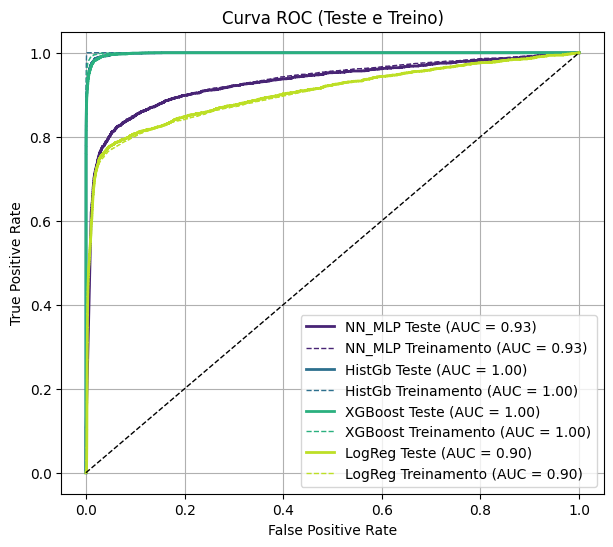

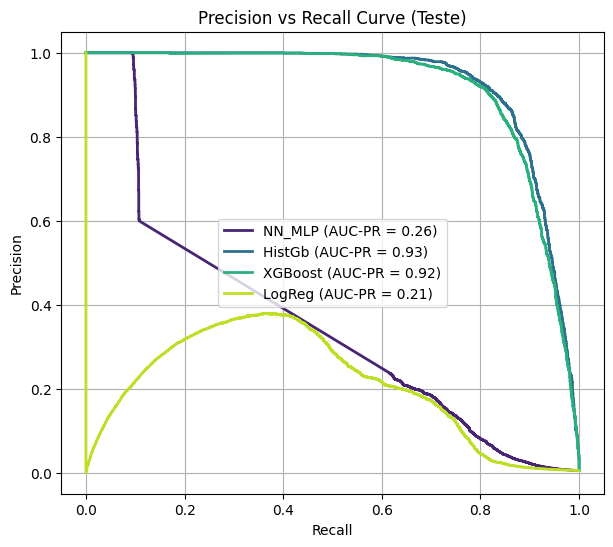

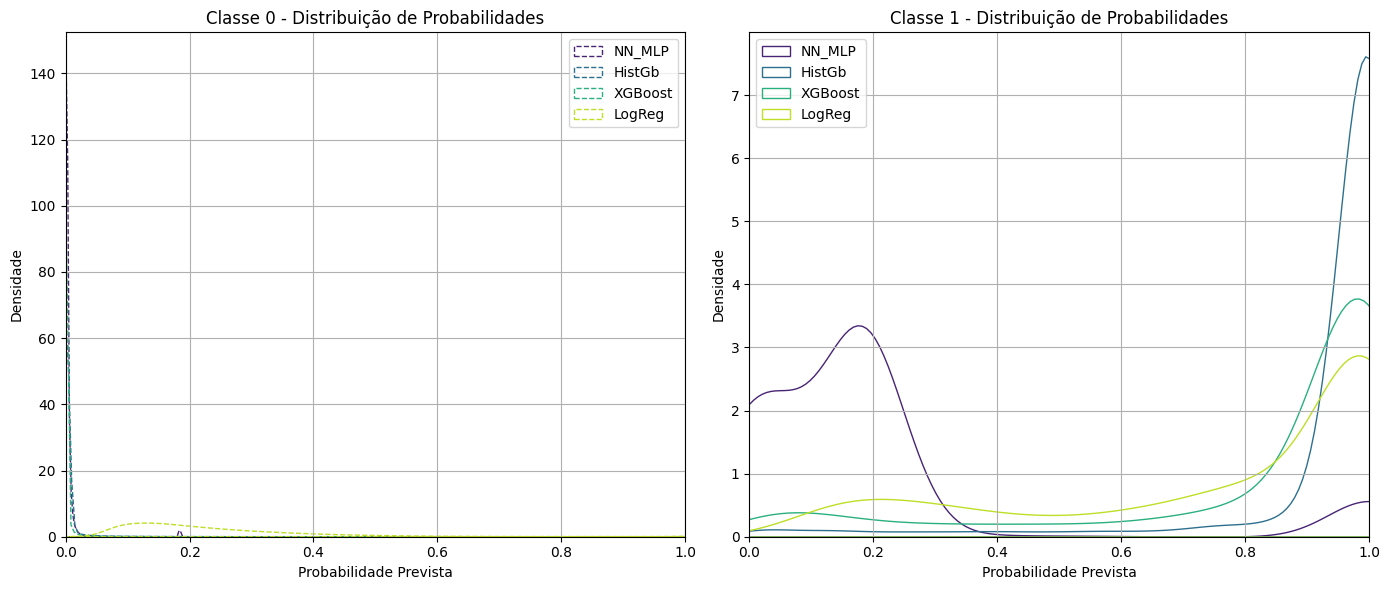

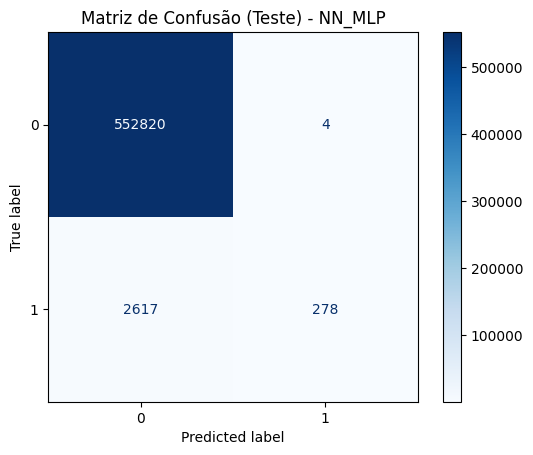


===== M√âTRICAS TESTE - NN_MLP =====
Acur√°cia:     0.9953
Precis√£o:     0.9858
Recall:       0.0960
F1-score:     0.1750
ROC AUC:      0.9294
AUC Precision-Recall: 0.2632


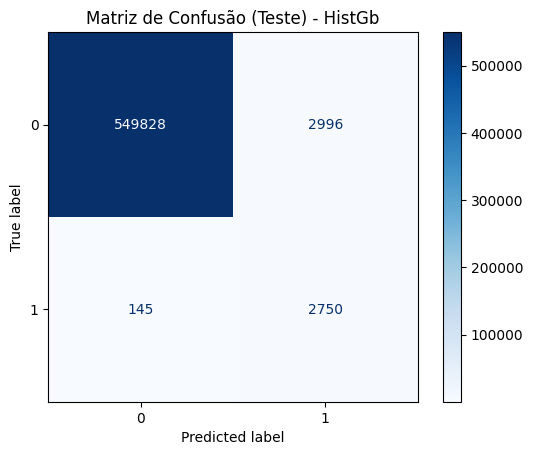


===== M√âTRICAS TESTE - HistGb =====
Acur√°cia:     0.9943
Precis√£o:     0.4786
Recall:       0.9499
F1-score:     0.6365
ROC AUC:      0.9987
AUC Precision-Recall: 0.9259


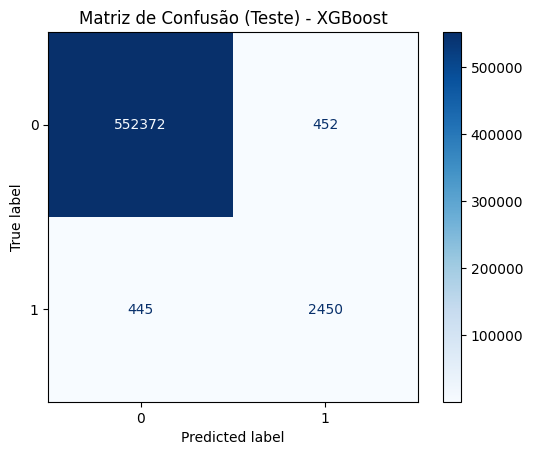


===== M√âTRICAS TESTE - XGBoost =====
Acur√°cia:     0.9984
Precis√£o:     0.8442
Recall:       0.8463
F1-score:     0.8453
ROC AUC:      0.9985
AUC Precision-Recall: 0.9167


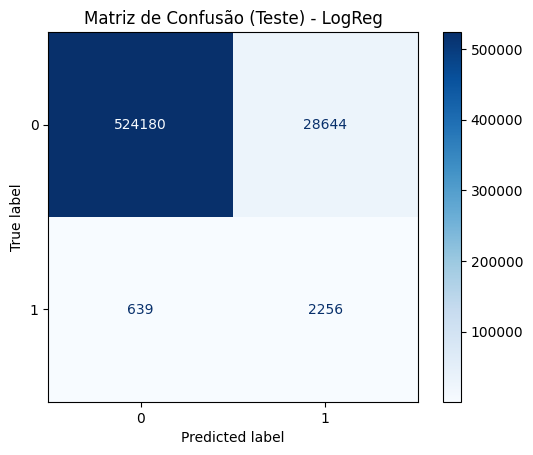


===== M√âTRICAS TESTE - LogReg =====
Acur√°cia:     0.9473
Precis√£o:     0.0730
Recall:       0.7793
F1-score:     0.1335
ROC AUC:      0.9042
AUC Precision-Recall: 0.2053


In [ ]:
def avaliar_modelos_multiplos(resultados_modelos, threshold=0.5):

    import matplotlib.cm as cm
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import (
        roc_curve, roc_auc_score,
        precision_recall_curve, average_precision_score,
        confusion_matrix, ConfusionMatrixDisplay,
        accuracy_score, precision_score, recall_score, f1_score
    )



    """
    Avalia m√∫ltiplos modelos de classifica√ß√£o bin√°ria comparando curvas ROC, Precision-Recall e m√©tricas.
    """


    metricas_dict = {}


    # Criar dicion√°rio de cores √∫nico para os modelos, com espa√ßamento melhor na paleta viridis
    nomes_modelos = list(resultados_modelos.keys())
    cmap = cm.get_cmap("viridis")

    # Evita extremos (muito claro ou escuro) escolhendo valores entre 10% e 90%
    cores_viridis = [cmap(x) for x in np.linspace(0.1, 0.9, len(nomes_modelos))]
    cores_dict = dict(zip(nomes_modelos, cores_viridis))

    # ===== CURVA ROC =====
    plt.figure(figsize=(7, 6))
    for nome_modelo, dados in resultados_modelos.items():
        fpr_test, tpr_test, _ = roc_curve(dados["y_test_true"], dados["y_test_proba"])
        auc_test = roc_auc_score(dados["y_test_true"], dados["y_test_proba"])
        plt.plot(fpr_test, tpr_test, lw=2, label=f"{nome_modelo} Teste (AUC = {auc_test:.2f})", color=cores_dict[nome_modelo])

        fpr_train, tpr_train, _ = roc_curve(dados["y_train_true"], dados["y_train_proba"])
        auc_train = roc_auc_score(dados["y_train_true"], dados["y_train_proba"])
        plt.plot(fpr_train, tpr_train, lw=1, linestyle='--', label=f"{nome_modelo} Treinamento (AUC = {auc_train:.2f})", color=cores_dict[nome_modelo])

    plt.plot([0, 1], [0, 1], "k--", lw=1)
    plt.title("Curva ROC (Teste e Treino)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

    # ===== PRECISION vs RECALL =====
    plt.figure(figsize=(7, 6))
    for nome_modelo, dados in resultados_modelos.items():
        precision, recall, _ = precision_recall_curve(dados["y_test_true"], dados["y_test_proba"])
        auc_pr = average_precision_score(dados["y_test_true"], dados["y_test_proba"])
        plt.plot(recall, precision, lw=2, label=f"{nome_modelo} (AUC-PR = {auc_pr:.2f})", color=cores_dict[nome_modelo])

    plt.title("Precision vs Recall Curve (Teste)")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.grid(True)
    plt.show()

    # ===== KDE de Probabilidades =====
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

    for nome_modelo, dados in resultados_modelos.items():
        proba_negativo = dados["y_test_proba"][dados["y_test_true"] == 0]
        sns.kdeplot(
            proba_negativo,
            label=nome_modelo,
            linestyle="--",
            fill=True,
            color=cores_dict[nome_modelo],
            alpha=0,
            bw_adjust=1.2,
            ax=axes[0]
        )

    axes[0].set_title("Classe 0 - Distribui√ß√£o de Probabilidades")
    axes[0].set_xlabel("Probabilidade Prevista")
    axes[0].set_ylabel("Densidade")
    axes[0].legend()
    axes[0].grid(True)
    axes[0].set_xlim(0, 1)
    axes[0].set_ylim(bottom=0)

    for nome_modelo, dados in resultados_modelos.items():
        proba_positivo = dados["y_test_proba"][dados["y_test_true"] == 1]
        sns.kdeplot(
            proba_positivo,
            label=nome_modelo,
            fill=True,
            color=cores_dict[nome_modelo],
            alpha=0,
            bw_adjust=1.2,
            ax=axes[1]
        )

    axes[1].set_title("Classe 1 - Distribui√ß√£o de Probabilidades")
    axes[1].set_xlabel("Probabilidade Prevista")
    axes[1].set_ylabel("Densidade")
    axes[1].legend()
    axes[1].grid(True)
    axes[1].set_xlim(0, 1)
    axes[1].set_ylim(bottom=0)

    plt.tight_layout()
    plt.show()

    # ===== MATRIZ DE CONFUS√ÉO E M√âTRICAS =====
    for nome_modelo, dados in resultados_modelos.items():
        y_test_pred = (dados["y_test_proba"] >= threshold).astype(int)

        cm = confusion_matrix(dados["y_test_true"], y_test_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap="Blues", values_format="d")
        plt.title(f"Matriz de Confus√£o (Teste) - {nome_modelo}")
        plt.show()

        accuracy = accuracy_score(dados["y_test_true"], y_test_pred)
        precision_val = precision_score(dados["y_test_true"], y_test_pred, zero_division=0)
        recall_val = recall_score(dados["y_test_true"], y_test_pred)
        f1 = f1_score(dados["y_test_true"], y_test_pred)
        auc_roc = roc_auc_score(dados["y_test_true"], dados["y_test_proba"])
        auc_pr = average_precision_score(dados["y_test_true"], dados["y_test_proba"])

        print(f"\n===== M√âTRICAS TESTE - {nome_modelo} =====")
        print(f"Acur√°cia:     {accuracy:.4f}")
        print(f"Precis√£o:     {precision_val:.4f}")
        print(f"Recall:       {recall_val:.4f}")
        print(f"F1-score:     {f1:.4f}")
        print(f"ROC AUC:      {auc_roc:.4f}")
        print(f"AUC Precision-Recall: {auc_pr:.4f}")

        metricas_dict[nome_modelo] = {
            "Acur√°cia": accuracy,
            "Precis√£o": precision_val,
            "Recall": recall_val,
            "F1-score": f1,
            "ROC AUC": auc_roc,
            "AUC Precision-Recall": auc_pr
        }

    return metricas_dict

        

metricas_finais = avaliar_modelos_multiplos(resultados_finais, threshold=threshold)



# 6 Selecinando e salvando para prod melhor modelo

* Aqui foram aplicados os criterios de selecao especificados no inicio do projeto

In [ ]:

def selecionar_e_salvar_best_model(metricas_finais, pasta_base):
    # Definir crit√©rios m√≠nimos de acordo com o determinado no projeto
    CRIT_RECALL = 0.70
    CRIT_AUCROC = 0.85
    CRIT_F1 = 0.74

    # Filtrar modelos que atendem aos crit√©rios
    modelos_qualificados = {}
    for nome, m in metricas_finais.items():
        if (
            m['Recall'] >= CRIT_RECALL and
            m['ROC AUC'] >= CRIT_AUCROC and
            m['F1-score'] >= CRIT_F1
        ):
            media_metricas = (m['Recall'] + m['ROC AUC'] + m['F1-score']) / 3
            modelos_qualificados[nome] = media_metricas

    if not modelos_qualificados:
        print("‚ö†Ô∏è Nenhum modelo atendeu a todos os crit√©rios definidos.")
        return

    # Seleciona o modelo com maior m√©dia entre as m√©tricas
    melhor_modelo = max(modelos_qualificados, key=modelos_qualificados.get)
    print(f"üèÜ Modelo selecionado como melhor: {melhor_modelo}")

    # Caminhos de origem e destino
    origem = os.path.join(pasta_base, melhor_modelo, "modelo.pkl")
    destino_pasta = os.path.join(pasta_base, "best_model")
    os.makedirs(destino_pasta, exist_ok=True)
    destino = os.path.join(destino_pasta, "modelo.pkl")

    # Copiar o modelo
    shutil.copy(origem, destino)
    print(f"üìÅ Modelo copiado para: {destino}")

    # Criar arquivo de m√©tricas
    caminho_metricas = os.path.join(destino_pasta, "metricas.txt")
    with open(caminho_metricas, "w") as f:
        f.write(f"M√©tricas do melhor modelo: {melhor_modelo}\n\n")
        for metrica, valor in metricas_finais[melhor_modelo].items():
            f.write(f"{metrica}: {round(float(valor), 4)}\n")

    # Salva nome do modelo escolhido
    caminho_nome_modelo = os.path.join(destino_pasta, "modelo_escolhido.txt")
    with open(caminho_nome_modelo, "w") as f:
        f.write(melhor_modelo)

    print(f"üìù M√©tricas salvas em: {caminho_metricas}")
    print(f"üìå Nome do modelo salvo em: {caminho_nome_modelo}")


In [99]:
selecionar_e_salvar_best_model(metricas_finais=metricas_finais, pasta_base="modelos_treinados")


üèÜ Modelo selecionado como melhor: XGBoost
üìÅ Modelo copiado para: modelos_treinados\best_model\modelo.pkl
üìù M√©tricas salvas em: modelos_treinados\best_model\metricas.txt
üìå Nome do modelo salvo em: modelos_treinados\best_model\modelo_escolhido.txt


# Explicabilidade e analise de Justica das decisoes do modelo

* nos dados de teste, usando melhor modelo salvo em .pkl

In [ ]:
#carregua o modelo
pipeline = joblib.load("modelos_treinados/best_model/modelo.pkl")


# Fun√ß√£o para calcular e mostrar as m√©tricas de performance
def calcular_metricas_performance(y_true, y_pred, y_prob):
    from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score,average_precision_score)



    print("M√©tricas de performance do modelo:")
    print("Acur√°cia:", accuracy_score(y_true, y_pred))
    print("Precis√£o:", precision_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("ROC AUC:", roc_auc_score(y_true, y_prob))
    print("Precision-Recall AUC:", average_precision_score(y_true, y_prob))

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["N√£o Fraude", "Fraude"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Matriz de Confus√£o")
    plt.show()

    
# Fun√ß√£o para calcular as m√©tricas de vi√©s por grupo de 'age' e 'gender'
def calcular_metricas_por_grupo(X_test, y_test, y_pred):


    # Calcular as m√©tricas para o g√™nero
    metricas_gender = MetricFrame(
        metrics={
            "accuracy": accuracy_score,
            "f1": f1_score,
            "recall": recall_score,
            "roc_auc": roc_auc_score
        },
        y_true=y_test,
        y_pred=y_pred,
        sensitive_features=X_test['gender']
    )

    print("\nM√©tricas por grupo de G√™nero:")
    print(metricas_gender.by_group)

    # Visualizar compara√ß√µes de taxa de acerto, recall, F1-Score e ROC AUC por grupo de 'gender'
    metricas_gender.by_group[['accuracy', 'f1', 'recall', 'roc_auc']].plot(kind='bar', figsize=(12, 6))
    plt.title("Compara√ß√£o de M√©tricas por G√™nero")
    plt.ylabel("M√©trica")
    plt.xlabel("G√™nero")
    plt.xticks(rotation=0)
    plt.show()



    # Calcular as m√©tricas para as faixas et√°rias


    def atribuir_faixa_etaria(age):
        if 0 <= age <= 18:
            return '0-18'
        elif 19 <= age <= 30:
            return '19-30'
        elif 31 <= age <= 45:
            return '31-45'
        elif 46 <= age <= 60:
            return '46-60'
        elif age > 60:
            return '61+'
        else:
            return 'Desconhecido'  # Em caso de valor inesperado, como NaN (n√£o necess√°rio se a coluna de idades n√£o contiver NaN)

    # Aplicando a fun√ß√£o ao DataFrame
    X_test['age_group'] = X_test['age'].apply(atribuir_faixa_etaria)

    # Converte a coluna 'age_group' para tipo categ√≥rico
    X_test['age_group'] = X_test['age_group'].astype('category')

    # Verificando as faixas criadas
    print(X_test['age_group'].unique())

    # Calcular as m√©tricas para as faixas et√°rias
    metricas_age = MetricFrame(
        metrics={
            "accuracy": accuracy_score,
            "f1": f1_score,
            "recall": recall_score,
            "roc_auc": roc_auc_score
        },
        y_true=y_test,
        y_pred=y_pred,
        sensitive_features=X_test['age_group']
    )

    print("\nM√©tricas por faixa et√°ria:")
    print(metricas_age.by_group)

    # Visualizar compara√ß√µes de taxa de acerto, recall, F1-Score e ROC AUC por faixa et√°ria
    metricas_age.by_group[['accuracy', 'f1', 'recall', 'roc_auc']].plot(kind='bar', figsize=(12, 6))
    plt.title("Compara√ß√£o de M√©tricas por Faixa Et√°ria")
    plt.ylabel("M√©trica")
    plt.xlabel("Faixa Et√°ria")
    plt.xticks(rotation=45)
    plt.show()






# Fun√ß√£o para calcular e exibir a an√°lise SHAP
def calcular_shap(X_test, pipeline):
    import shap
    import pandas as pd

    # Extrair pr√©-processador e modelo do pipeline
    preprocessador = pipeline.named_steps['preprocessing']
    modelo = pipeline.named_steps['model']

    # Aplicar apenas o pr√©-processamento nos dados de teste
    X_transformed = preprocessador.transform(X_test)

    # Obter os nomes das features ap√≥s transforma√ß√£o
    try:
        feature_names = preprocessador.get_feature_names_out()
    except AttributeError:
        feature_names = [f'feature_{i}' for i in range(X_transformed.shape[1])]

    # Converter para DataFrame com nomes das features
    X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)

    # Verificar se o modelo √© baseado em √°rvore (como XGBoost ou CatBoost)
    if hasattr(modelo, 'apply'):
        explainer = shap.TreeExplainer(modelo)
    else:
        explainer = shap.KernelExplainer(modelo.predict_proba, X_transformed_df)

    # Calcular os valores SHAP
    shap_values = explainer.shap_values(X_transformed_df)

    # Exibi o gr√°fico global de SHAP 
    shap.summary_plot(shap_values, X_transformed_df)





def calcular_lime_com_fraude(X_test, y_test, pipeline, idx_observacoes=None):
    import lime
    import lime.lime_tabular
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt  

    # Extrair pr√©-processador e modelo do pipeline
    preprocessador = pipeline.named_steps['preprocessing']
    modelo = pipeline.named_steps['model']

    # Pr√©-processar os dados
    X_transformed = preprocessador.transform(X_test)

    # Obter nomes das vari√°veis ap√≥s transforma√ß√£o
    try:
        feature_names = preprocessador.get_feature_names_out()
    except AttributeError:
        feature_names = [f'feature_{i}' for i in range(X_transformed.shape[1])]

    # Garantir array NumPy
    X_transformed = np.array(X_transformed)

    # Predi√ß√£o
    y_pred = modelo.predict(X_transformed)

    # Definir os √≠ndices a serem explicados
    if idx_observacoes is not None:
        # Valida√ß√£o dos √≠ndices fornecidos
        idx_observacoes = [idx for idx in idx_observacoes if 0 <= idx < len(X_transformed)]
        if not idx_observacoes:
            print("‚ùå Nenhuma observa√ß√£o v√°lida fornecida.")
            return
        idx_selecionados = idx_observacoes
    else:
        # Identificar √≠ndices de fraude e n√£o fraude
        idx_fraude = np.where(y_pred == 1)[0]
        idx_nao_fraude = np.where(y_pred == 0)[0]

        if len(idx_fraude) == 0:
            print("‚ö†Ô∏è Nenhuma observa√ß√£o foi classificada como fraude pelo modelo.")
            return

        # Selecionar 1 observa√ß√£o de fraude e 2 de n√£o fraude (se dispon√≠veis)
        np.random.seed(42)
        idx_selecionados = [np.random.choice(idx_fraude)]
        if len(idx_nao_fraude) >= 2:
            idx_selecionados += list(np.random.choice(idx_nao_fraude, size=2, replace=False))
        else:
            idx_selecionados += list(idx_nao_fraude)

    # Cria o explicador LIME
    explainer = lime.lime_tabular.LimeTabularExplainer(
        X_transformed,
        feature_names=feature_names,
        class_names=['N√£o Fraude', 'Fraude'],
        discretize_continuous=True,
        mode='classification'
    )

    # Mostrar explica√ß√µes
    for idx in idx_selecionados:
        classe = "FRAUDE" if y_pred[idx] == 1 else "N√ÉO FRAUDE"
        print(f"\nüîé Explica√ß√£o para a observa√ß√£o {idx} classificada como {classe}")
        exp = explainer.explain_instance(
            X_transformed[idx],
            modelo.predict_proba,
            num_features=10
        )
        fig = exp.as_pyplot_figure()
        plt.show()



# Fun√ß√£o para calcular e exibir m√©tricas de justi√ßa (Fairness) usando Fairlearn


# Fun√ß√£o para calcular as m√©tricas de justi√ßa
def calcular_metrica_justica(X_test, y_test, y_pred):

    import pandas as pd
    from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference

    # Fun√ß√£o para atribuir faixa et√°ria
    def atribuir_faixa_etaria(age):
        if 0 <= age <= 18:
            return '0-18'
        elif 19 <= age <= 30:
            return '19-30'
        elif 31 <= age <= 45:
            return '31-45'
        elif 46 <= age <= 60:
            return '46-60'
        elif age > 60:
            return '61+'
        else:
            return 'Desconhecido'  # Caso a idade seja inv√°lida, como NaN

    # Aplicando a fun√ß√£o de faixa et√°ria ao DataFrame
    X_test['age_group'] = X_test['age'].apply(atribuir_faixa_etaria)

    # Convertendo a coluna 'age_group' para tipo categ√≥rico
    X_test['age_group'] = X_test['age_group'].astype('category')

    # Calculando as m√©tricas de justi√ßa para g√™nero e faixa et√°ria
    dp_gender = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['gender'])
    dp_age = demographic_parity_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['age_group'])

    eo_gender = equalized_odds_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['gender'])
    eo_age = equalized_odds_difference(y_true=y_test, y_pred=y_pred, sensitive_features=X_test['age_group'])

    # Exibindo as m√©tricas de justi√ßa
    print(f"\nDemographic Parity Difference (Gender): {dp_gender}")
    print(f"Demographic Parity Difference (Age): {dp_age}")
    print(f"Equalized Odds Difference (Gender): {eo_gender}")
    print(f"Equalized Odds Difference (Age): {eo_age}")


# Obten√ß√£o das previs√µes
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilidade para a classe positiva



M√©tricas de performance do modelo:
Acur√°cia: 0.9983858748756116
Precis√£o: 0.8442453480358374
F1-Score: 0.8452647921338623
Recall: 0.846286701208981
ROC AUC: 0.9985419886591659
Precision-Recall AUC: 0.9167052297742535


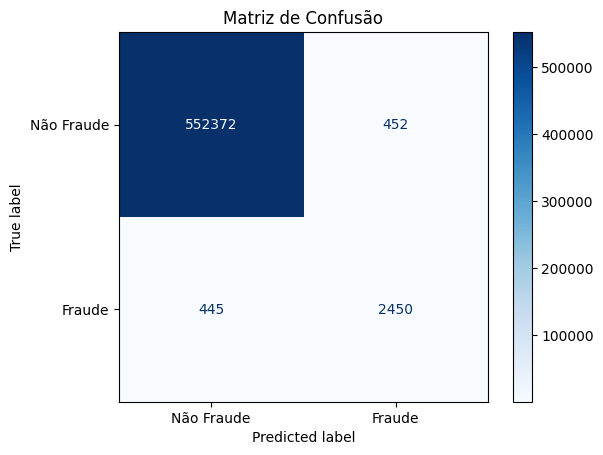

In [172]:
# Calcular e mostrar as m√©tricas de performance

'''aqui so pra garantir que os resultadods sao os mesmos do teste aplicado antes de salvar o modelo, 
    vemos que o modelo e o pipeline funcionam pos salvamento

    OBS: aqui mesmo carregando o pkl do modelo e pipeline, precisa que sejam carrecados treino e teste nos dados 
    (rodar ate o split train test)'''


calcular_metricas_performance(y_test, y_pred, y_prob)




M√©tricas por grupo de G√™nero:
        accuracy   f1  recall  roc_auc
gender                                
F           1.00 0.80    0.80     0.90
M           1.00 0.88    0.90     0.95


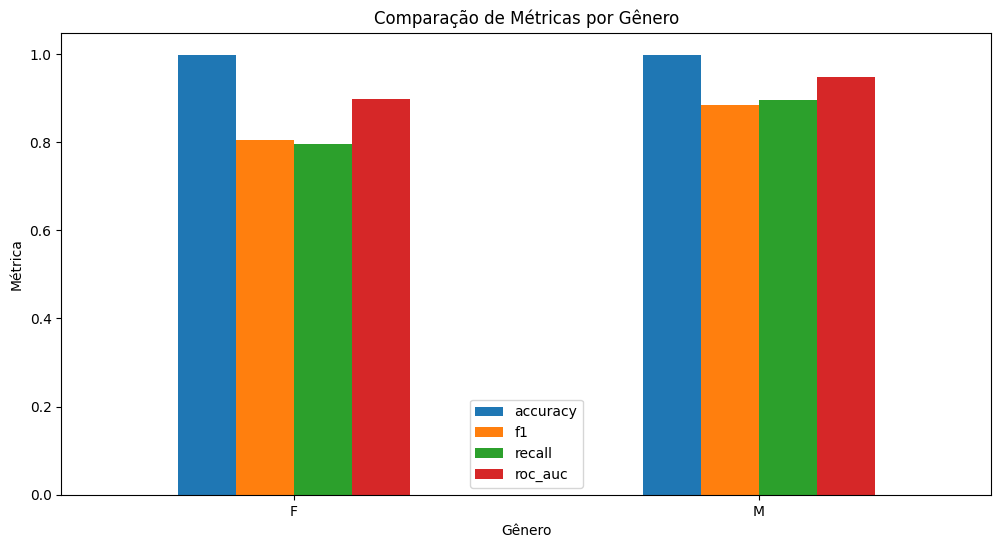

['31-45', '46-60', '19-30', '0-18', '61+']
Categories (5, object): ['0-18', '19-30', '31-45', '46-60', '61+']

M√©tricas por faixa et√°ria:
           accuracy   f1  recall  roc_auc
age_group                                
0-18           1.00 0.92    0.93     0.97
19-30          1.00 0.82    0.83     0.92
31-45          1.00 0.77    0.78     0.89
46-60          1.00 0.86    0.86     0.93
61+            1.00 0.93    0.91     0.96


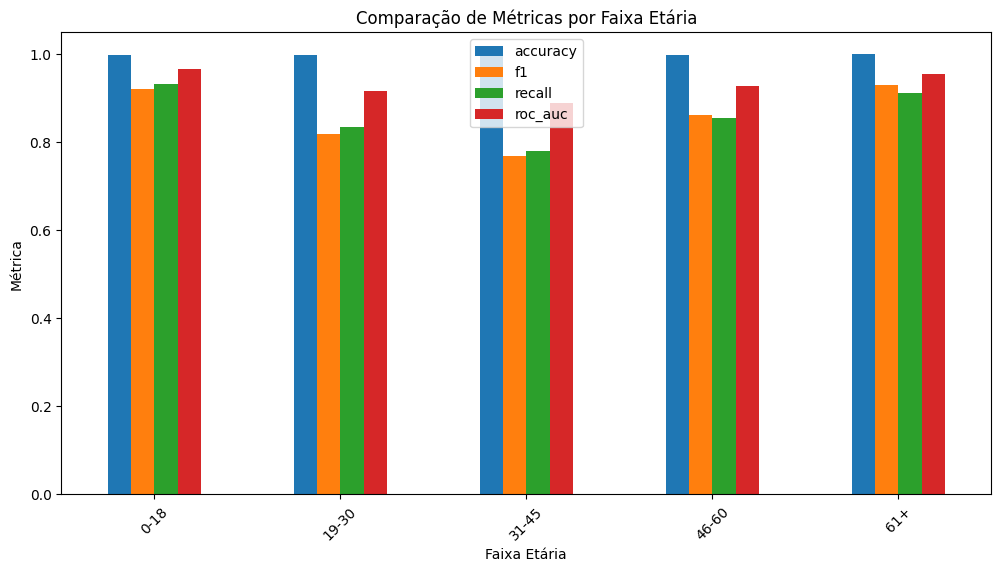

In [173]:
# Calcular e exibir as m√©tricas de vi√©s por grupo

'''aqui olhamos as metricas por genero pra ter uma ideia de discriminacao, como vemos aparentemente nao ha'''

''' Tambem dividmos a idade em faixas para testar se ha discriminacao pela idade de forma visual, 
    de 19 a 45 anos ha uma metricas mais baixas, mas nada discrepante tambem'''
calcular_metricas_por_grupo(X_test, y_test, y_pred)




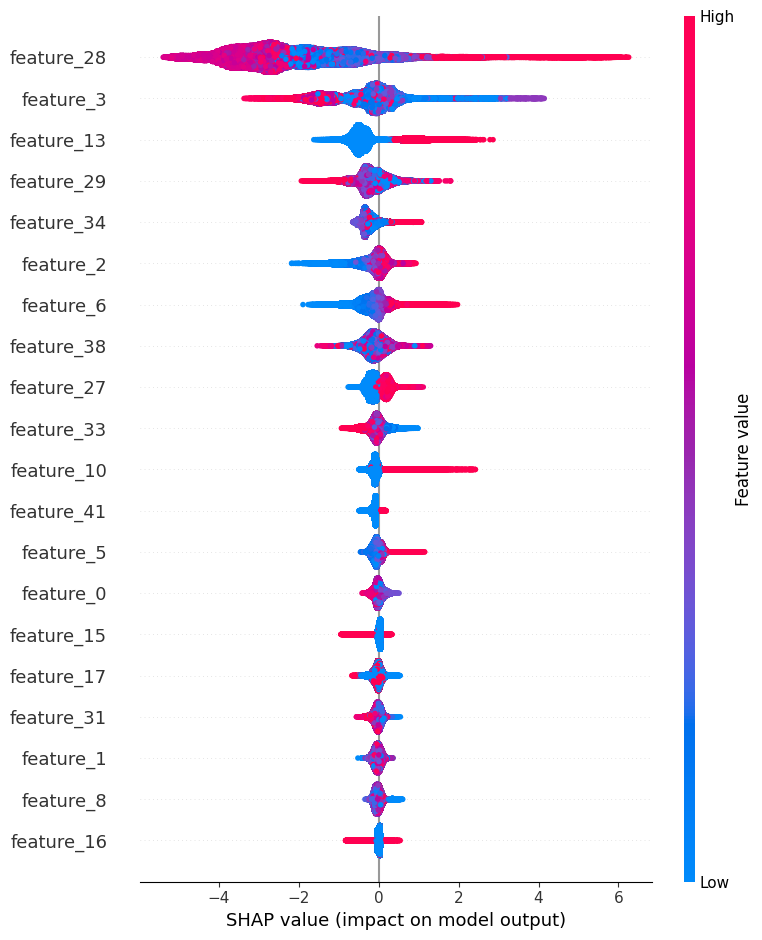

In [174]:
# Calcular e exibir a an√°lise SHAP

''' aqui  vemos como as features influenciam na decisao de forma global com shap, e uma metrica de explicabilidade. 
    Tive problemas para voltar o nome das variaveis, nao consegui solucionar, mas podemos ver que nao ha nada muito preocupante, 
    fica a melhoria futura pra tentar '''
calcular_shap(X_test, pipeline)




üîé Explica√ß√£o para a observa√ß√£o 163526 classificada como FRAUDE


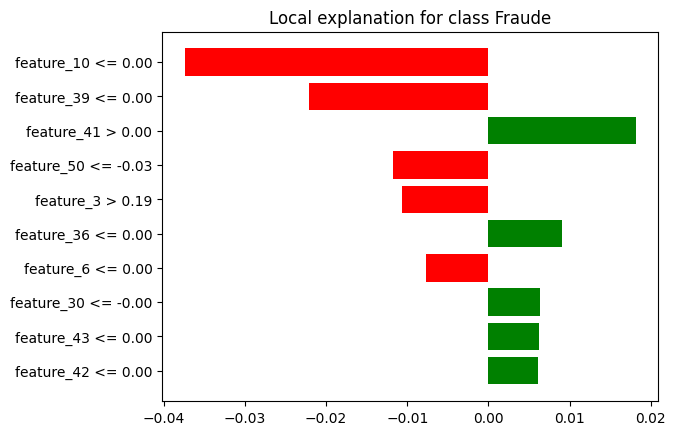


üîé Explica√ß√£o para a observa√ß√£o 12 classificada como N√ÉO FRAUDE


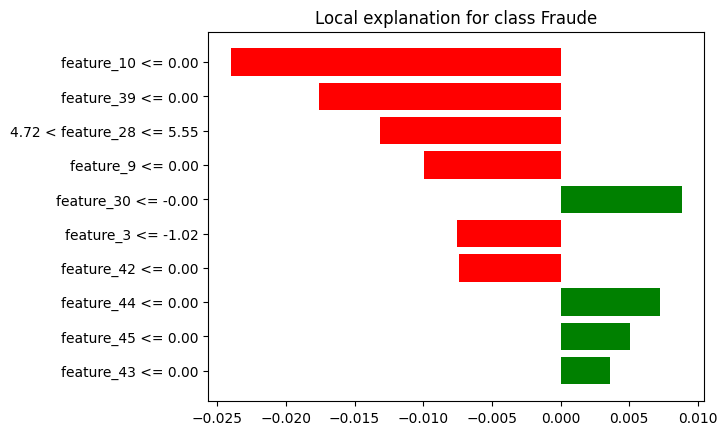


üîé Explica√ß√£o para a observa√ß√£o 33 classificada como N√ÉO FRAUDE


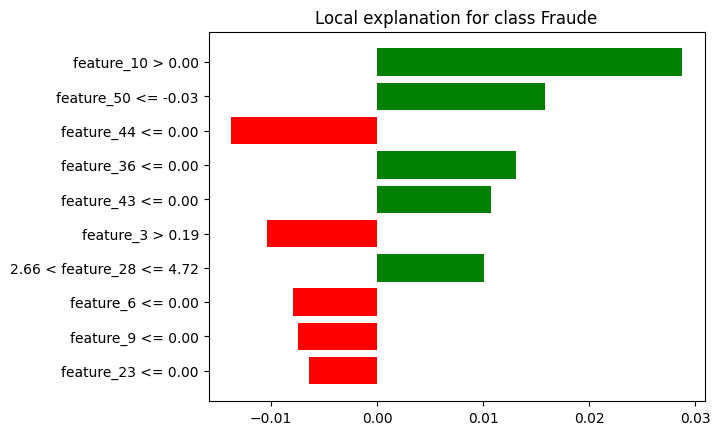

In [175]:
''' aqui vemos como as features influenciam na decisao de forma local com LIME em 3 observacoes, e uma metrica de explicabilidade. 
    Tive problemas para voltar o nome das variaveis, nao consegui solucionar, aqui tambem nada descrepante'''

# Passando uma lista espec√≠fica de observa√ß√µes
calcular_lime_com_fraude(X_test, y_test, pipeline, idx_observacoes=[163526, 12, 33]) # lista com n linha das observacoes

#escolher automaticamente (sequencial)
#calcular_lime_com_fraude(X_test, y_test, pipeline)

In [ ]:
# Calculo de vies com Fairness 
''' 
As m√©tricas de Demographic Parity Difference e Equalized Odds Difference s√£o usadas para avaliar o vi√©s do modelo em rela√ß√£o a caracter√≠sticas sens√≠veis, como g√™nero e idade.


* Demographic Parity Difference mede a diferen√ßa na taxa de resultados positivos (fraude detectada, neste caso) entre grupos com base em uma caracter√≠stica sens√≠vel. 
O ideal seria que a diferen√ßa fosse pr√≥xima de 0, indicando que a decis√£o do modelo n√£o √© influenciada por essa caracter√≠stica sens√≠vel (g√™nero ou idade).

* Equalized Odds Difference avalia a diferen√ßa nas taxas de falsos positivos e falsos negativos entre os grupos. Uma diferen√ßa maior que 0 sugere que o modelo comete 
mais erros de classifica√ß√£o em um grupo em compara√ß√£o com outro, o que indica um poss√≠vel vi√©s no processo de decis√£o.



Aqui as diferen√ßas pequenas em Demographic Parity (para g√™nero e idade) indicam que a distribui√ß√£o das fraudes detectadas √© relativamente equilibrada entre os grupos. 
No entanto, as diferen√ßas mais altas em Equalized Odds, especialmente para a idade, mostram que o modelo pode estar cometendo mais erros em algumas faixas et√°rias, resultando em decis√µes menos precisas para esses grupos.


O ponto de melhoria seria ajustar o modelo para reduzir os erros de classifica√ß√£o nas faixas et√°rias espec√≠ficas, buscando promover um tratamento mais justo para todos os grupos e minimizando o vi√©s nas decis√µes erradas.


Ainda assim os resultados nao sao preocupantes, mas devem ser observados, principalemnte em Equalized Odds Difference (Age) para que nao aumente.

'''

calcular_metrica_justica(X_test, y_test, y_pred)


Demographic Parity Difference (Gender): 0.0012544818383971226
Demographic Parity Difference (Age): 0.0021471854642836543
Equalized Odds Difference (Gender): 0.098472547958386
Equalized Odds Difference (Age): 0.1515550239234449


# Explicabilidade dos Hiperparametros do modelo by Dashboard Optuna 

* Dashboard √© um painel web em tempo real para o Optuna. Voc√™ pode verificar o hist√≥rico de otimiza√ß√£o, a import√¢ncia dos hiperpar√¢metros, etc. em gr√°ficos e tabelas. Ele basicamente salva os resultados em um banco de dados, garantindo continuidade e armazenamento dos trials de forma acumulativa, proporcionando historico para analise de melhoria ao longo dos estudos. Consultar doc em https://optuna.org/

* acessar Dahsboard_Optuna_observacoes.md neste diretorio para entender a implementa√ß√£o atual.

* Aqui trarei algumas das metricas atraves de prints do melhor modelo: 



In [181]:
'''tambem e possivel alem do dahsboard acessar eles via codigo, mas nao fica legal de registrar, graficos nao ficam estaticos no notebook'''

# import optuna
# from optuna.visualization import plot_parallel_coordinate

# # Carregue seu estudo (ajuste o nome e o storage conforme seu caso)
# study = optuna.load_study(study_name="XGBoost_study", storage="sqlite:///Fraud_study_models_by_Optuna.db")

# # Gerar o gr√°fico de coordenadas paralelas
# fig = plot_parallel_coordinate(study)

# # Exibir o gr√°fico
# fig.show()



'tambem e possivel alem do dahsboard acessar eles via codigo, mas nao fica legal de registrar, graficos nao ficam estaticos no notebook'

![Print](prints/Captura%20de%20tela%202025-05-02%20020644.png)


![Print](prints/Captura%20de%20tela%202025-05-02%20020722.png)


![Print](prints/Captura%20de%20tela%202025-05-02%20010327.png)


![Print](prints/Captura%20de%20tela%202025-05-02%20010349.png)


![Print](prints/Captura%20de%20tela%202025-05-02%20010533.png)


# CONCLUSAO

O projeto foi conclu√≠do com sucesso, com todos os crit√©rios e m√©tricas atendidos. O modelo final demonstrou alto desempenho preditivo, com uma estrutura robusta implementada via pipeline, garantindo seguran√ßa e aus√™ncia de vazamento de dados entre treino e teste. A valida√ß√£o com K-Folds aumentou a confiabilidade dos resultados, e o processo de feature engineering teve papel fundamental, com melhorias not√°veis na performance √† medida que novas vari√°veis foram criadas.


Foram testados quatro modelos ‚Äî XGBoost, HistGradientBoosting, MLPClassifier e Regress√£o Log√≠stica do scikit-learn ‚Äî, otimizados com o Optuna. Os resultados foram analisados de forma visual e comparativa por meio do dashboard do Optuna e das m√©tricas de desempenho definidas. O uso do framework CRISP-DM contribuiu para o planejamento e organiza√ß√£o do projeto, e o modelo final est√° pronto para aplica√ß√£o em produ√ß√£o, apresentando alta capacidade preditiva e seguran√ßa na detec√ß√£o de fraudes.
  

  
**M√©tricas do melhor modelo: XGBoost**

Acur√°cia: 0.9984  
Precis√£o: 0.8442  
Recall: **0.8463 (significativamente maior que 0.70)**    
F1-score: **0.8453 (significativamente maior que 0.74)**    
ROC AUC: **0.9985 (significativamente maior que 0.85)**    
AUC Precision-Recall: 0.9167  

